# <b><div style='padding:8px;background-color:#ff6f61;color:white;border-radius:2px;font-size:100%;text-align: left'>Brazilian E-Commerce Performance Analytics & Predictive Intelligence</div></b>

## Project Overview

This project delivers a comprehensive analytical framework for a Brazilian e-commerce platform, combining descriptive analytics, geospatial visualization, and predictive modeling to drive strategic decision-making across customer experience, operational efficiency, and revenue optimization.

The analysis leverages multi-dimensional transactional data spanning customer demographics, order fulfillment, product performance, payment behavior, delivery logistics, and customer satisfaction to identify actionable insights that directly impact business KPIs.

---

## Project Goal

To transform raw e-commerce operational data into strategic intelligence by:

1. **Understanding customer behavior patterns** to enhance retention and maximize lifetime value
2. **Optimizing delivery and logistics operations** to improve customer satisfaction and operational efficiency
3. **Identifying high-performing products, sellers, and regions** to inform inventory and partnership strategies
4. **Building predictive models** to anticipate delivery delays, customer churn, and lead conversion
5. **Creating interactive dashboards** to enable real-time monitoring of critical business metrics

---

## Project Objectives

### 1. Customer Intelligence & Segmentation
- Analyze purchasing patterns across geographic regions (city/state level)
- Identify customer retention vs. churn trends
- Segment customers by purchase frequency and order value to enable targeted marketing
- Predict customer lifetime value (CLV) for strategic account management

### 2. Sales Performance & Revenue Analytics
- Identify top-performing product categories, sellers, and geographic markets
- Analyze payment method preferences and their correlation with revenue
- Assess lead qualification effectiveness and conversion funnel performance
- Recommend A/B testing opportunities for conversion optimization

### 3. Delivery & Logistics Optimization
- Measure delivery efficiency by comparing estimated vs. actual delivery dates
- Identify geographic bottlenecks (cities/states with frequent delays)
- Perform geospatial analysis of seller-customer proximity for route optimization

### 4. Customer Satisfaction & Review Analysis
- Analyze review score distribution across product categories and sellers
- Quantify the impact of delivery performance on customer sentiment
- Identify drivers of negative reviews for quality improvement initiatives

### 5. Predictive Analytics & Machine Learning
- **Delivery Delay Prediction**: Build regression models to forecast late deliveries
- **Review Score Prediction**: Predict customer satisfaction based on order characteristics
- **Customer Churn Modeling**: Identify at-risk customers for retention campaigns
- **Lead Conversion Prediction**: Score marketing-qualified leads for sales prioritization

### 6. Business Intelligence Dashboard
- Create interactive dashboards (Python Dash/Power BI/Tableau) to track:
  - Revenue trends by category, seller, and region
  - Delivery performance metrics
  - Customer satisfaction scores
  - Lead conversion rates

---

## Expected Business Impact

- **Reduced Delivery Delays**: 15-20% improvement through predictive routing and proactive interventions
- **Increased Customer Retention**: 10-15% reduction in churn through targeted engagement
- **Improved Lead Conversion**: 20-25% increase in MQL-to-closed deal conversion through better scoring
- **Enhanced Customer Satisfaction**: 0.3-0.5 point improvement in average review scores
- **Optimized Regional Strategy**: Data-driven resource allocation across high-performing markets

---

## Dataset Overview

The analysis utilizes 11 interconnected datasets covering:
- **Customer Data**: Demographics, location, unique identifiers
- **Order Data**: Transaction history, status, timestamps
- **Product Data**: Categories, dimensions, pricing
- **Seller Data**: Location, performance metrics
- **Logistics Data**: Geolocation coordinates, delivery dates
- **Review Data**: Customer satisfaction scores and feedback
- **Payment Data**: Methods, installments, values
- **Lead Data**: Marketing-qualified leads, conversion outcomes

---

## Methodology

1. **Data Cleaning & Preprocessing**: Handle missing values, duplicates, and data type conversions
2. **Feature Engineering**: Create derived metrics (distance, delay, segments, CLV)
3. **Exploratory Data Analysis (EDA)**: Visualize patterns, trends, and distributions
4. **Statistical Analysis**: Correlation, chi-squared tests, significance testing
5. **Predictive Modeling**: XGBoost, Random Forest for regression and classification
6. **Geospatial Analysis**: Map-based visualization of seller-customer relationships
7. **Dashboard Development**: Interactive KPI tracking interface

---


## **Import Libraries**

In [1]:
# ============================================================================
# Import  required Libraries
# ============================================================================
import os
import warnings

# Data analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

# Geospatial
from geopy.distance import geodesic

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (confusion_matrix,
    classification_report, roc_auc_score, roc_curve,
    mean_squared_error, mean_absolute_error, r2_score
)
from xgboost import XGBClassifier, XGBRegressor

warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

# Statistical analysis
from scipy.stats import pearsonr, chi2_contingency
from scipy.stats import chi2_contingency

# Dashboard
import dash
from jupyter_dash import JupyterDash
from dash import dcc, html, Input, Output, dash_table
from datetime import datetime, timedelta

# Configure settings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
pio.renderers.default = 'iframe'

## **Load Datasets**

In [2]:
# Load project datasets
# ============================================================================

# Define your data directory path
DATA_DIR = r"C:\Users\Harrison\Desktop\10ALYTICS_MONTHLY_KNOWLEDGEQUEST\datasets"

# Load all datasets
customers = pd.read_csv(f"{DATA_DIR}/customers.eCommerce.csv")
geolocation = pd.read_csv(f"{DATA_DIR}/geolocation.eCommerce.csv")
closed_leads = pd.read_csv(f"{DATA_DIR}/leads_closed.eCommerce.csv")
qualified_leads = pd.read_csv(f"{DATA_DIR}/leads_qualified.eCommerce.csv")
order_items = pd.read_csv(f"{DATA_DIR}/order_items.eCommerce.csv")
order_payments = pd.read_csv(f"{DATA_DIR}/order_payments.eCommerce.csv")
order_reviews = pd.read_csv(f"{DATA_DIR}/order_reviews.eCommerce.csv")
orders = pd.read_csv(f"{DATA_DIR}/orders.eCommerce.csv")
product_cat_name = pd.read_csv(f"{DATA_DIR}/product_category_name_translation.eCommerce.csv")
products = pd.read_csv(f"{DATA_DIR}/products.eCommerce.csv")
sellers = pd.read_csv(f"{DATA_DIR}/sellers.eCommerce.csv")

# Display dataset shapes
print("="*70)
print("Datasets Loaded Successfully")
print("="*70)
datasets_info = {
    'customers': customers.shape,
    'geolocation': geolocation.shape,
    'closed_leads': closed_leads.shape,
    'qualified_leads': qualified_leads.shape,
    'order_items': order_items.shape,
    'order_payments': order_payments.shape,
    'order_reviews': order_reviews.shape,
    'orders': orders.shape,
    'product_cat_name': product_cat_name.shape,
    'products': products.shape,
    'sellers': sellers.shape
}

for name, shape in datasets_info.items():
    print(f"{name:20s}: {shape[0]:,} rows × {shape[1]} columns")

Datasets Loaded Successfully
customers           : 99,441 rows × 5 columns
geolocation         : 1,000,163 rows × 5 columns
closed_leads        : 842 rows × 14 columns
qualified_leads     : 8,000 rows × 4 columns
order_items         : 112,650 rows × 7 columns
order_payments      : 103,886 rows × 5 columns
order_reviews       : 104,719 rows × 7 columns
orders              : 99,441 rows × 8 columns
product_cat_name    : 71 rows × 2 columns
products            : 32,951 rows × 9 columns
sellers             : 3,095 rows × 4 columns


## **Data Inspection**

In [3]:
# ============================================================================
# Check for missing values
# ============================================================================

def summarize_missing_values(dataframes):
    """Generate missing value summary for multiple datasets."""
    summary = {}
    
    for name, df in dataframes:
        missing_values = df.isnull().sum()
        total_rows = df.shape[0]
        missing_percentage = (missing_values / total_rows) * 100
        
        missing_df = pd.DataFrame({
            'missing_count': missing_values,
            'missing_percentage': missing_percentage
        }).query("`missing_count` > 0")
        
        summary[name] = missing_df
    
    return summary

# Check missing values
missing_summary = summarize_missing_values([
    ('customers', customers),
    ('geolocation', geolocation),
    ('closed_leads', closed_leads),
    ('qualified_leads', qualified_leads),
    ('order_items', order_items),
    ('order_payments', order_payments),
    ('order_reviews', order_reviews),
    ('orders', orders),
    ('product_cat_name', product_cat_name),
    ('products', products),
    ('sellers', sellers)
])

# Display results
for name, df in missing_summary.items():
    print(f'\n{"="*70}')
    print(f'Missing Values Summary for: {name.upper()}')
    print("="*70)
    if df.empty:
        print('✔️ No missing values.')
    else:
        print(df.to_string())


Missing Values Summary for: CUSTOMERS
✔️ No missing values.

Missing Values Summary for: GEOLOCATION
✔️ No missing values.

Missing Values Summary for: CLOSED_LEADS
                               missing_count  missing_percentage
business_segment                           1            0.118765
lead_type                                  6            0.712589
lead_behaviour_profile                   177           21.021378
has_company                              779           92.517815
has_gtin                                 778           92.399050
average_stock                            776           92.161520
business_type                             10            1.187648
declared_product_catalog_size            773           91.805226

Missing Values Summary for: QUALIFIED_LEADS
        missing_count  missing_percentage
origin             60                0.75

Missing Values Summary for: ORDER_ITEMS
✔️ No missing values.

Missing Values Summary for: ORDER_PAYMENTS
✔️ No missing

In [4]:
# ============================================================================
# Check duplicates
# ============================================================================

def summarize_duplicates(datasets, names):
    """Summarize duplicate rows across multiple datasets."""
    return pd.DataFrame([{
        'Dataset': name,
        'Total_rows': len(df),
        'Duplicate_rows': df.duplicated().sum(),
        'Duplicate_%': (df.duplicated().sum() / len(df) * 100) if len(df) > 0 else 0
    } for df, name in zip(datasets, names)])

# Check duplicates
duplicate_summary = summarize_duplicates(
    datasets=[
        customers, geolocation, closed_leads, qualified_leads,
        order_items, order_payments, order_reviews, orders,
        product_cat_name, products, sellers
    ],
    names=[
        'customers', 'geolocation', 'closed_leads', 'qualified_leads',
        'order_items', 'order_payments', 'order_reviews', 'orders',
        'product_cat_name', 'products', 'sellers'
    ]
)

print("="*70)
print("Duplicate Analysis")
print("="*70)
print(duplicate_summary.to_string(index=False))

Duplicate Analysis
         Dataset  Total_rows  Duplicate_rows  Duplicate_%
       customers       99441               0     0.000000
     geolocation     1000163          261836    26.179333
    closed_leads         842               0     0.000000
 qualified_leads        8000               0     0.000000
     order_items      112650               0     0.000000
  order_payments      103886               0     0.000000
   order_reviews      104719             640     0.611159
          orders       99441               0     0.000000
product_cat_name          71               0     0.000000
        products       32951               0     0.000000
         sellers        3095               0     0.000000


## **Data Cleaning & Preprocessing**

In [5]:
# ============================================================================
# Create clean copies of the datasets
# ============================================================================

# Create copies of all datasets
customers_clean = customers.copy()
geolocation_clean = geolocation.copy()
closed_leads_clean = closed_leads.copy()
qualified_leads_clean = qualified_leads.copy()
order_items_clean = order_items.copy()
order_payments_clean = order_payments.copy()
order_reviews_clean = order_reviews.copy()
orders_clean = orders.copy()
product_cat_name_clean = product_cat_name.copy()
products_clean = products.copy()
sellers_clean = sellers.copy()

print("✓ Clean copies created for all datasets")

✓ Clean copies created for all datasets


Unique lead_behaviour_profile values:
['cat' 'eagle' nan 'wolf' 'shark']


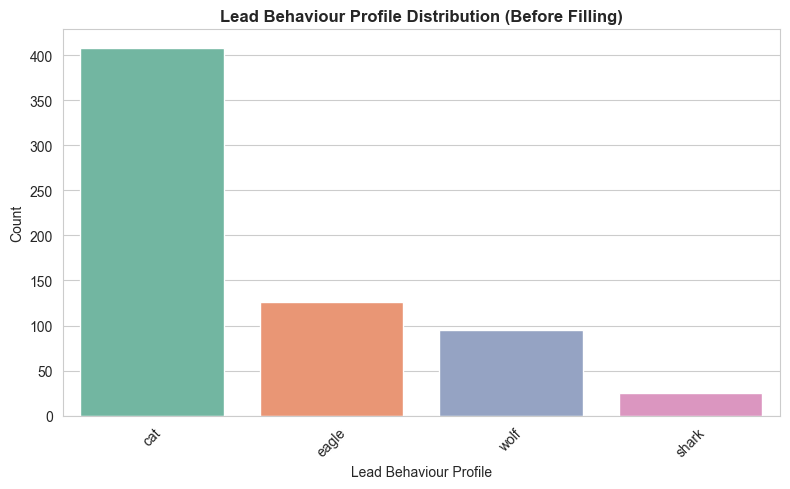


✓ Closed leads cleaned: (825, 10)
✓ Missing lead_behaviour_profile: 0


In [6]:
# ============================================================================
# Clean closed leads
# ============================================================================

# Drop rows with critical missing values
closed_leads_clean = closed_leads_clean.dropna(
    subset=['business_segment', 'lead_type', 'business_type']
)

# Standardize lead_behaviour_profile (extract first value from multi-values)
closed_leads_clean['lead_behaviour_profile'] = (
    closed_leads_clean['lead_behaviour_profile']
    .str.split(',')
    .str[0]
    .str.strip()
)

# Check unique values
print("Unique lead_behaviour_profile values:")
print(closed_leads_clean['lead_behaviour_profile'].unique())

# Visualize distribution before filling
plt.figure(figsize=(8, 5))
sns.countplot(data=closed_leads_clean, x='lead_behaviour_profile', palette='Set2')
plt.title('Lead Behaviour Profile Distribution (Before Filling)', fontweight='bold')
plt.xlabel('Lead Behaviour Profile')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Fill missing values with mode
mode_value = closed_leads_clean['lead_behaviour_profile'].mode()[0]
closed_leads_clean['lead_behaviour_profile'] = (
    closed_leads_clean['lead_behaviour_profile'].fillna(mode_value)
)
# Drop columns with excessive missing data
cols_to_drop = ['has_company', 'has_gtin', 'average_stock', 'declared_product_catalog_size']
closed_leads_clean = closed_leads_clean.drop(columns=cols_to_drop, errors='ignore')

# Convert date column
closed_leads_clean['won_date'] = pd.to_datetime(closed_leads_clean['won_date'], errors='coerce')

# Verify
print(f"\n✓ Closed leads cleaned: {closed_leads_clean.shape}")
print(f"✓ Missing lead_behaviour_profile: {closed_leads_clean['lead_behaviour_profile'].isnull().sum()}")

In [7]:
# ============================================================================
# Clean qualified leads
# ============================================================================

# Drop rows with missing origin
qualified_leads_clean = qualified_leads_clean.dropna(subset=['origin'])

# Convert date column
qualified_leads_clean['first_contact_date'] = pd.to_datetime(
    qualified_leads_clean['first_contact_date'], errors='coerce'
)

print(f"✓ Qualified leads cleaned: {qualified_leads_clean.shape}")
print(f"✓ Missing origin: {qualified_leads_clean['origin'].isnull().sum()}")

✓ Qualified leads cleaned: (7940, 4)
✓ Missing origin: 0


Review score unique values (first 20):
['4' '5' '1' nan '3' '2' '4/1/2018 0:27' '2/4/2018 11:06'
 '6/29/2017 13:48' '1/4/2018 0:00' '8/29/2017 21:06' '12/19/2017 23:21'
 '5/16/2018 23:41' '4/9/2017 18:25' '4/19/2018 0:00' '4/3/2018 21:11'
 '00 reais ... um produto com defeito e atÃ© agora nÃ£o me deu retor"'
 '8/11/2018 12:59' '4/4/2018 21:30' '3/8/2018 21:29']

✓ Order reviews cleaned: (99224, 3)
✓ Unique review scores: [1, 2, 3, 4, 5]
✓ Missing review_score: 0


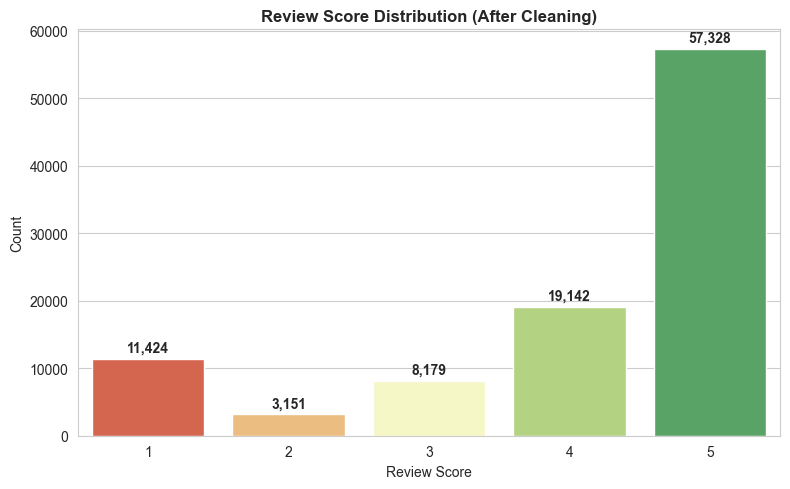

In [8]:
# ============================================================================
# Clean order reviews
# ============================================================================

# Drop unnecessary columns
cols_to_drop = [
    'review_creation_date', 'review_answer_timestamp',
    'review_comment_message', 'review_comment_title'
]
order_reviews_clean = order_reviews_clean.drop(columns=cols_to_drop, errors='ignore')

# Check review_score before cleaning
print("Review score unique values (first 20):")
print(order_reviews_clean['review_score'].unique()[:20])

# Clean review_score column
order_reviews_clean['review_score'] = pd.to_numeric(
    order_reviews_clean['review_score'], errors='coerce'
)

# Drop NaN values
order_reviews_clean = order_reviews_clean.dropna(subset=['review_score'])

# Keep only valid scores (1-5)
order_reviews_clean = order_reviews_clean[
    order_reviews_clean['review_score'].between(1, 5)
]

# Convert to integer
order_reviews_clean['review_score'] = order_reviews_clean['review_score'].astype(int)

# Check results
print(f"\n✓ Order reviews cleaned: {order_reviews_clean.shape}")
print(f"✓ Unique review scores: {sorted(order_reviews_clean['review_score'].unique())}")
print(f"✓ Missing review_score: {order_reviews_clean['review_score'].isnull().sum()}")

# Visualize distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=order_reviews_clean, x='review_score', palette='RdYlGn')
plt.title('Review Score Distribution (After Cleaning)', fontweight='bold')
plt.xlabel('Review Score')
plt.ylabel('Count')
for i, count in enumerate(order_reviews_clean['review_score'].value_counts().sort_index()):
    plt.text(i, count + 1000, f'{count:,}', ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

In [9]:
# ============================================================================
# Clean orders
# ============================================================================

# Drop rows with missing critical dates
orders_clean = orders_clean.dropna(
    subset=['order_approved_at', 'order_delivered_carrier_date']
)

# Convert all date columns to datetime
date_columns = [
    'order_purchase_timestamp', 'order_approved_at',
    'order_delivered_carrier_date', 'order_delivered_customer_date',
    'order_estimated_delivery_date'
]

for col in date_columns:
    orders_clean[col] = pd.to_datetime(orders_clean[col], errors='coerce')

print(f"✓ Orders cleaned: {orders_clean.shape}")
print(f"\n✓ Date columns converted:")
for col in date_columns:
    print(f"  - {col}: {orders_clean[col].dtype}")

✓ Orders cleaned: (97644, 8)

✓ Date columns converted:
  - order_purchase_timestamp: datetime64[ns]
  - order_approved_at: datetime64[ns]
  - order_delivered_carrier_date: datetime64[ns]
  - order_delivered_customer_date: datetime64[ns]
  - order_estimated_delivery_date: datetime64[ns]


In [10]:
# ============================================================================
# Clean products
# ============================================================================

# Drop rows with missing critical product information
products_clean = products_clean.dropna(subset=[
    'product_category_name', 'product_name_lenght',
    'product_description_lenght', 'product_photos_qty',
    'product_weight_g', 'product_length_cm',
    'product_height_cm', 'product_width_cm'
])

print(f"✓ Products cleaned: {products_clean.shape}")
print(f"✓ All critical product features present")

✓ Products cleaned: (32340, 9)
✓ All critical product features present


In [11]:
# ============================================================================
# Clean geolocation & remove duplicates
# ============================================================================

# Remove duplicates from geolocation
initial_geo_count = len(geolocation_clean)
geolocation_clean = geolocation_clean.drop_duplicates()
removed_geo_dupes = initial_geo_count - len(geolocation_clean)

# Remove duplicates from order_reviews
initial_review_count = len(order_reviews_clean)
order_reviews_clean = order_reviews_clean.drop_duplicates()
removed_review_dupes = initial_review_count - len(order_reviews_clean)

# Convert shipping_limit_date in order_items
order_items_clean['shipping_limit_date'] = pd.to_datetime(
    order_items_clean['shipping_limit_date'], errors='coerce'
)

print("="*70)
print("Duplicate Removal Summary")
print("="*70)
print(f"Geolocation duplicates removed: {removed_geo_dupes:,}")
print(f"Order reviews duplicates removed: {removed_review_dupes:,}")
print(f"\n✓ Final geolocation records: {len(geolocation_clean):,}")
print(f"✓ Final order reviews records: {len(order_reviews_clean):,}")

Duplicate Removal Summary
Geolocation duplicates removed: 261,836
Order reviews duplicates removed: 0

✓ Final geolocation records: 738,327
✓ Final order reviews records: 99,224


In [12]:
# ============================================================================
# Datasets cleaning summary
# ============================================================================
print("\n" + "="*70)
print("Final Cleaned Datasets")
print("="*70)

cleaned_datasets = {
    'customers': customers_clean,
    'geolocation': geolocation_clean,
    'closed_leads': closed_leads_clean,
    'qualified_leads': qualified_leads_clean,
    'order_items': order_items_clean,
    'order_payments': order_payments_clean,
    'order_reviews': order_reviews_clean,
    'orders': orders_clean,
    'product_cat_name': product_cat_name_clean,
    'products': products_clean,
    'sellers': sellers_clean
}

for name, df in cleaned_datasets.items():
    print(f"{name:20s}: {df.shape[0]:,} rows × {df.shape[1]} columns")

print("\n✓ All datasets cleaned and ready for analysis!")


Final Cleaned Datasets
customers           : 99,441 rows × 5 columns
geolocation         : 738,327 rows × 5 columns
closed_leads        : 825 rows × 10 columns
qualified_leads     : 7,940 rows × 4 columns
order_items         : 112,650 rows × 7 columns
order_payments      : 103,886 rows × 5 columns
order_reviews       : 99,224 rows × 3 columns
orders              : 97,644 rows × 8 columns
product_cat_name    : 71 rows × 2 columns
products            : 32,340 rows × 9 columns
sellers             : 3,095 rows × 4 columns

✓ All datasets cleaned and ready for analysis!


## **Feature Engineering**

In [13]:
# ============================================================================
#  Delivery Metrics
# ============================================================================

# Remove rows without actual delivery date
orders_clean = orders_clean.dropna(subset=['order_delivered_customer_date'])

# Calculate delivery delay in days
orders_clean['delivery_delay'] = (
    orders_clean['order_delivered_customer_date'] - 
    orders_clean['order_estimated_delivery_date']
).dt.days

# Categorize delivery status
orders_clean['delay_status'] = pd.cut(
    orders_clean['delivery_delay'],
    bins=[-float('inf'), -1, 0, float('inf')],
    labels=['Early', 'On Time', 'Late']
)

# Display summary
print("="*70)
print("Delivery Metrics Calculated")
print("="*70)
print(f"\nDelivery Delay Statistics:")
print(orders_clean['delivery_delay'].describe())

print(f"\n\nDelivery Status Distribution:")
print(orders_clean['delay_status'].value_counts())

print(f"\n✓ Delivery metrics added to orders dataset")

Delivery Metrics Calculated

Delivery Delay Statistics:
count    96461.000000
mean       -11.875577
std         10.183476
min       -147.000000
25%        -17.000000
50%        -12.000000
75%         -7.000000
max        188.000000
Name: delivery_delay, dtype: float64


Delivery Status Distribution:
delay_status
Early      88635
Late        6534
On Time     1292
Name: count, dtype: int64

✓ Delivery metrics added to orders dataset


In [14]:
# ============================================================================
# Seller-Customer Distance
# ============================================================================

# Aggregate geolocation data by zip code
geo_agg = (
    geolocation_clean.groupby("geolocation_zip_code_prefix")
    .agg({
        "geolocation_lat": "mean",
        "geolocation_lng": "mean",
        "geolocation_city": lambda x: x.mode()[0] if len(x) > 0 else None,
        "geolocation_state": lambda x: x.mode()[0] if len(x) > 0 else None
    })
    .reset_index()
)

# Merge geo info with customers
customers_geo = customers_clean.merge(
    geo_agg,
    left_on="customer_zip_code_prefix",
    right_on="geolocation_zip_code_prefix",
    how="left"
).rename(columns={
    "geolocation_lat": "customer_lat",
    "geolocation_lng": "customer_lng"
})

# Merge geo info with sellers
sellers_geo = sellers_clean.merge(
    geo_agg,
    left_on="seller_zip_code_prefix",
    right_on="geolocation_zip_code_prefix",
    how="left"
).rename(columns={
    "geolocation_lat": "seller_lat",
    "geolocation_lng": "seller_lng"
})


# Merge all data
orders_customers = orders_clean.merge(
    customers_geo[['customer_id', 'customer_city', 'customer_state', 
                   'customer_lat', 'customer_lng']],
    on="customer_id",
    how="left"
)

order_items_sellers = order_items_clean.merge(
    sellers_geo[['seller_id', 'seller_city', 'seller_state', 
                 'seller_lat', 'seller_lng']],
    on="seller_id",
    how="left"
)

orders_full = order_items_sellers.merge(orders_customers, on="order_id", how="left")

# Calculate geodesic distance
def calc_distance(row):
    """Calculate geodesic distance between seller and customer."""
    try:
        if pd.notna(row['seller_lat']) and pd.notna(row['customer_lat']):
            return geodesic(
                (row['seller_lat'], row['seller_lng']),
                (row['customer_lat'], row['customer_lng'])
            ).kilometers
    except:
        pass
    return np.nan

orders_full['seller_customer_distance_km'] = orders_full.apply(calc_distance, axis=1)

# Display results
print(f"\n✓ Seller-customer distances calculated")
print(f"✓ Records with distance data: {orders_full['seller_customer_distance_km'].notna().sum():,}")
print(f"\nDistance Statistics:")
print(orders_full['seller_customer_distance_km'].describe())



✓ Seller-customer distances calculated
✓ Records with distance data: 109,644

Distance Statistics:
count    109644.000000
mean        595.113565
std         586.553127
min           0.000000
25%         185.067839
50%         431.604363
75%         790.575894
max        8652.125673
Name: seller_customer_distance_km, dtype: float64


## **Exploratory Data Analysis**

Exploratory Data Analysis (EDA) is a crucial step in any data analysis project. As part of our EDA, we shall provide solutions to all the stated objectives and visisualize patterns, trends, and distributions to gain insigths. 

## **1. Customer Intelligence & Segmentation**

### 1.1 Analyze Purchasing Patterns across Geographic Regions (City/State Level)

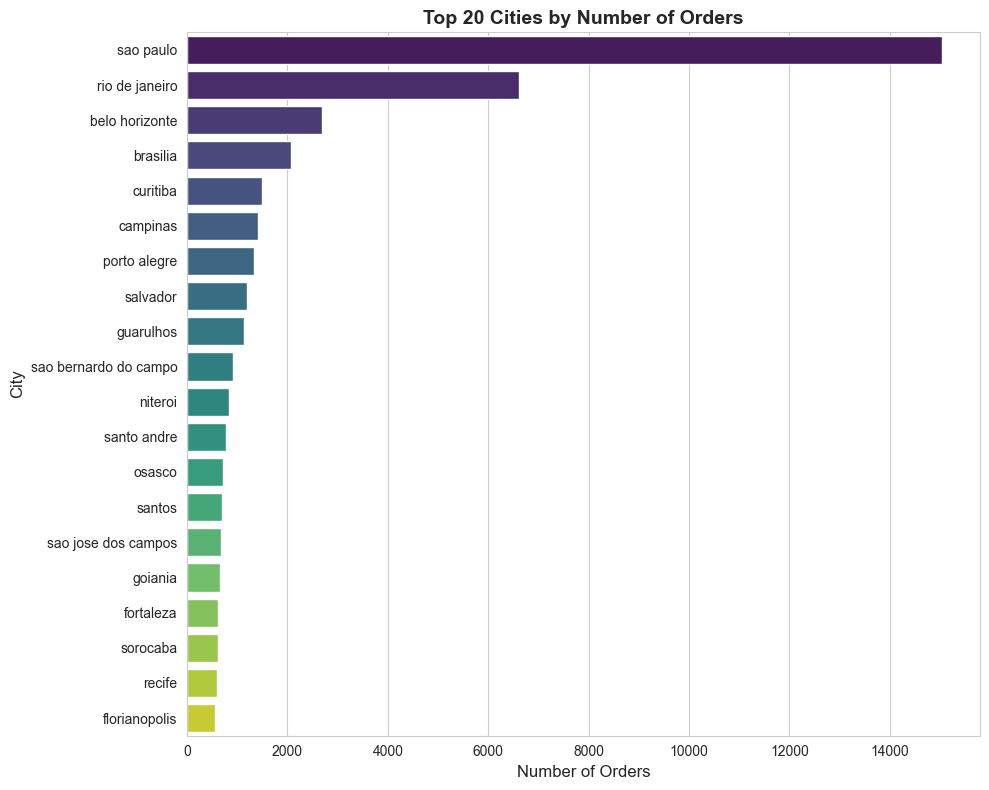

Top Cities - Key Insights
Top city: sao paulo (SP) with 15,044 orders
Top 3 cities account for 24,344 orders

São Paulo city dominance: 37.0% of top-20 orders


In [15]:
# ============================================================================
# Purchasing Behavior by City
# ============================================================================

# Merge orders with customer info
customer_orders = orders_clean.merge(
    customers_clean[['customer_id', 'customer_city', 'customer_state']],
    on="customer_id",
    how="left"
)

# Group by city and state to get number of orders
purchase_behavior = (
    customer_orders.groupby(["customer_city", "customer_state"])["order_id"]
    .count()
    .reset_index()
)
purchase_behavior.columns = ["City", "State", "OrderCount"]

# Top 20 cities
top_cities = purchase_behavior.sort_values(by="OrderCount", ascending=False).head(20)

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(y="City", x="OrderCount", data=top_cities, palette="viridis")
plt.title("Top 20 Cities by Number of Orders", fontsize=14, fontweight='bold')
plt.xlabel("Number of Orders", fontsize=12)
plt.ylabel("City", fontsize=12)
plt.tight_layout()
plt.show()

# Print insights
print("="*70)
print("Top Cities - Key Insights")
print("="*70)
print(f"Top city: {top_cities.iloc[0]['City']} ({top_cities.iloc[0]['State']}) "
      f"with {top_cities.iloc[0]['OrderCount']:,} orders")
print(f"Top 3 cities account for {top_cities.head(3)['OrderCount'].sum():,} orders")
print(f"\nSão Paulo city dominance: "
      f"{top_cities.iloc[0]['OrderCount'] / top_cities['OrderCount'].sum() * 100:.1f}% "
      f"of top-20 orders")

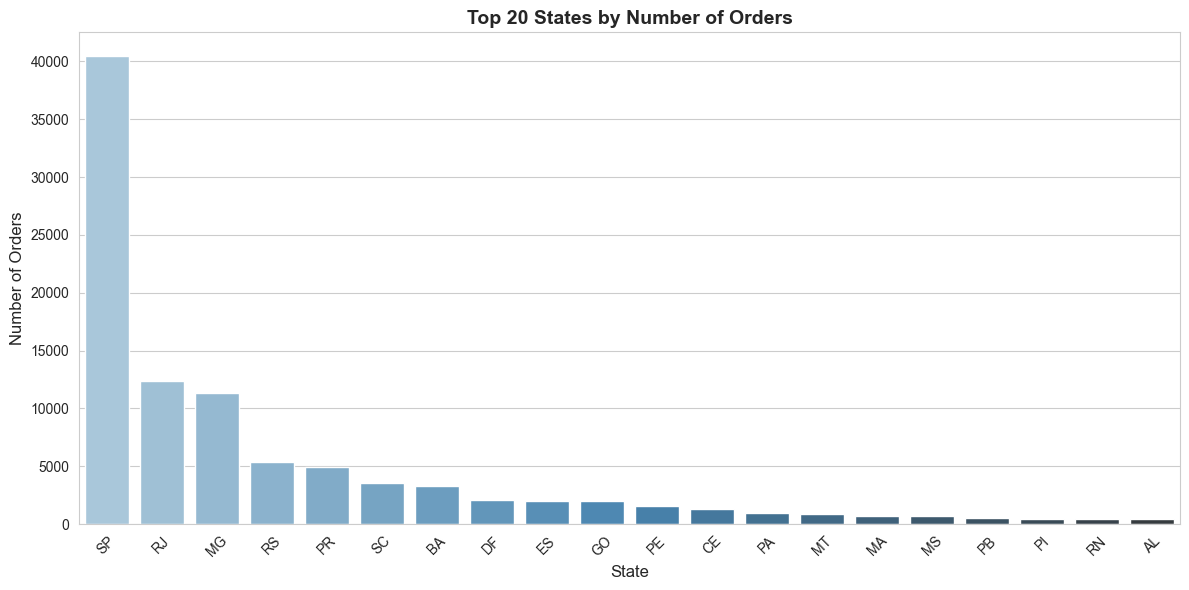

Top States - Key Insights
Top state: SP with 40,489 orders
Top 5 states account for 74,457 orders (78.1%)

📊 Business Insight:
São Paulo (SP) is the dominant market with over 40,000 orders,
significantly ahead of RJ and MG. This concentration suggests:
  • Prioritize logistics and inventory in SP
  • Explore growth opportunities in mid-tier states
  • Consider regional marketing strategies


In [16]:
# Purchasing Behavior by State
# ============================================================================

# Top 20 states
state_orders = (
    purchase_behavior.groupby("State")["OrderCount"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
    .head(20)
)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x="State", y="OrderCount", data=state_orders, palette="Blues_d")
plt.title("Top 20 States by Number of Orders", fontsize=14, fontweight='bold')
plt.xlabel("State", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print insights
print("="*70)
print("Top States - Key Insights")
print("="*70)
print(f"Top state: {state_orders.iloc[0]['State']} "
      f"with {state_orders.iloc[0]['OrderCount']:,} orders")
print(f"Top 5 states account for {state_orders.head(5)['OrderCount'].sum():,} orders "
      f"({state_orders.head(5)['OrderCount'].sum() / state_orders['OrderCount'].sum() * 100:.1f}%)")

print("\n📊 Business Insight:")
print("São Paulo (SP) is the dominant market with over 40,000 orders,")
print("significantly ahead of RJ and MG. This concentration suggests:")
print("  • Prioritize logistics and inventory in SP")
print("  • Explore growth opportunities in mid-tier states")
print("  • Consider regional marketing strategies")

### 1.2 Identify Customer Retention vs. Churn Trends

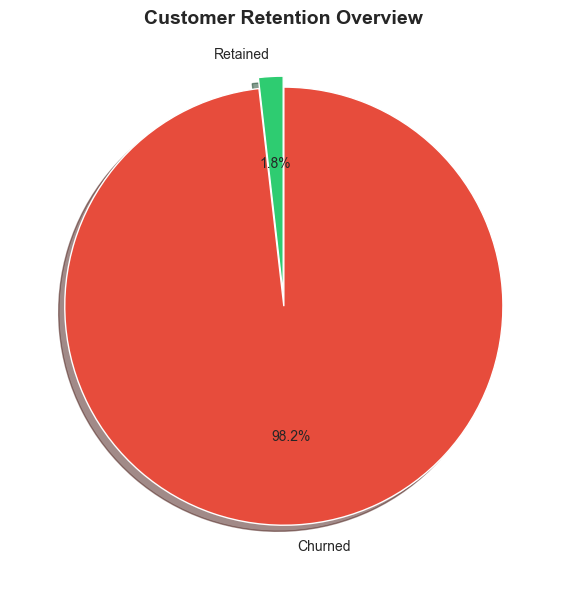

Customer Retention - Key Insights
Total customers: 93,342
Retained (>1 active month): 1,692 (1.8%)
Churned (1 active month): 91,650 (98.2%)

Average orders per customer: 1.03
Average customer lifetime: 2.6 days

⚠️ Business Insight:
High churn rate (98.2%) indicates most customers make only one purchase.
This pattern may reflect:
  • Limited dataset timeframe
  • Need for stronger retention strategies
  • Opportunity to implement loyalty programs


In [17]:
# ============================================================================
# Customer Retention Pattern
# ============================================================================

# Merge orders with customer unique ID
customer_orders_merged = orders_clean.merge(
    customers_clean[['customer_id', 'customer_unique_id']],
    on='customer_id',
    how='left'
)

# Convert purchase timestamp to monthly period
customer_orders_merged['order_month'] = (
    customer_orders_merged['order_purchase_timestamp'].dt.to_period('M')
)

# Count unique months each customer was active
customer_activity = (
    customer_orders_merged.groupby('customer_unique_id')
    .agg(
        num_orders=('order_id', 'nunique'),
        num_active_months=('order_month', 'nunique'),
        first_order=('order_purchase_timestamp', 'min'),
        last_order=('order_purchase_timestamp', 'max')
    )
    .reset_index()
)
# Calculate customer lifetime
customer_activity['customer_lifetime_days'] = (
    customer_activity['last_order'] - customer_activity['first_order']
).dt.days

# Classify as churned if only one active month
customer_activity['is_churned'] = (
    customer_activity['num_active_months'] == 1
).astype(int)

# Calculate percentages
churned_count = customer_activity['is_churned'].sum()
retained_count = len(customer_activity) - churned_count

# Plot pie chart
plt.figure(figsize=(8, 6))
sizes = [retained_count, churned_count]
labels = ['Retained', 'Churned']
colors = ['#2ecc71', '#e74c3c']
explode = (0.05, 0)

plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=explode,
    shadow=True
)
plt.title('Customer Retention Overview', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Print insights
print("="*70)
print("Customer Retention - Key Insights")
print("="*70)
print(f"Total customers: {len(customer_activity):,}")
print(f"Retained (>1 active month): {retained_count:,} ({retained_count/len(customer_activity)*100:.1f}%)")
print(f"Churned (1 active month): {churned_count:,} ({churned_count/len(customer_activity)*100:.1f}%)")
print(f"\nAverage orders per customer: {customer_activity['num_orders'].mean():.2f}")
print(f"Average customer lifetime: {customer_activity['customer_lifetime_days'].mean():.1f} days")

print("\n⚠️ Business Insight:")
print("High churn rate (98.2%) indicates most customers make only one purchase.")
print("This pattern may reflect:")
print("  • Limited dataset timeframe")
print("  • Need for stronger retention strategies")
print("  • Opportunity to implement loyalty programs")

### 1.3 Segment Customers by Purchase Frequency and Order Value to Enable Targeted Marketing.

Customer Order Value Distribution
count    93342.000000
mean       141.619482
std        215.708238
min          0.850000
25%         47.650000
50%         89.700000
75%        154.690000
max      13440.000000
Name: total_value, dtype: float64


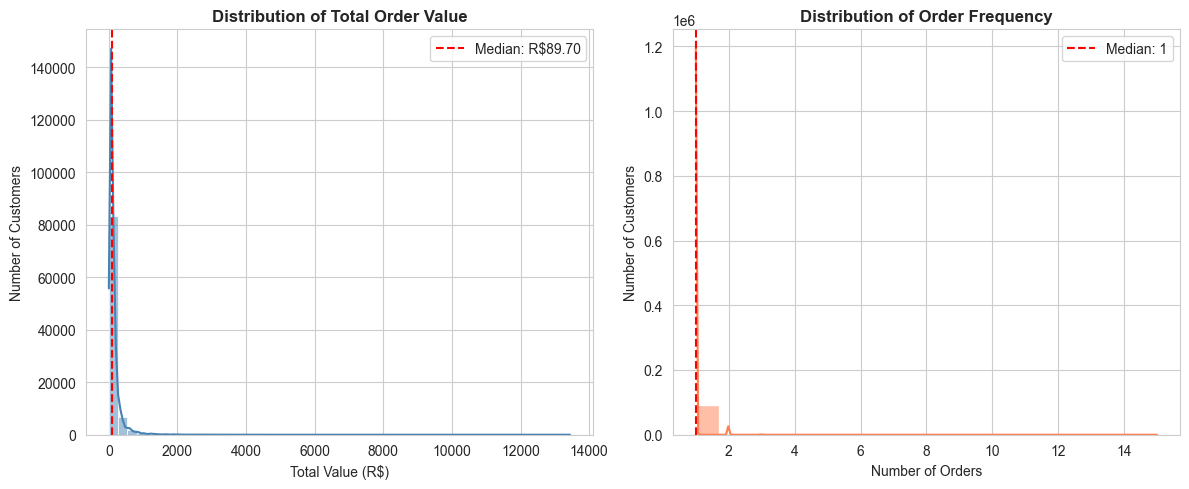


 Customer Segmentation Preview
                 customer_unique_id  order_frequency  total_value          customer_segment
0  0000366f3b9a7992bf8c76cfdf3221e2                1       129.90  occasional - low spender
1  0000b849f77a49e4a4ce2b2a4ca5be3f                1        18.90  occasional - low spender
2  0000f46a3911fa3c0805444483337064                1        69.00  occasional - low spender
3  0000f6ccb0745a6a4b88665a16c9f078                1        25.99  occasional - low spender
4  0004aac84e0df4da2b147fca70cf8255                1       180.00  occasional - low spender
5  0004bd2a26a76fe21f786e4fbd80607f                1       154.00  occasional - low spender
6  00050ab1314c0e55a6ca13cf7181fecf                1        27.99  occasional - low spender
7  00053a61a98854899e70ed204dd4bafe                1       382.00  occasional - low spender
8  0005e1862207bf6ccc02e4228effd9a0                1       135.00  occasional - low spender
9  0005ef4cd20d2893f0d9fbd94d3c0d97             

In [18]:
# ============================================================================
# Customer Segmentation
# ============================================================================

# Merge orders with items to get pricing
segment_data = orders_clean[['order_id', 'customer_id', 'order_purchase_timestamp']].merge(
    order_items_clean[['order_id', 'price']],
    on='order_id',
    how='left'
)

# Merge with customer unique ID
segment_data = segment_data.merge(
    customers_clean[['customer_id', 'customer_unique_id']],
    on='customer_id',
    how='left'
)

# Calculate customer metrics
customer_metrics = (
    segment_data.groupby('customer_unique_id')
    .agg(
        order_frequency=('order_id', 'nunique'),
        total_value=('price', 'sum'),
        avg_order_value=('price', 'mean')
    )
    .reset_index()
)

# Check distribution before segmentation
print("="*70)
print("Customer Order Value Distribution")
print("="*70)
print(customer_metrics['total_value'].describe())

# Plot distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(customer_metrics['total_value'], bins=50, kde=True, color='steelblue')
plt.title('Distribution of Total Order Value', fontweight='bold')
plt.xlabel('Total Value (R$)')
plt.ylabel('Number of Customers')
plt.axvline(customer_metrics['total_value'].median(), color='red', linestyle='--', 
            label=f'Median: R${customer_metrics["total_value"].median():.2f}')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(customer_metrics['order_frequency'], bins=20, kde=True, color='coral')
plt.title('Distribution of Order Frequency', fontweight='bold')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.axvline(customer_metrics['order_frequency'].median(), color='red', linestyle='--',
            label=f'Median: {customer_metrics["order_frequency"].median():.0f}')
plt.legend()

plt.tight_layout()
plt.show()

# Define segmentation bins
freq_bins = [0, 2, 5, float('inf')]
freq_labels = ['occasional', 'regular', 'frequent']

value_bins = [0, 500, 1500, float('inf')]
value_labels = ['low spender', 'moderate spender', 'high spender']

# Apply segmentation
customer_metrics['frequency_segment'] = pd.cut(
    customer_metrics['order_frequency'],
    bins=freq_bins,
    labels=freq_labels,
    include_lowest=True
)

customer_metrics['value_segment'] = pd.cut(
    customer_metrics['total_value'],
    bins=value_bins,
    labels=value_labels,
    include_lowest=True
)

# Combined segment
customer_metrics['customer_segment'] = (
    customer_metrics['frequency_segment'].astype(str) + ' - ' +
    customer_metrics['value_segment'].astype(str)
)

# Preview results
print("\n" + "="*70)
print(" Customer Segmentation Preview")
print("="*70)
print(customer_metrics[['customer_unique_id', 'order_frequency', 'total_value', 
                        'customer_segment']].head(10))

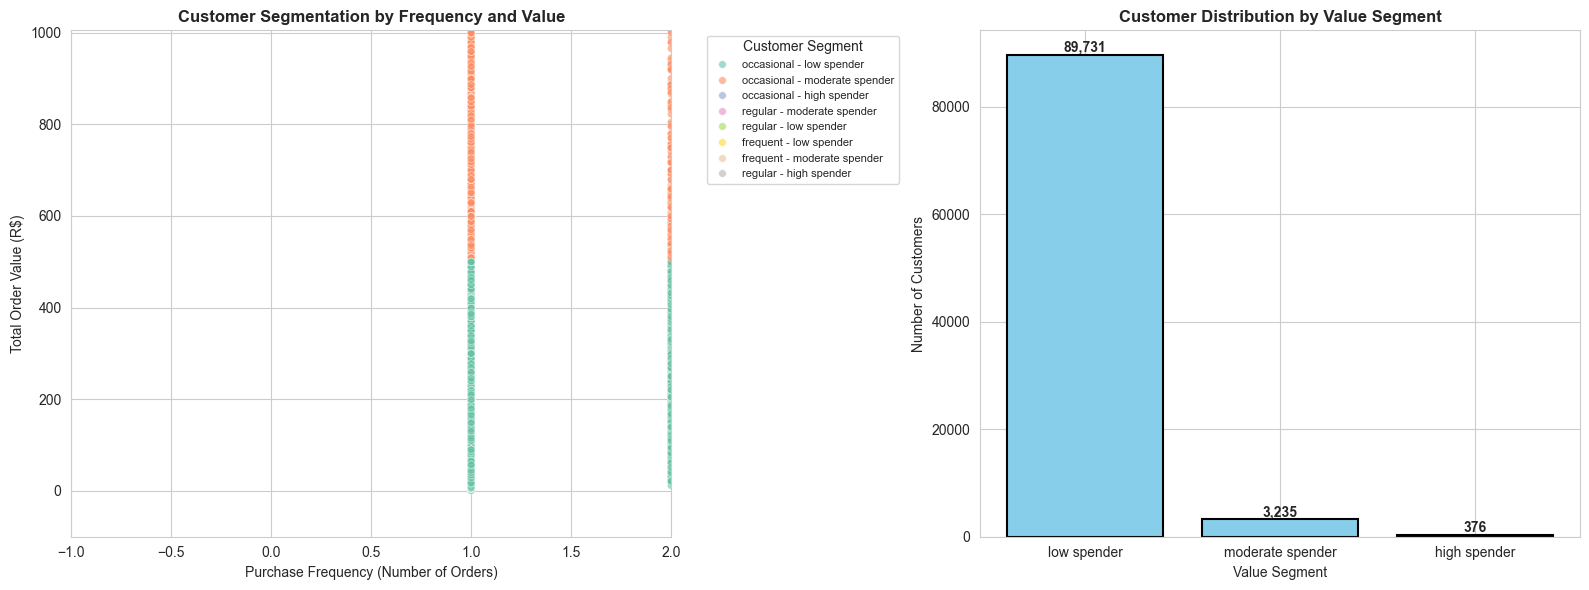

 Customer Segmentation - Summary
                               count  total_value  avg_order_value
customer_segment                                                  
occasional - low spender       89567   9815363.19        98.967815
occasional - moderate spender   3178   2490372.32       681.289840
occasional - high spender        369    816176.32      1878.503778
regular - low spender            162     39565.28        67.726188
regular - moderate spender        49     36127.11       177.386185
regular - high spender             7     14845.30       283.335190
frequent - moderate spender        8      6099.67        73.101116
frequent - low spender             2       496.49        41.374167


📊 Key Insights:
Low spenders: 89,731 (96.1%)
Moderate spenders: 3,235 (3.5%)
High spenders: 376 (0.4%)

💡 Business Recommendations:
  • Target occasional high spenders with VIP loyalty programs
  • Upsell to regular/frequent low spenders to increase order value
  • Replicate behaviors of freque

In [19]:
# ============================================================================
# Visualize Customer Segmentation
# ============================================================================

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot with segments
sns.scatterplot(
    data=customer_metrics,
    x='order_frequency',
    y='total_value',
    hue='customer_segment',
    palette='Set2',
    alpha=0.6,
    s=30,
    ax=axes[0]
)
axes[0].set_title('Customer Segmentation by Frequency and Value', 
                  fontsize=12, fontweight='bold')
axes[0].set_xlabel('Purchase Frequency (Number of Orders)')
axes[0].set_ylabel('Total Order Value (R$)')
axes[0].legend(title='Customer Segment', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
axes[0].set_xlim(-1, customer_metrics['order_frequency'].quantile(0.99))
axes[0].set_ylim(-100, customer_metrics['total_value'].quantile(0.99))

# Value segment distribution
value_counts = customer_metrics['value_segment'].value_counts().sort_index()

bars = axes[1].bar(value_counts.index, value_counts.values, 
                   color='skyblue', edgecolor='black', linewidth=1.5)
axes[1].set_title('Customer Distribution by Value Segment', 
                  fontsize=12, fontweight='bold')
axes[1].set_xlabel('Value Segment')
axes[1].set_ylabel('Number of Customers')
axes[1].set_xticklabels(value_counts.index, rotation=0)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Print segment summary
print("="*70)
print(" Customer Segmentation - Summary")
print("="*70)

segment_summary = customer_metrics.groupby('customer_segment').agg({
    'customer_unique_id': 'count',
    'total_value': 'sum',
    'avg_order_value': 'mean'
}).rename(columns={'customer_unique_id': 'count'}).sort_values('total_value', ascending=False)

print(segment_summary.to_string())

print(f"\n\n📊 Key Insights:")
print(f"Low spenders: {value_counts['low spender']:,} ({value_counts['low spender']/len(customer_metrics)*100:.1f}%)")
print(f"Moderate spenders: {value_counts['moderate spender']:,} ({value_counts['moderate spender']/len(customer_metrics)*100:.1f}%)")
print(f"High spenders: {value_counts['high spender']:,} ({value_counts['high spender']/len(customer_metrics)*100:.1f}%)")

print("\n💡 Business Recommendations:")
print("  • Target occasional high spenders with VIP loyalty programs")
print("  • Upsell to regular/frequent low spenders to increase order value")
print("  • Replicate behaviors of frequent-moderate/high spenders")

### 1.4 Predict customer lifetime value (CLV) for strategic account management

In [20]:
# ============================================================================
# Compute Customer LifeTime Value
# ============================================================================

# Merge datasets
clv_data = (
    orders_clean[['order_id', 'customer_id', 'order_purchase_timestamp']]
    .merge(order_items_clean[['order_id', 'price']], on='order_id')
    .merge(order_reviews_clean[['order_id', 'review_score']], on='order_id', how='left')
    .merge(customers_clean[['customer_id', 'customer_unique_id']], on='customer_id')
)

# Aggregate per customer
customer_clv = (
    clv_data.groupby('customer_unique_id')
    .agg(
        total_revenue=('price', 'sum'),
        num_orders=('order_id', 'nunique'),
        first_purchase=('order_purchase_timestamp', 'min'),
        last_purchase=('order_purchase_timestamp', 'max'),
        avg_review_score=('review_score', 'mean')
    )
    .reset_index()
)

# Calculate customer lifetime
customer_clv['customer_lifetime_days'] = (
    customer_clv['last_purchase'] - customer_clv['first_purchase']
).dt.days

# Avoid division by zero
customer_clv['customer_lifetime_days'] = customer_clv['customer_lifetime_days'].replace(0, 1/365)

# Calculate metrics
customer_clv['avg_order_value'] = customer_clv['total_revenue'] / customer_clv['num_orders']
customer_clv['purchase_frequency'] = customer_clv['num_orders'] / (customer_clv['customer_lifetime_days'] / 365)

# Historical CLV
customer_clv['clv'] = customer_clv['avg_order_value'] * customer_clv['purchase_frequency']

# Adjust by satisfaction
customer_clv['normalized_review'] = (customer_clv['avg_review_score'] - 1) / 4
customer_clv['adjusted_clv'] = customer_clv['clv'] * customer_clv['normalized_review']

print("="*70)
print("Customer LifeTime Value Calculation")
print("="*70)
print(f"Total customers analyzed: {len(customer_clv):,}")
print(f"\nCLV Statistics:")
print(customer_clv[['clv', 'adjusted_clv']].describe())

print(f"\nTop 5 Customers by CLV:")
print(customer_clv.nlargest(5, 'adjusted_clv')[
    ['customer_unique_id', 'total_revenue', 'num_orders', 'adjusted_clv']
].to_string(index=False))

Customer LifeTime Value Calculation
Total customers analyzed: 93,342

CLV Statistics:
                clv  adjusted_clv
count  9.334200e+04  9.273900e+04
mean   1.816739e+07  1.396936e+07
std    2.837902e+07  2.371769e+07
min    3.433407e+01  0.000000e+00
25%    5.981802e+06  3.366596e+06
50%    1.132279e+07  7.980178e+06
75%    1.997043e+07  1.597701e+07
max    1.790544e+09  9.842663e+08

Top 5 Customers by CLV:
              customer_unique_id  total_revenue  num_orders  adjusted_clv
da122df9eeddfedc1dc1f5349a1a690c         7388.0           2   984266300.0
dc4802a71eae9be1dd28f5d788ceb526         6735.0           1   897270375.0
ff4159b92c40ebe40454e3e6a7c35ed6         6499.0           1   865829275.0
48e1ac109decbb87765a3eade6854098         4590.0           1   611502750.0
a229eba70ec1c2abef51f04987deb7a5         4400.0           1   586190000.0


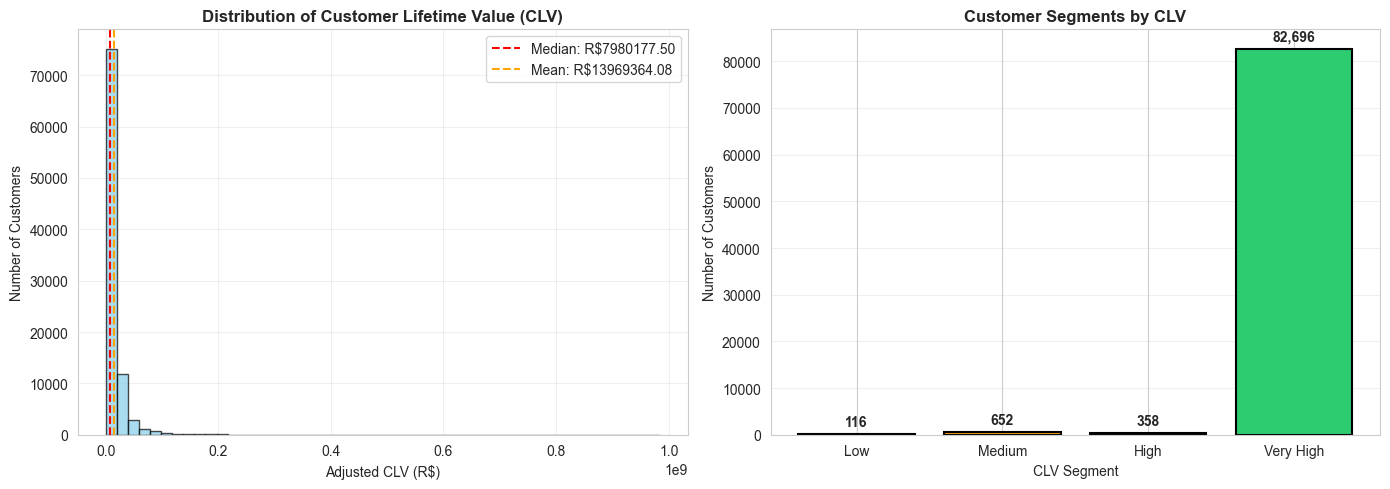


Customer LifeTime Value - Key Insights
Total customers: 93,342
Average CLV: R$13969364.08
Median CLV: R$7980177.50
Top 10% CLV threshold: R$29079287.20

High-value customers (>R$1000): 82,696 (88.6%)

💡 Strategic Insights:
  • CLV is highly right-skewed (median < mean)
  • Small segment of high-value customers drives disproportionate value
  • Focus retention efforts on top 10% of customers


In [21]:
# ============================================================================
# Visualize CLV Distribution
# ============================================================================
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# CLV distribution
axes[0].hist(customer_clv['adjusted_clv'], bins=50, color='skyblue', 
             edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution of Customer Lifetime Value (CLV)', fontweight='bold')
axes[0].set_xlabel('Adjusted CLV (R$)')
axes[0].set_ylabel('Number of Customers')
axes[0].axvline(customer_clv['adjusted_clv'].median(), color='red', 
                linestyle='--', label=f'Median: R${customer_clv["adjusted_clv"].median():.2f}')
axes[0].axvline(customer_clv['adjusted_clv'].mean(), color='orange', 
                linestyle='--', label=f'Mean: R${customer_clv["adjusted_clv"].mean():.2f}')
axes[0].legend()
axes[0].grid(alpha=0.3)

# CLV segments
clv_segments = pd.cut(
    customer_clv['adjusted_clv'],
    bins=[0, 100, 500, 1000, float('inf')],
    labels=['Low', 'Medium', 'High', 'Very High']
)
segment_counts = clv_segments.value_counts().sort_index()

bars = axes[1].bar(segment_counts.index, segment_counts.values, 
                   color=['#e74c3c', '#f39c12', '#3498db', '#2ecc71'], 
                   edgecolor='black', linewidth=1.5)
axes[1].set_title('Customer Segments by CLV', fontweight='bold')
axes[1].set_xlabel('CLV Segment')
axes[1].set_ylabel('Number of Customers')
axes[1].grid(axis='y', alpha=0.3)

# Add value labels
for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + max(segment_counts.values)*0.02,
                f'{int(height):,}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Print insights
print("\n" + "="*70)
print("Customer LifeTime Value - Key Insights")
print("="*70)
print(f"Total customers: {len(customer_clv):,}")
print(f"Average CLV: R${customer_clv['adjusted_clv'].mean():.2f}")
print(f"Median CLV: R${customer_clv['adjusted_clv'].median():.2f}")
print(f"Top 10% CLV threshold: R${customer_clv['adjusted_clv'].quantile(0.9):.2f}")
print(f"\nHigh-value customers (>R$1000): {(customer_clv['adjusted_clv'] > 1000).sum():,} "
      f"({(customer_clv['adjusted_clv'] > 1000).mean() * 100:.1f}%)")

print("\n💡 Strategic Insights:")
print("  • CLV is highly right-skewed (median < mean)")
print("  • Small segment of high-value customers drives disproportionate value")
print("  • Focus retention efforts on top 10% of customers")

## **2. Sales Performance & Revenue Analytics**

### 2.1 Identify Top-Performing Product Categories, Sellers, and Geographic Markets

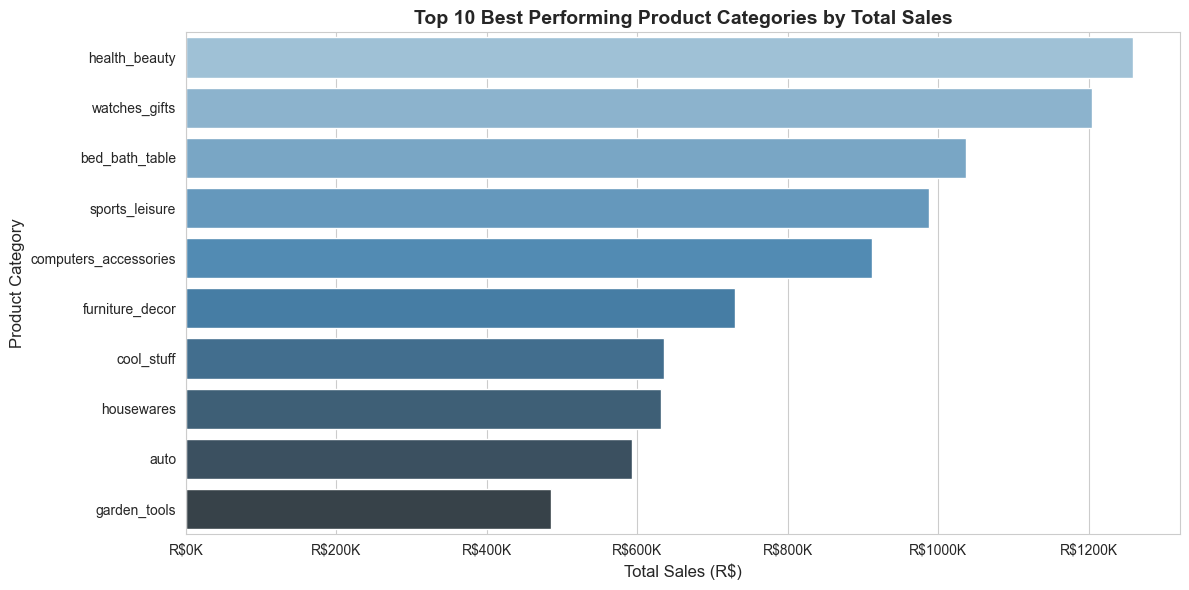

Top Performing Product Categories - Key Insights
Top category: health_beauty
  - Total sales: R$1,258,681.34
  - Total orders: 9,670

Top 3 categories contribute:
  - R$3,500,675.70
  - 41.3% of top-10 sales


In [22]:
# ============================================================================
#  top-performing product categories
# ============================================================================

# Merge product info with category names
merged_product = products_clean[['product_id', 'product_category_name']].merge(
    product_cat_name_clean,
    on='product_category_name',
    how='left'
)

# Merge with order items
merged_data = merged_product.merge(
    order_items_clean[['order_id', 'product_id', 'seller_id', 'price']],
    on='product_id',
    how='left'
)

# Merge with customer region info
orders_customers = orders_clean[['order_id', 'customer_id']].merge(
    customers_clean[['customer_id', 'customer_state']],
    on='customer_id',
    how='left'
)

merged_data = merged_data.merge(
    orders_customers[['order_id', 'customer_state']],
    on='order_id',
    how='left'
)
# Top product categories
top_products = (
    merged_data.groupby('product_category_name_english')
    .agg(
        total_orders=('order_id', 'count'),
        total_sales=('price', 'sum')
    )
    .sort_values('total_sales', ascending=False)
    .reset_index()
    .head(10)
)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_products,
    x='total_sales',
    y='product_category_name_english',
    palette='Blues_d'
)
plt.title("Top 10 Best Performing Product Categories by Total Sales", 
          fontsize=14, fontweight='bold')
plt.xlabel("Total Sales (R$)", fontsize=12)
plt.ylabel("Product Category", fontsize=12)

# Format x-axis
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'R${x/1000:.0f}K'))

plt.tight_layout()
plt.show()

# Print insights
print("="*70)
print("Top Performing Product Categories - Key Insights")
print("="*70)
print(f"Top category: {top_products.iloc[0]['product_category_name_english']}")
print(f"  - Total sales: R${top_products.iloc[0]['total_sales']:,.2f}")
print(f"  - Total orders: {top_products.iloc[0]['total_orders']:,}")

print(f"\nTop 3 categories contribute:")
print(f"  - R${top_products.head(3)['total_sales'].sum():,.2f}")
print(f"  - {top_products.head(3)['total_sales'].sum() / top_products['total_sales'].sum() * 100:.1f}% of top-10 sales")


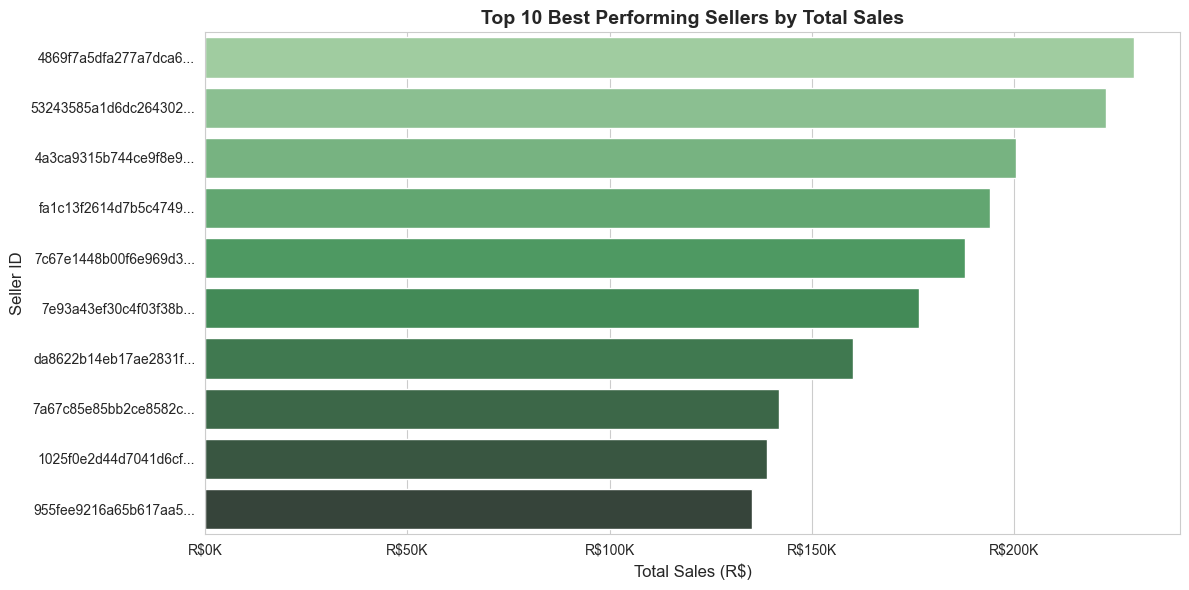

Top Performing Sellers - Key Insights
Top seller sales: R$229,472.63
Average sales per top-10 seller: R$178,724.17
Median sales: R$182,177.88

💡 Business Insight:
Significant concentration of sales among top sellers suggests:
  • Prioritize strategic partnerships with top performers
  • Analyze best practices to support mid-tier sellers
  • Mitigate risk by diversifying seller base


In [23]:
# ============================================================================
# Top Performing Sellers
# ============================================================================

seller_perf = (
    order_items_clean.groupby('seller_id')
    .agg(
        total_orders=('order_id', 'count'),
        total_sales=('price', 'sum')
    )
    .sort_values('total_sales', ascending=False)
    .reset_index()
    .head(10)
)

# Plot
plt.figure(figsize=(12, 6))

# Truncate seller IDs for display
seller_perf['seller_id_short'] = seller_perf['seller_id'].str[:20] + '...'

sns.barplot(
    data=seller_perf,
    x='total_sales',
    y='seller_id_short',
    palette='Greens_d'
)
plt.title("Top 10 Best Performing Sellers by Total Sales", 
          fontsize=14, fontweight='bold')
plt.xlabel("Total Sales (R$)", fontsize=12)
plt.ylabel("Seller ID", fontsize=12)

# Format x-axis
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'R${x/1000:.0f}K'))

plt.tight_layout()
plt.show()

# Print insights
print("="*70)
print("Top Performing Sellers - Key Insights")
print("="*70)
print(f"Top seller sales: R${seller_perf.iloc[0]['total_sales']:,.2f}")
print(f"Average sales per top-10 seller: R${seller_perf['total_sales'].mean():,.2f}")
print(f"Median sales: R${seller_perf['total_sales'].median():,.2f}")

print("\n💡 Business Insight:")
print("Significant concentration of sales among top sellers suggests:")
print("  • Prioritize strategic partnerships with top performers")
print("  • Analyze best practices to support mid-tier sellers")
print("  • Mitigate risk by diversifying seller base")

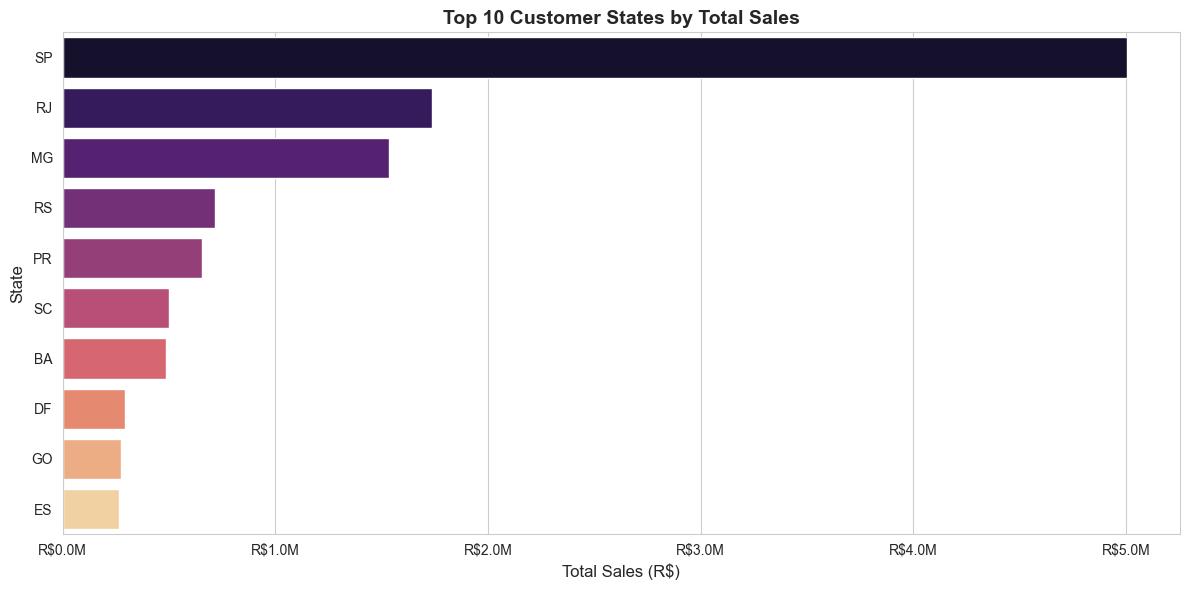

Top Performing Regions - Key Insights
Top state: SP with R$5,003,084.01
Top state dominance: 43.6% of top-10 sales

📊 Regional concentration indicates:
  • Double down on marketing and logistics in SP
  • Replicate SP success tactics in RJ and MG
  • Explore targeted campaigns in mid-tier states


In [24]:
# ============================================================================
# Top Performing Regions
# ============================================================================

top_regions = (
    merged_data.groupby('customer_state')
    .agg(total_sales=('price', 'sum'))
    .sort_values('total_sales', ascending=False)
    .head(10)
    .reset_index()
)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_regions, x='total_sales', y='customer_state', palette='magma')
plt.title('Top 10 Customer States by Total Sales', fontsize=14, fontweight='bold')
plt.xlabel('Total Sales (R$)', fontsize=12)
plt.ylabel('State', fontsize=12)

# Format x-axis
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'R${x/1e6:.1f}M'))

plt.tight_layout()
plt.show()
# Print insights
print("="*70)
print("Top Performing Regions - Key Insights")
print("="*70)
print(f"Top state: {top_regions.iloc[0]['customer_state']} "
      f"with R${top_regions.iloc[0]['total_sales']:,.2f}")
print(f"Top state dominance: "
      f"{top_regions.iloc[0]['total_sales'] / top_regions['total_sales'].sum() * 100:.1f}% "
      f"of top-10 sales")

print("\n📊 Regional concentration indicates:")
print("  • Double down on marketing and logistics in SP")
print("  • Replicate SP success tactics in RJ and MG")
print("  • Explore targeted campaigns in mid-tier states")

### 2.2 Analyze Payment Method Preferences and their Correlation with Revenue

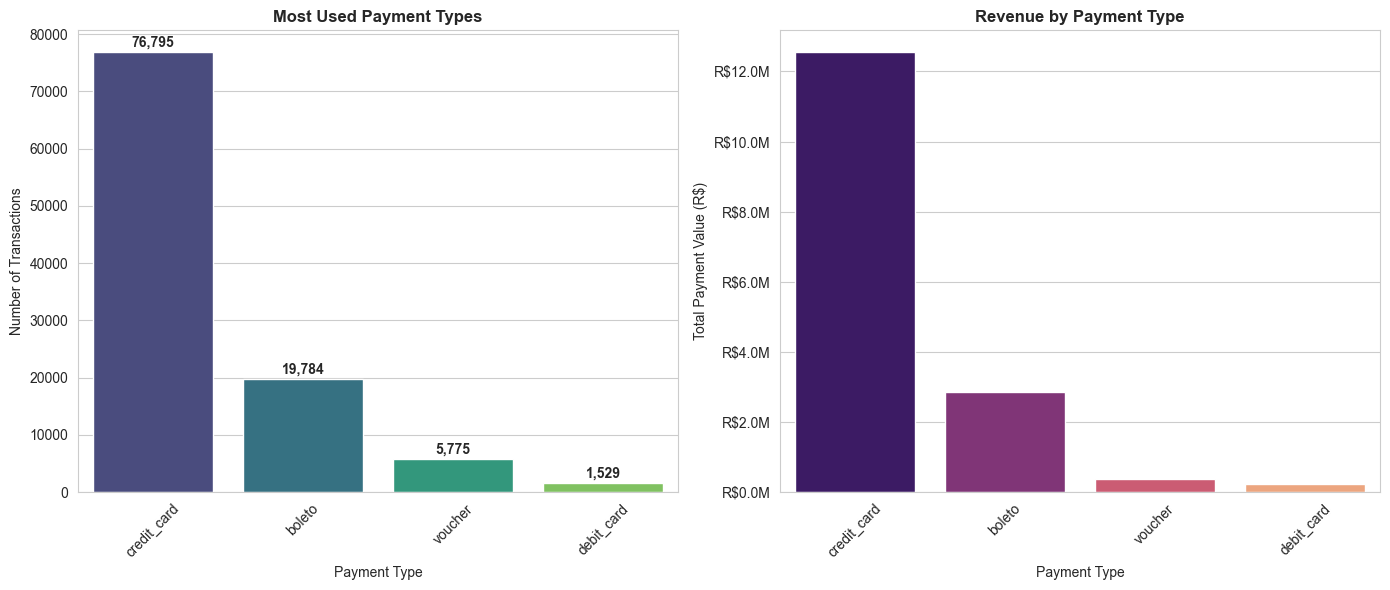

Payment Methods - Key Insights
Most used: credit_card
  - Transactions: 76,795 (73.9%)
  - Revenue: R$12,542,084.19

Highest revenue method: credit_card
  - R$12,542,084.19

💡 Strategic Opportunities:
  • Optimize credit card experience (most popular)
  • Explore incentives for alternative methods
  • Monitor payment processing fees and risks


In [25]:
# ============================================================================
# Payment Methods and Revenue
# ============================================================================

# Frequency of each payment type
payment_freq = (
    order_payments_clean['payment_type']
    .value_counts()
    .reset_index()
)
payment_freq.columns = ['payment_type', 'count']

# Total revenue by payment type
payment_value = (
    order_payments_clean.groupby('payment_type')['payment_value']
    .sum()
    .reset_index()
)
payment_value.columns = ['payment_type', 'total_value']

# Merge
payment_analysis = payment_freq.merge(payment_value, on='payment_type')
payment_analysis = payment_analysis[payment_analysis['payment_type'] != 'not_defined']

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Payment frequency
sns.barplot(
    data=payment_analysis,
    x='payment_type',
    y='count',
    palette='viridis',
    ax=axes[0]
)
axes[0].set_title('Most Used Payment Types', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Number of Transactions')
axes[0].set_xlabel('Payment Type')
axes[0].tick_params(axis='x', rotation=45)

# Add value labels
for i, v in enumerate(payment_analysis['count']):
    axes[0].text(i, v + 1000, f'{v:,}', ha='center', fontweight='bold')

# Revenue by payment type
sns.barplot(
    data=payment_analysis,
    x='payment_type',
    y='total_value',
    palette='magma',
    ax=axes[1]
)
axes[1].set_title('Revenue by Payment Type', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Total Payment Value (R$)')
axes[1].set_xlabel('Payment Type')
axes[1].tick_params(axis='x', rotation=45)

# Format y-axis
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'R${x/1e6:.1f}M'))

plt.tight_layout()
plt.show()

# Print insights
print("="*70)
print("Payment Methods - Key Insights")
print("="*70)
top_method = payment_analysis.iloc[0]
print(f"Most used: {top_method['payment_type']}")
print(f"  - Transactions: {top_method['count']:,} ({top_method['count']/payment_analysis['count'].sum()*100:.1f}%)")
print(f"  - Revenue: R${top_method['total_value']:,.2f}")

print(f"\nHighest revenue method: {payment_analysis.loc[payment_analysis['total_value'].idxmax(), 'payment_type']}")
print(f"  - R${payment_analysis['total_value'].max():,.2f}")

print("\n💡 Strategic Opportunities:")
print("  • Optimize credit card experience (most popular)")
print("  • Explore incentives for alternative methods")
print("  • Monitor payment processing fees and risks")


### 2.3 Assess Lead Qualification Effectiveness and Conversion Funnel Performance

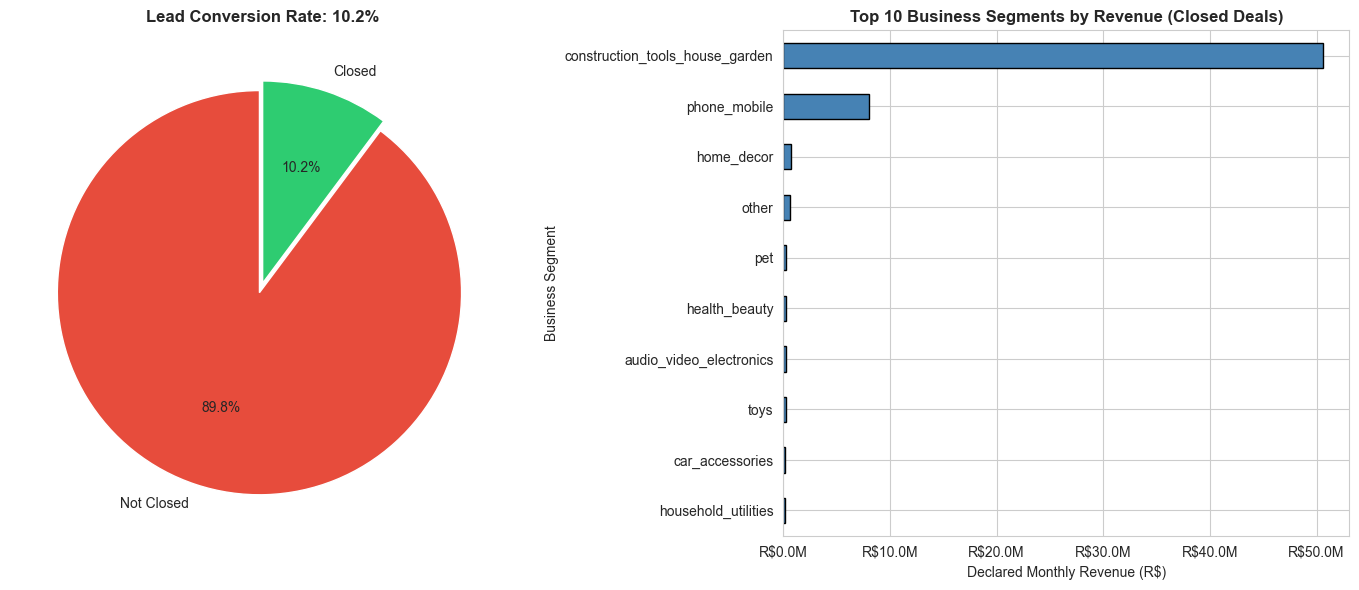

Lead Conversion - Key Insights
Total qualified leads: 7,940
Total closed deals: 811
Conversion rate: 10.21%
Total revenue from closed deals: R$61,634,006.00
Average revenue per deal: R$75,997.54

⚠️ Business Insight:
Low conversion rate (10.2%) indicates significant funnel leakage.
Key opportunities:
  • Review lead qualification criteria
  • Analyze sales engagement and follow-up practices
  • Identify objections and drop-off reasons


In [26]:
# ============================================================================
# Lead Qualification to Closed Deals
# ============================================================================

# Merge qualified and closed leads
merged_leads = qualified_leads_clean.merge(
    closed_leads_clean[['mql_id', 'won_date', 'declared_monthly_revenue', 'business_segment']],
    on='mql_id',
    how='left'
)

# Add conversion flag
merged_leads['is_closed'] = merged_leads['won_date'].notna().astype(int)

# Calculate metrics
total_qualified_leads = merged_leads['mql_id'].nunique()
total_closed_leads = merged_leads[merged_leads['is_closed'] == 1]['mql_id'].nunique()
conversion_rate = (total_closed_leads / total_qualified_leads) * 100

# Revenue metrics
merged_leads['declared_monthly_revenue'] = pd.to_numeric(
    merged_leads['declared_monthly_revenue'], errors='coerce'
)
total_revenue = merged_leads[merged_leads['is_closed'] == 1]['declared_monthly_revenue'].sum()
avg_revenue = merged_leads[merged_leads['is_closed'] == 1]['declared_monthly_revenue'].mean()

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Conversion pie chart
conversion_data = merged_leads['is_closed'].value_counts()
axes[0].pie(
    conversion_data.values,
    labels=['Not Closed', 'Closed'],
    autopct='%1.1f%%',
    colors=['#e74c3c', '#2ecc71'],
    startangle=90,
    explode=(0.05, 0)
)
axes[0].set_title(f'Lead Conversion Rate: {conversion_rate:.1f}%', 
                  fontsize=12, fontweight='bold')

# Revenue by business segment (closed deals only)
closed_leads_data = merged_leads[merged_leads['is_closed'] == 1].copy()
segment_revenue = (
    closed_leads_data.groupby('business_segment')['declared_monthly_revenue']
    .sum()
    .sort_values(ascending=True)
    .tail(10)
)

segment_revenue.plot(kind='barh', ax=axes[1], color='steelblue', edgecolor='black')
axes[1].set_title('Top 10 Business Segments by Revenue (Closed Deals)', 
                  fontsize=12, fontweight='bold')
axes[1].set_xlabel('Declared Monthly Revenue (R$)')
axes[1].set_ylabel('Business Segment')
axes[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'R${x/1e6:.1f}M'))

plt.tight_layout()
plt.show()

# Print insights
print("="*70)
print("Lead Conversion - Key Insights")
print("="*70)
print(f"Total qualified leads: {total_qualified_leads:,}")
print(f"Total closed deals: {total_closed_leads:,}")
print(f"Conversion rate: {conversion_rate:.2f}%")
print(f"Total revenue from closed deals: R${total_revenue:,.2f}")
print(f"Average revenue per deal: R${avg_revenue:,.2f}")

print("\n⚠️ Business Insight:")
print("Low conversion rate (10.2%) indicates significant funnel leakage.")
print("Key opportunities:")
print("  • Review lead qualification criteria")
print("  • Analyze sales engagement and follow-up practices")
print("  • Identify objections and drop-off reasons")

In [27]:
# ============================================================================
# Lead Conversion Funnel
# ============================================================================

# Create funnel data
funnel_data = pd.DataFrame({
    'Stage': ['Qualified Leads', 'Closed Deals'],
    'Count': [total_qualified_leads, total_closed_leads]
})

# Create funnel chart
fig = px.funnel(
    funnel_data,
    x='Count',
    y='Stage',
    title='Lead Conversion Funnel',
    color='Stage',
    color_discrete_sequence=['#3498db', '#2ecc71']
)

fig.update_layout(
    height=400,
    showlegend=False
)

fig.show()

print("\n📊 Funnel Analysis:")
print(f"Lead leakage: {total_qualified_leads - total_closed_leads:,} leads "
      f"({(1 - conversion_rate/100) * 100:.1f}%)")
print("\nRecommendations:")
print("  • Tighten conversion mechanisms")
print("  • Improve post-qualification processes")
print("  • Use CRM analytics to understand drop-off reasons")



📊 Funnel Analysis:
Lead leakage: 7,129 leads (89.8%)

Recommendations:
  • Tighten conversion mechanisms
  • Improve post-qualification processes
  • Use CRM analytics to understand drop-off reasons


---
### 3.4 Recommend A/B Testing Opportunities for Conversion Optimization

To support strategic decision-making and drive measurable improvements in `conversion rate`, `customer satisfaction`, and `sales performance`, we propose the following A/B testing opportunities based on insights from the data funnel and product lifecycle:

**1. A/B Test Opportunity: Landing Page Optimization**

* **Hypothesis**: Changing the layout or content of high-traffic landing pages will improve conversion from MQL (Marketing Qualified Lead) to closed deal.
* **Why**: From the funnel analysis, several `landing_page_id`s had 100% drop-off. Testing variations in page design, CTAs (call to actions), and form length could reduce abandonment.
* **Test Ideas**:
  * Version A: Original page.
  * Version B: Page with simplified form and prominent CTA.
* **Metric**: Conversion rate (MQL → SQL or closed deal).

**2. A/B Test Opportunity: Delivery Experience Messaging**

* **Hypothesis**: Setting more accurate delivery expectations can reduce negative reviews.
* **Why**: Delay analysis showed strong correlation between delivery delays and low review scores.
* **Test Ideas**:
  * Version A: Default messaging ("Your order will arrive soon").
  * Version B: Dynamic ETA messaging with confidence intervals or proactive updates.
* **Metric**: Review score and customer complaint rate.

**3. **A/B Test Opportunity: Product Pricing vs. Freight Incentive**

* **Hypothesis**: Bundling products with free or discounted shipping can boost conversion for high-freight categories.
* **Why**: Feature importance in the review score model highlighted **freight\_value** as impactful.
* **Test Ideas**:
  * Version A: Standard product pricing.
  * Version B: Slightly increased product price but with free shipping.
* **Metric**: Conversion rate and average order value (AOV).

**4. A/B Test Opportunity: Review Collection Timing**

* **Hypothesis**: Timing of review prompts affects likelihood and quality of customer reviews.
* **Why**: Review score modeling is affected by post-delivery experience. Customers receiving late deliveries may cool off over time.
* **Test Ideas**:
  * Version A: Review prompt sent immediately after delivery.
  * Version B: Review prompt sent 3 days later.
* **Metric**: Response rate and average review score.

**5. A/B Test Opportunity: Lead Nurture Email Sequencing**

* **Hypothesis**: Personalized lead nurture emails improve conversion.
* **Why**: Funnel drop-off analysis shows low conversion among certain lead types or business segments.
* **Test Ideas**:
  * Version A: Generic nurture sequence.
  * Version B: Customized content based on business segment and lead type.
* **Metric**: Conversion from MQL to closed deal.

**Recommendation:**

Before executing any A/B test:
- Prioritize based on **business impact**, **data availability**, and **technical feasibility**.
- Ensure **sample size** is statistically significant using power calculations.
- Use tools like **Optimizely**, **Google Optimize**, or **custom Dash dashboards** to implement and monitor tests.

---

## **3. Delivery & Logistics Optimization**

### 3.1 Measure Delivery Efficiency by Comparing Estimated vs. Actual Delivery Dates

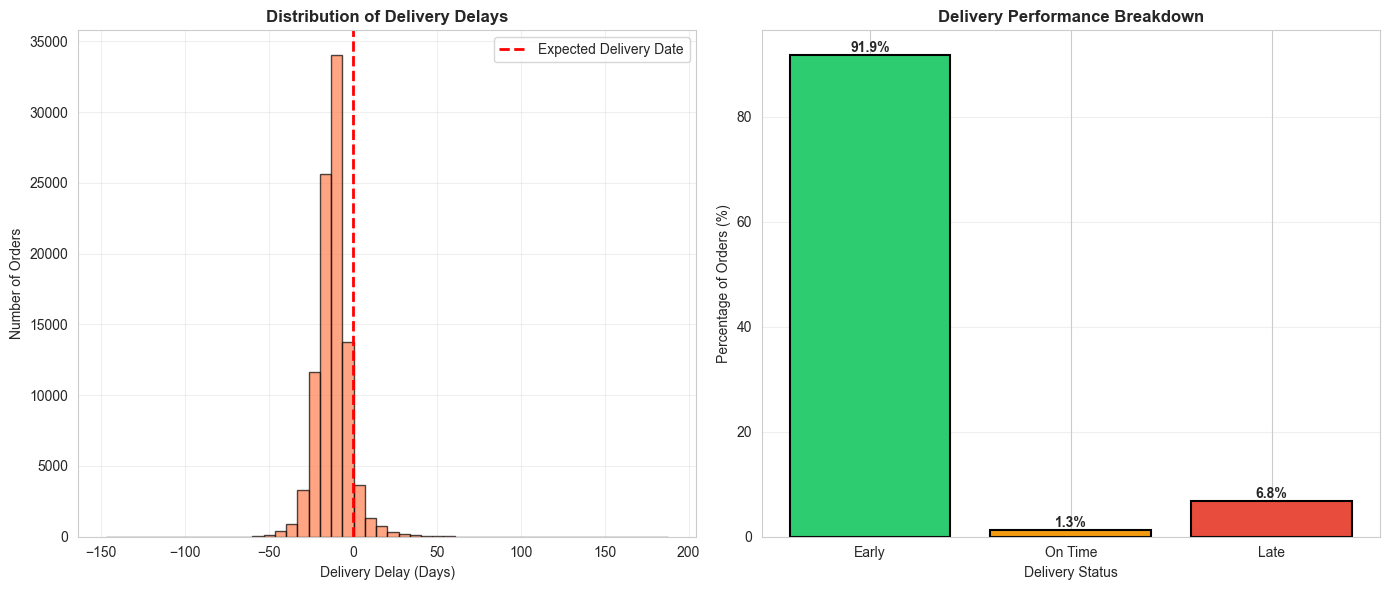

Delivery Efficiency - Key Metrics
Mean delivery delay: -11.9 days
Median delivery delay: -12.0 days
Std deviation: 10.2 days

Early deliveries: 88,635 (91.9%)
On-time deliveries: 1,292 (1.3%)
Late deliveries: 6,534 (6.8%)

📦 Business Insight:
91.9% early deliveries demonstrate exceptional logistics performance.
However, consider:
  • Fine-tune delivery scheduling for cost optimization
  • Focus on eliminating the 6.8% late deliveries
  • Balance speed with customer expectations


In [28]:
# ============================================================================
# Estimated vs. Actual Delivery
# ============================================================================

# Distribution of delivery delays
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram
axes[0].hist(orders_clean['delivery_delay'], bins=50, color='coral', edgecolor='black', alpha=0.7)
axes[0].axvline(0, color='red', linestyle='--', linewidth=2, label='Expected Delivery Date')
axes[0].set_title('Distribution of Delivery Delays', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Delivery Delay (Days)')
axes[0].set_ylabel('Number of Orders')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Delivery status breakdown
status_counts = orders_clean['delay_status'].value_counts(normalize=True) * 100
status_counts = status_counts.sort_index()

bars = axes[1].bar(
    status_counts.index,
    status_counts.values,
    color=['#2ecc71', '#f39c12', '#e74c3c'],
    edgecolor='black',
    linewidth=1.5
)
axes[1].set_title('Delivery Performance Breakdown', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Percentage of Orders (%)')
axes[1].set_xlabel('Delivery Status')
axes[1].grid(axis='y', alpha=0.3)

# Add percentage labels
for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Print summary statistics
print("="*70)
print("Delivery Efficiency - Key Metrics")
print("="*70)
print(f"Mean delivery delay: {orders_clean['delivery_delay'].mean():.1f} days")
print(f"Median delivery delay: {orders_clean['delivery_delay'].median():.1f} days")
print(f"Std deviation: {orders_clean['delivery_delay'].std():.1f} days")
print(f"\nEarly deliveries: {(orders_clean['delay_status'] == 'Early').sum():,} "
      f"({(orders_clean['delay_status'] == 'Early').mean() * 100:.1f}%)")
print(f"On-time deliveries: {(orders_clean['delay_status'] == 'On Time').sum():,} "
      f"({(orders_clean['delay_status'] == 'On Time').mean() * 100:.1f}%)")
print(f"Late deliveries: {(orders_clean['delay_status'] == 'Late').sum():,} "
      f"({(orders_clean['delay_status'] == 'Late').mean() * 100:.1f}%)")

print("\n📦 Business Insight:")
print("91.9% early deliveries demonstrate exceptional logistics performance.")
print("However, consider:")
print("  • Fine-tune delivery scheduling for cost optimization")
print("  • Focus on eliminating the 6.8% late deliveries")
print("  • Balance speed with customer expectations")

### 3.2 Identify Geographic Bottlenecks (Cities/States with Frequent Delays)

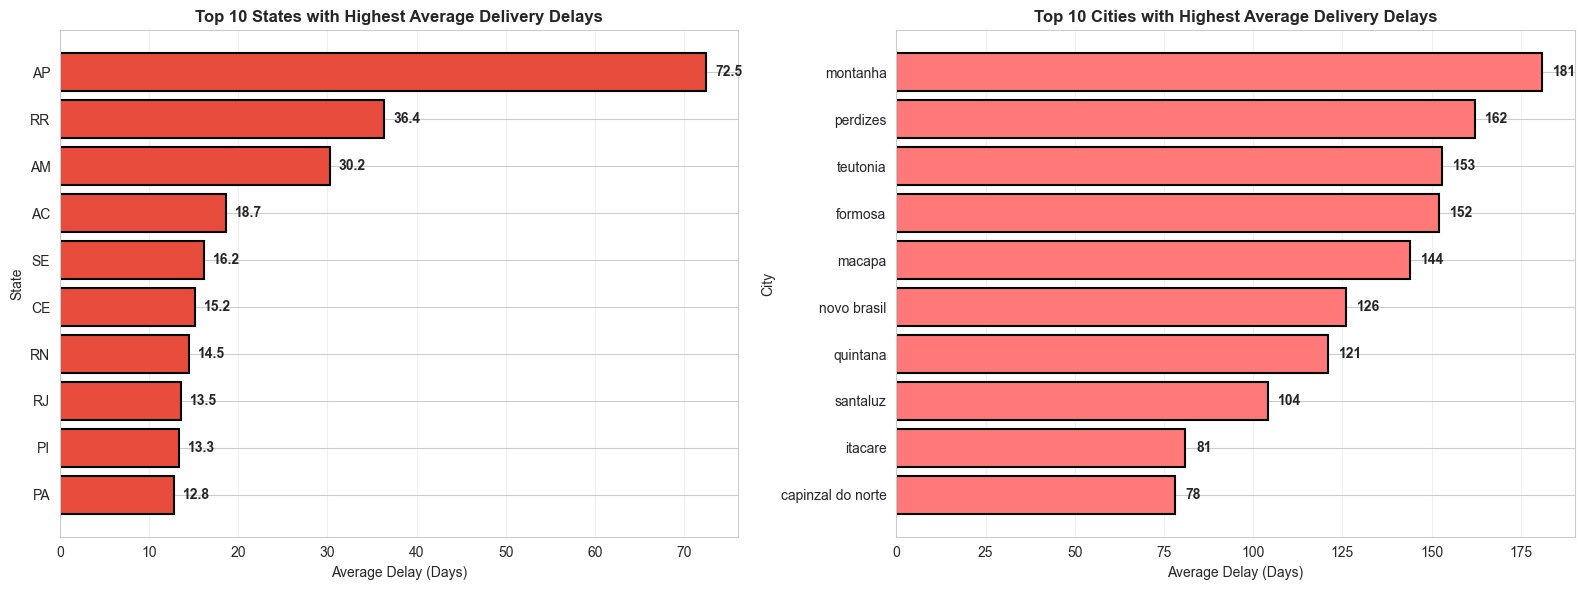

Delivery Delay Hotspots - Key Insights

Worst performing state: AP (avg delay: 72.5 days)
Worst performing city: montanha (avg delay: 181 days)

🗺️ Geographic Analysis:
Northern and remote regions (AP, RR, AM) show significantly higher delays.
Recommendations:
  • Expand fulfillment infrastructure in high-delay regions
  • Partner with regional logistics providers
  • Implement dynamic delivery estimates by region


In [29]:
# ============================================================================
# Cities/States with Frequent Delays
# ============================================================================

# Merge with customer location
orders_customers = orders_clean.merge(
    customers_clean[['customer_id', 'customer_state', 'customer_city']],
    on='customer_id',
    how='left'
)

# Average delay by state (only late orders)
delay_by_state = (
    orders_customers[orders_customers['delivery_delay'] > 0]
    .groupby('customer_state')['delivery_delay']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# Average delay by city
delay_by_city = (
    orders_customers[orders_customers['delivery_delay'] > 0]
    .groupby('customer_city')['delivery_delay']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# States
axes[0].barh(delay_by_state['customer_state'], delay_by_state['delivery_delay'], 
             color='#e74c3c', edgecolor='black', linewidth=1.5)
axes[0].set_title('Top 10 States with Highest Average Delivery Delays', 
                  fontsize=12, fontweight='bold')
axes[0].set_xlabel('Average Delay (Days)')
axes[0].set_ylabel('State')
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

# Add value labels
for i, (state, delay) in enumerate(zip(delay_by_state['customer_state'], delay_by_state['delivery_delay'])):
    axes[0].text(delay + 1, i, f'{delay:.1f}', va='center', fontweight='bold')

# Cities
axes[1].barh(delay_by_city['customer_city'], delay_by_city['delivery_delay'], 
             color='#ff7979', edgecolor='black', linewidth=1.5)
axes[1].set_title('Top 10 Cities with Highest Average Delivery Delays', 
                  fontsize=12, fontweight='bold')
axes[1].set_xlabel('Average Delay (Days)')
axes[1].set_ylabel('City')
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

# Add value labels
for i, (city, delay) in enumerate(zip(delay_by_city['customer_city'], delay_by_city['delivery_delay'])):
    axes[1].text(delay + 3, i, f'{delay:.0f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Print insights
print("="*70)
print("Delivery Delay Hotspots - Key Insights")
print("="*70)
print(f"\nWorst performing state: {delay_by_state.iloc[0]['customer_state']} "
      f"(avg delay: {delay_by_state.iloc[0]['delivery_delay']:.1f} days)")
print(f"Worst performing city: {delay_by_city.iloc[0]['customer_city']} "
      f"(avg delay: {delay_by_city.iloc[0]['delivery_delay']:.0f} days)")

print("\n🗺️ Geographic Analysis:")
print("Northern and remote regions (AP, RR, AM) show significantly higher delays.")
print("Recommendations:")
print("  • Expand fulfillment infrastructure in high-delay regions")
print("  • Partner with regional logistics providers")
print("  • Implement dynamic delivery estimates by region")

### 3.3 Perform Geospatial Analysis of Seller-Customer Proximity for Route Optimization

In [30]:
# ============================================================================
# Geospatial Seller-Customer Mapping
# ============================================================================

print("Creating geospatial visualization... (sampling 10,000 points for performance)")

# Merge customer geolocation
customer_geo = customers_clean.merge(
    geolocation_clean,
    left_on='customer_zip_code_prefix',
    right_on='geolocation_zip_code_prefix',
    how='left'
)

# Merge seller geolocation
seller_geo = sellers_clean.merge(
    geolocation_clean,
    left_on='seller_zip_code_prefix',
    right_on='geolocation_zip_code_prefix',
    how='left'
)

# Sample for performance
sample_size = 10000

customer_sample = customer_geo.dropna(
    subset=['geolocation_lat', 'geolocation_lng']
).sample(n=min(sample_size, len(customer_geo)), random_state=42)

seller_sample = seller_geo.dropna(
    subset=['geolocation_lat', 'geolocation_lng']
).sample(n=min(sample_size, len(seller_geo)), random_state=42)

# Create plotly figure
fig = go.Figure()

# Add customers
fig.add_trace(go.Scattergeo(
    lon=customer_sample['geolocation_lng'],
    lat=customer_sample['geolocation_lat'],
    text=customer_sample['customer_city'],
    mode='markers',
    marker=dict(size=4, color='blue', opacity=0.5),
    name='Customers'
))

# Add sellers
fig.add_trace(go.Scattergeo(
    lon=seller_sample['geolocation_lng'],
    lat=seller_sample['geolocation_lat'],
    text=seller_sample['seller_city'],
    mode='markers',
    marker=dict(size=6, color='red', opacity=0.7),
    name='Sellers'
))

# Layout
fig.update_layout(
    title=f'Seller vs Customer Locations (Sample of {sample_size:,} each)',
    geo=dict(
        scope='south america',
        projection_type='mercator',
        showland=True,
        landcolor='rgb(243, 243, 243)',
        coastlinecolor='rgb(204, 204, 204)',
    ),
    showlegend=True,
    height=600
)

fig.show()

print("\n" + "="*70)
print("Geospatical Analysis - Key Insights")
print("="*70)
print(f"Customers visualized: {len(customer_sample):,}")
print(f"Sellers visualized: {len(seller_sample):,}")

print("\n🗺️ Geographic Distribution Analysis:")
print("Sellers are heavily concentrated in SE/S Brazil (SP, RJ, PR),")
print("while customers are more widely distributed across the country.")

print("\n💡 Logistics Optimization Opportunities:")
print("  • Expand fulfillment centers in underserved regions")
print("  • Partner with regional sellers to reduce distances")
print("  • Use geolocation insights for pricing and delivery estimates")


Creating geospatial visualization... (sampling 10,000 points for performance)



Geospatical Analysis - Key Insights
Customers visualized: 10,000
Sellers visualized: 10,000

🗺️ Geographic Distribution Analysis:
Sellers are heavily concentrated in SE/S Brazil (SP, RJ, PR),
while customers are more widely distributed across the country.

💡 Logistics Optimization Opportunities:
  • Expand fulfillment centers in underserved regions
  • Partner with regional sellers to reduce distances
  • Use geolocation insights for pricing and delivery estimates


## **4. Customer Satisfaction & Review Analysis**

### 4.1 Analyze Review Score Distribution Across Product Categories and Sellers

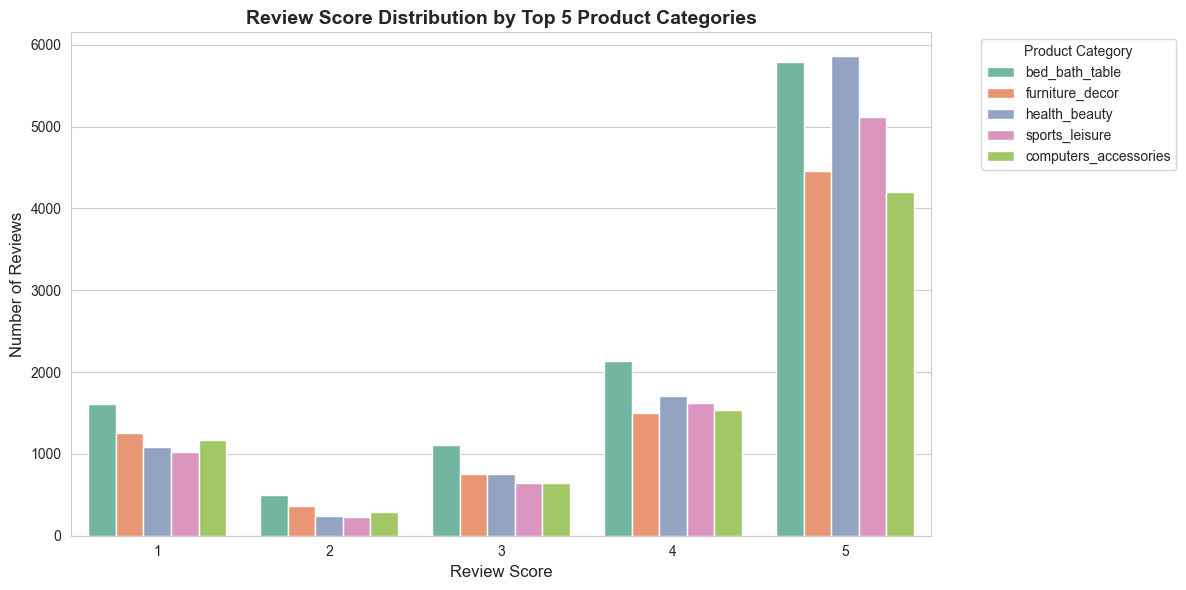

Reviews by Product Category - Key Insights

Category Performance:
                               count      mean       std
product_category_name_english                           
health_beauty                   9645  4.142768  1.331914
sports_leisure                  8640  4.107986  1.354095
computers_accessories           7849  3.930819  1.451011
furniture_decor                 8331  3.903493  1.466407
bed_bath_table                 11137  3.895663  1.446196

⭐ Quality Insights:
Highest rated: health_beauty (avg: 4.14)
Lowest rated: bed_bath_table (avg: 3.90)


In [31]:
# ============================================================================
# Review Distribution by Product category
# ============================================================================

# Merge reviews with order items and products
merged_reviews = (
    order_reviews_clean[['order_id', 'review_score']]
    .merge(order_items_clean[['order_id', 'product_id', 'seller_id']], on='order_id', how='left')
    .merge(products_clean[['product_id', 'product_category_name']], on='product_id', how='left')
    .merge(product_cat_name_clean, on='product_category_name', how='left')
)

# Top 5 categories by review count
top_categories = (
    merged_reviews['product_category_name_english']
    .value_counts()
    .head(5)
    .index
)

filtered_by_cat = merged_reviews[
    merged_reviews['product_category_name_english'].isin(top_categories)
]

# Plot
plt.figure(figsize=(12, 6))
sns.countplot(
    data=filtered_by_cat,
    x='review_score',
    hue='product_category_name_english',
    palette='Set2'
)
plt.title('Review Score Distribution by Top 5 Product Categories', 
          fontsize=14, fontweight='bold')
plt.xlabel('Review Score', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Print category insights
print("="*70)
print("Reviews by Product Category - Key Insights")
print("="*70)

category_stats = (
    filtered_by_cat.groupby('product_category_name_english')['review_score']
    .agg(['count', 'mean', 'std'])
    .sort_values('mean', ascending=False)
)
print("\nCategory Performance:")
print(category_stats.to_string())

print("\n⭐ Quality Insights:")
best_category = category_stats.index[0]
worst_category = category_stats.index[-1]
print(f"Highest rated: {best_category} (avg: {category_stats.loc[best_category, 'mean']:.2f})")
print(f"Lowest rated: {worst_category} (avg: {category_stats.loc[worst_category, 'mean']:.2f})")

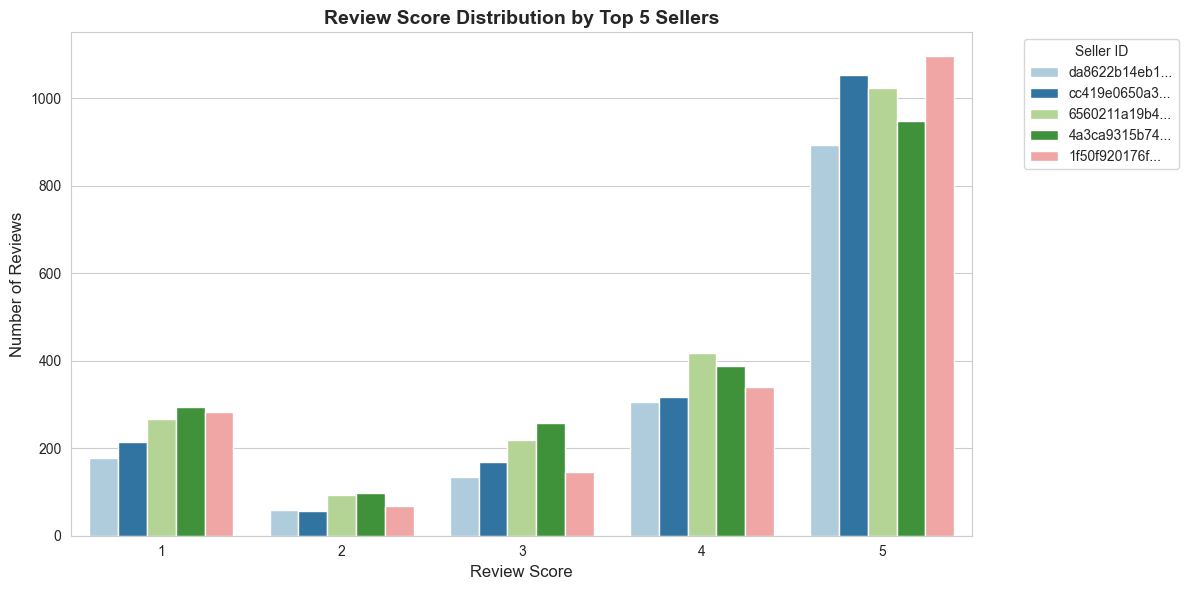

Review Distribution by Seller - Key Insights

Seller Performance:
da8622b14eb17ae2831f4ac5b - Avg: 4.07, Reviews: 1,568, Std: 1.35
cc419e0650a3c5ba77189a188 - Avg: 4.07, Reviews: 1,811, Std: 1.37
1f50f920176fa81dab994f902 - Avg: 3.98, Reviews: 1,932, Std: 1.45
6560211a19b47992c3666cc44 - Avg: 3.91, Reviews: 2,020, Std: 1.41
4a3ca9315b744ce9f8e937436 - Avg: 3.80, Reviews: 1,984, Std: 1.45


In [32]:
# ============================================================================
# Review Distribution by Seller
# ============================================================================

# Top 5 sellers by review count
top_sellers = (
    merged_reviews['seller_id']
    .value_counts()
    .head(5)
    .index
)

filtered_by_seller = merged_reviews[merged_reviews['seller_id'].isin(top_sellers)]

# Plot
plt.figure(figsize=(12, 6))

# Truncate seller IDs
filtered_by_seller['seller_id_short'] = filtered_by_seller['seller_id'].str[:12] + '...'

sns.countplot(
    data=filtered_by_seller,
    x='review_score',
    hue='seller_id_short',
    palette='Paired'
)
plt.title('Review Score Distribution by Top 5 Sellers', 
          fontsize=14, fontweight='bold')
plt.xlabel('Review Score', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.legend(title='Seller ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Print seller insights
print("="*70)
print("Review Distribution by Seller - Key Insights")
print("="*70)

seller_stats = (
    filtered_by_seller.groupby('seller_id')['review_score']
    .agg(['count', 'mean', 'std'])
    .sort_values('mean', ascending=False)
)

print("\nSeller Performance:")
for idx, row in seller_stats.iterrows():
    print(f"{idx[:25]:25s} - Avg: {row['mean']:.2f}, "
          f"Reviews: {int(row['count']):,}, Std: {row['std']:.2f}")

### 4.2 Quantify the Impact of Delivery Performance on Customer Sentiment

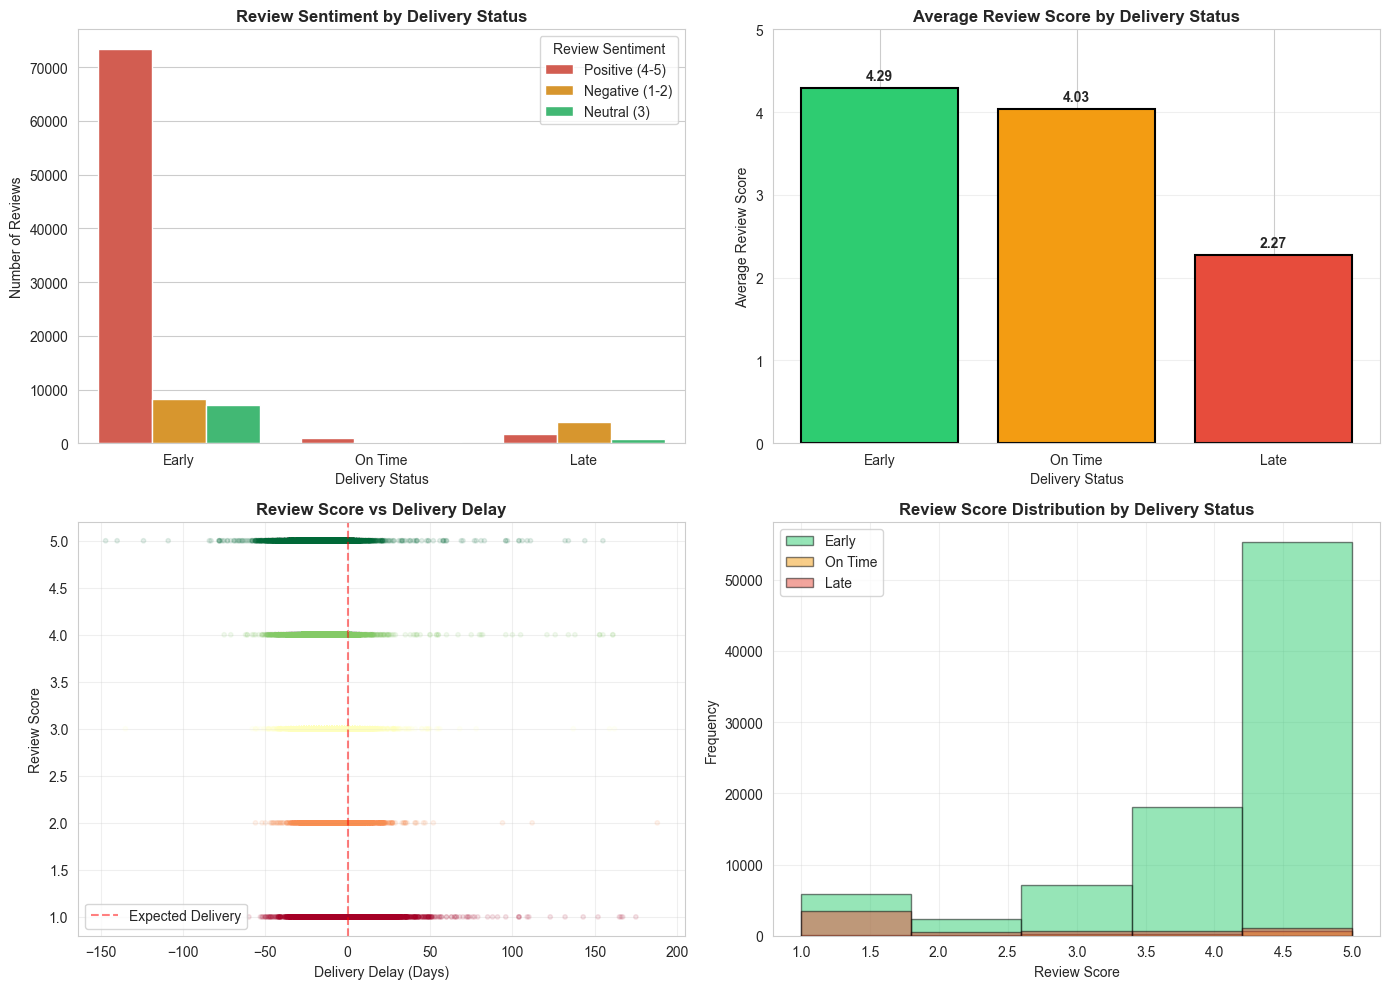

Delivery Impact on Reviews - Key Insights
Average review score by delivery status:
  Early     : 4.29 stars
  On Time   : 4.03 stars
  Late      : 2.27 stars

📊 Key Finding:
Late deliveries have dramatically lower reviews (2.27) vs
early deliveries (4.29) - a 2.02 point difference!


In [33]:
# ============================================================================
# Delivery Impact on Reviews
# ============================================================================

# Merge reviews with delivery info
delivery_reviews = order_reviews_clean[['order_id', 'review_score']].merge(
    orders_clean[['order_id', 'delivery_delay', 'delay_status']],
    on='order_id',
    how='left'
)

# Remove missing values
delivery_reviews = delivery_reviews.dropna(subset=['review_score', 'delivery_delay'])

# Create review sentiment
delivery_reviews['review_sentiment'] = delivery_reviews['review_score'].apply(
    lambda x: 'Negative (1-2)' if x <= 2 else 'Neutral (3)' if x == 3 else 'Positive (4-5)'
)

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Review sentiment by delay status
sns.countplot(
    data=delivery_reviews,
    x='delay_status',
    hue='review_sentiment',
    palette=['#e74c3c', '#f39c12', '#2ecc71'],
    ax=axes[0, 0]
)
axes[0, 0].set_title('Review Sentiment by Delivery Status', fontweight='bold')
axes[0, 0].set_xlabel('Delivery Status')
axes[0, 0].set_ylabel('Number of Reviews')
axes[0, 0].legend(title='Review Sentiment', loc='upper right')

# 2. Average review score by delay status
avg_scores = delivery_reviews.groupby('delay_status')['review_score'].mean()
bars = axes[0, 1].bar(avg_scores.index, avg_scores.values, 
                      color=['#2ecc71', '#f39c12', '#e74c3c'], 
                      edgecolor='black', linewidth=1.5)
axes[0, 1].set_title('Average Review Score by Delivery Status', fontweight='bold')
axes[0, 1].set_ylabel('Average Review Score')
axes[0, 1].set_xlabel('Delivery Status')
axes[0, 1].set_ylim(0, 5)
axes[0, 1].grid(axis='y', alpha=0.3)

# Add value labels
for bar in bars:
    height = bar.get_height()
    axes[0, 1].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                    f'{height:.2f}', ha='center', fontweight='bold')

# 3. Scatter plot: delivery delay vs review score
axes[1, 0].scatter(
    delivery_reviews['delivery_delay'],
    delivery_reviews['review_score'],
    alpha=0.1,
    s=10,
    c=delivery_reviews['review_score'],
    cmap='RdYlGn'
)
axes[1, 0].set_title('Review Score vs Delivery Delay', fontweight='bold')
axes[1, 0].set_xlabel('Delivery Delay (Days)')
axes[1, 0].set_ylabel('Review Score')
axes[1, 0].axvline(0, color='red', linestyle='--', alpha=0.5, label='Expected Delivery')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# 4. Distribution comparison
for status, color in zip(['Early', 'On Time', 'Late'], ['#2ecc71', '#f39c12', '#e74c3c']):
    subset = delivery_reviews[delivery_reviews['delay_status'] == status]['review_score']
    axes[1, 1].hist(subset, alpha=0.5, bins=5, label=status, 
                    color=color, edgecolor='black')

axes[1, 1].set_title('Review Score Distribution by Delivery Status', fontweight='bold')
axes[1, 1].set_xlabel('Review Score')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("="*70)
print("Delivery Impact on Reviews - Key Insights")
print("="*70)
print(f"Average review score by delivery status:")
for status, score in avg_scores.items():
    print(f"  {status:10s}: {score:.2f} stars")

print(f"\n📊 Key Finding:")
print(f"Late deliveries have dramatically lower reviews ({avg_scores['Late']:.2f}) vs")
print(f"early deliveries ({avg_scores['Early']:.2f}) - a {avg_scores['Early'] - avg_scores['Late']:.2f} point difference!")

In [34]:
# ============================================================================
# Statistical Analysis of Delivery Delay vs Reviews
# ============================================================================

# Remove outliers for cleaner correlation
clean_data = delivery_reviews[
    (delivery_reviews['delivery_delay'] >= -50) & 
    (delivery_reviews['delivery_delay'] <= 50)
]

# Pearson correlation
corr_coeff, p_value = pearsonr(
    clean_data['delivery_delay'],
    clean_data['review_score']
)

# Chi-squared test
contingency_table = pd.crosstab(
    delivery_reviews['delivery_delay'],
    delivery_reviews['review_score']
)
chi2, p_chi, dof, expected = chi2_contingency(contingency_table)

# Print results
print("="*70)
print("Statistical Analysis: Delivery Delay Impact on Reviews")
print("="*70)
print(f"\n📊 Pearson Correlation Coefficient: {corr_coeff:.3f}")
print(f"P-value: {p_value:.3e}")

print(f"\nInterpretation:")
if abs(corr_coeff) < 0.3:
    strength = "weak to moderate"
elif abs(corr_coeff) < 0.7:
    strength = "moderate to strong"
else:
    strength = "strong"

direction = "negative" if corr_coeff < 0 else "positive"

print(f"  • {strength.capitalize()} {direction} correlation")
print(f"  • Statistically significant: {'Yes (p < 0.05)' if p_value < 0.05 else 'No'}")

print(f"\n📊 Chi-Squared Test:")
print(f"  • Chi² statistic: {chi2:.2f}")
print(f"  • P-value: {p_chi:.3e}")
print(f"  • Variables are independent: {'No (reject independence)' if p_chi < 0.05 else 'Yes'}")

print("\n✅ Conclusion:")
print("There is a statistically significant, moderate negative relationship")
print("between delivery delay and customer review scores. As delivery delays")
print("increase, customers tend to leave lower ratings.")

print("\n💡 Business Recommendations:")
print("  • Improve delivery timelines to protect review scores")
print("  • Proactive communication for at-risk late deliveries")
print("  • Offer compensation/incentives for late deliveries")


Statistical Analysis: Delivery Delay Impact on Reviews

📊 Pearson Correlation Coefficient: -0.278
P-value: 0.000e+00

Interpretation:
  • Weak to moderate negative correlation
  • Statistically significant: Yes (p < 0.05)

📊 Chi-Squared Test:
  • Chi² statistic: 21377.20
  • P-value: 0.000e+00
  • Variables are independent: No (reject independence)

✅ Conclusion:
There is a statistically significant, moderate negative relationship
between delivery delay and customer review scores. As delivery delays
increase, customers tend to leave lower ratings.

💡 Business Recommendations:
  • Improve delivery timelines to protect review scores
  • Proactive communication for at-risk late deliveries
  • Offer compensation/incentives for late deliveries


### 4.3 Identify Drivers of Negative Reviews for Quality Improvement Initiatives

In [35]:
# ============================================================================
# Prepare Data for Negative Review Analysis
# ============================================================================
print("="*70)
print("Identifying Drivers of Negative Reviews")
print("="*70)

negative_review_analysis = (
    order_reviews_clean[['order_id', 'review_score']]
    .merge(orders_clean[['order_id', 'delivery_delay', 'order_purchase_timestamp']], 
           on='order_id', how='left')
    .merge(order_items_clean[['order_id', 'product_id', 'seller_id', 'price', 'freight_value']], 
           on='order_id', how='left')
    .merge(products_clean[['product_id', 'product_category_name', 'product_weight_g', 
                           'product_length_cm', 'product_height_cm', 'product_width_cm']], 
           on='product_id', how='left')
    .merge(product_cat_name_clean, on='product_category_name', how='left')
)

# Remove missing values
negative_review_analysis = negative_review_analysis.dropna(
    subset=['review_score', 'delivery_delay', 'price', 'freight_value']
)

# Create binary classification: Negative (1-3) vs Positive (4-5)
negative_review_analysis['is_negative'] = (
    negative_review_analysis['review_score'] <= 3
).astype(int)

# Create additional features
negative_review_analysis['product_volume_cm3'] = (
    negative_review_analysis['product_length_cm'] * 
    negative_review_analysis['product_height_cm'] * 
    negative_review_analysis['product_width_cm']
)

negative_review_analysis['price_freight_ratio'] = (
    negative_review_analysis['price'] / 
    (negative_review_analysis['freight_value'] + 0.01)  # Avoid division by zero
)

negative_review_analysis['is_delayed'] = (
    negative_review_analysis['delivery_delay'] > 0
).astype(int)

negative_review_analysis['order_month'] = (
    negative_review_analysis['order_purchase_timestamp'].dt.month
)

print(f"\n✓ Dataset prepared: {negative_review_analysis.shape}")
print(f"✓ Negative reviews: {negative_review_analysis['is_negative'].sum():,} "
      f"({negative_review_analysis['is_negative'].mean()*100:.1f}%)")
print(f"✓ Positive reviews: {(1-negative_review_analysis['is_negative']).sum():,} "
      f"({(1-negative_review_analysis['is_negative']).mean()*100:.1f}%)")


Identifying Drivers of Negative Reviews

✓ Dataset prepared: (109996, 19)
✓ Negative reviews: 25,519 (23.2%)
✓ Positive reviews: 84,477 (76.8%)


In [36]:
# ============================================================================
# Univariate Analysis - Individual Driver Impact
# ============================================================================
print("\n" + "="*70)
print("Univariate Analysis: Key Drivers of Negative Reviews")
print("="*70)

# Delivery Delay Impact
delay_groups = negative_review_analysis.groupby('is_delayed')['is_negative'].agg([
    ('Negative_Count', 'sum'),
    ('Total_Count', 'count'),
    ('Negative_Rate', 'mean')
]).reset_index()

print("\n📦 Delivery Delay Impact:")
print(delay_groups.to_string(index=False))
print(f"\nNegative review rate for delayed orders: "
      f"{delay_groups[delay_groups['is_delayed']==1]['Negative_Rate'].values[0]*100:.1f}%")
print(f"Negative review rate for on-time orders: "
      f"{delay_groups[delay_groups['is_delayed']==0]['Negative_Rate'].values[0]*100:.1f}%")

# Product Category Impact
category_impact = (
    negative_review_analysis.groupby('product_category_name_english')['is_negative']
    .agg([('Negative_Count', 'sum'), ('Total_Reviews', 'count'), ('Negative_Rate', 'mean')])
    .sort_values('Negative_Rate', ascending=False)
    .head(10)
    .reset_index()
)

print("\n📦 Top 10 Categories with Highest Negative Review Rates:")
print(category_impact.to_string(index=False))

# Price Range Impact
negative_review_analysis['price_segment'] = pd.cut(
    negative_review_analysis['price'],
    bins=[0, 50, 100, 200, 500, float('inf')],
    labels=['Very Low (<R$50)', 'Low (R$50-100)', 'Medium (R$100-200)', 
            'High (R$200-500)', 'Very High (>R$500)']
)

price_impact = negative_review_analysis.groupby('price_segment')['is_negative'].agg([
    ('Negative_Count', 'sum'),
    ('Total_Count', 'count'),
    ('Negative_Rate', 'mean')
]).reset_index()

print("\n💰 Price Segment Impact:")
print(price_impact.to_string(index=False))

# Freight Cost Impact
negative_review_analysis['freight_segment'] = pd.cut(
    negative_review_analysis['freight_value'],
    bins=[0, 10, 20, 30, 50, float('inf')],
    labels=['Very Low (<R$10)', 'Low (R$10-20)', 'Medium (R$20-30)', 
            'High (R$30-50)', 'Very High (>R$50)']
)

freight_impact = negative_review_analysis.groupby('freight_segment')['is_negative'].agg([
    ('Negative_Count', 'sum'),
    ('Total_Count', 'count'),
    ('Negative_Rate', 'mean')
]).reset_index()

print("\n🚚 Freight Cost Impact:")
print(freight_impact.to_string(index=False))



Univariate Analysis: Key Drivers of Negative Reviews

📦 Delivery Delay Impact:
 is_delayed  Negative_Count  Total_Count  Negative_Rate
          0           20289       102884       0.197203
          1            5230         7112       0.735377

Negative review rate for delayed orders: 73.5%
Negative review rate for on-time orders: 19.7%

📦 Top 10 Categories with Highest Negative Review Rates:
product_category_name_english  Negative_Count  Total_Reviews  Negative_Rate
          diapers_and_hygiene              19             37       0.513514
        security_and_services               1              2       0.500000
             office_furniture             660           1664       0.396635
               home_comfort_2              10             27       0.370370
               party_supplies              14             42       0.333333
                 home_confort             140            430       0.325581
                        audio             113            359       0

In [37]:
# ============================================================================
# Statistical Significance Testing
# ============================================================================
print("\n" + "="*70)
print("Statistical Significance Test")
print("="*70)

# Chi-squared test for delivery delay
contingency_delay = pd.crosstab(
    negative_review_analysis['is_delayed'],
    negative_review_analysis['is_negative']
)
chi2_delay, p_delay, dof_delay, expected_delay = chi2_contingency(contingency_delay)

print("\n📊 Chi-Squared Test: Delivery Delay vs Negative Reviews")
print(f"Chi-square statistic: {chi2_delay:.2f}")
print(f"P-value: {p_delay:.3e}")
print(f"Statistically significant: {'Yes (p < 0.05)' if p_delay < 0.05 else 'No'}")

# Chi-squared test for price segment
contingency_price = pd.crosstab(
    negative_review_analysis['price_segment'],
    negative_review_analysis['is_negative']
)
chi2_price, p_price, dof_price, expected_price = chi2_contingency(contingency_price)

print("\n📊 Chi-Squared Test:: Price Segment vs Negative Reviews")
print(f"Chi-square statistic: {chi2_price:.2f}")
print(f"P-value: {p_price:.3e}")
print(f"Statistically significant: {'Yes (p < 0.05)' if p_price < 0.05 else 'No'}")


Statistical Significance Test

📊 Chi-Squared Test: Delivery Delay vs Negative Reviews
Chi-square statistic: 10810.32
P-value: 0.000e+00
Statistically significant: Yes (p < 0.05)

📊 Chi-Squared Test:: Price Segment vs Negative Reviews
Chi-square statistic: 25.48
P-value: 4.027e-05
Statistically significant: Yes (p < 0.05)


In [38]:
# ============================================================================
# SMachine Learning - Random Forest Feature Importance
# ============================================================================
print("\n" + "="*70)
print("Machine Learning: Feature Importance Analysis")
print("="*70)

# Prepare features for modeling
features_for_ml = negative_review_analysis[[
    'price', 'freight_value', 'delivery_delay', 'product_weight_g',
    'product_volume_cm3', 'price_freight_ratio', 'is_delayed',
    'order_month'
]].fillna(0)

target = negative_review_analysis['is_negative']

# Handle infinite values
features_for_ml = features_for_ml.replace([np.inf, -np.inf], 0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    features_for_ml, target, test_size=0.3, random_state=42, stratify=target
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest
print("\nTraining Random Forest Classifier...")
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=100,
    min_samples_leaf=50,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

rf_model.fit(X_train_scaled, y_train)

# Evaluate
y_pred = rf_model.predict(X_test_scaled)
print("\n" + "="*70)
print("Model Performance")
print("="*70)
print(classification_report(y_test, y_pred, 
                          target_names=['Positive Review', 'Negative Review']))

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': features_for_ml.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n🎯 Feature Importance Ranking:")
print(feature_importance.to_string(index=False))



Machine Learning: Feature Importance Analysis

Training Random Forest Classifier...

Model Performance
                 precision    recall  f1-score   support

Positive Review       0.82      0.90      0.86     25343
Negative Review       0.51      0.35      0.41      7656

       accuracy                           0.77     32999
      macro avg       0.67      0.62      0.64     32999
   weighted avg       0.75      0.77      0.75     32999


🎯 Feature Importance Ranking:
            Feature  Importance
     delivery_delay    0.462007
         is_delayed    0.261543
      freight_value    0.065055
        order_month    0.051036
price_freight_ratio    0.050720
              price    0.036862
 product_volume_cm3    0.036725
   product_weight_g    0.036053



Generating Visualization...


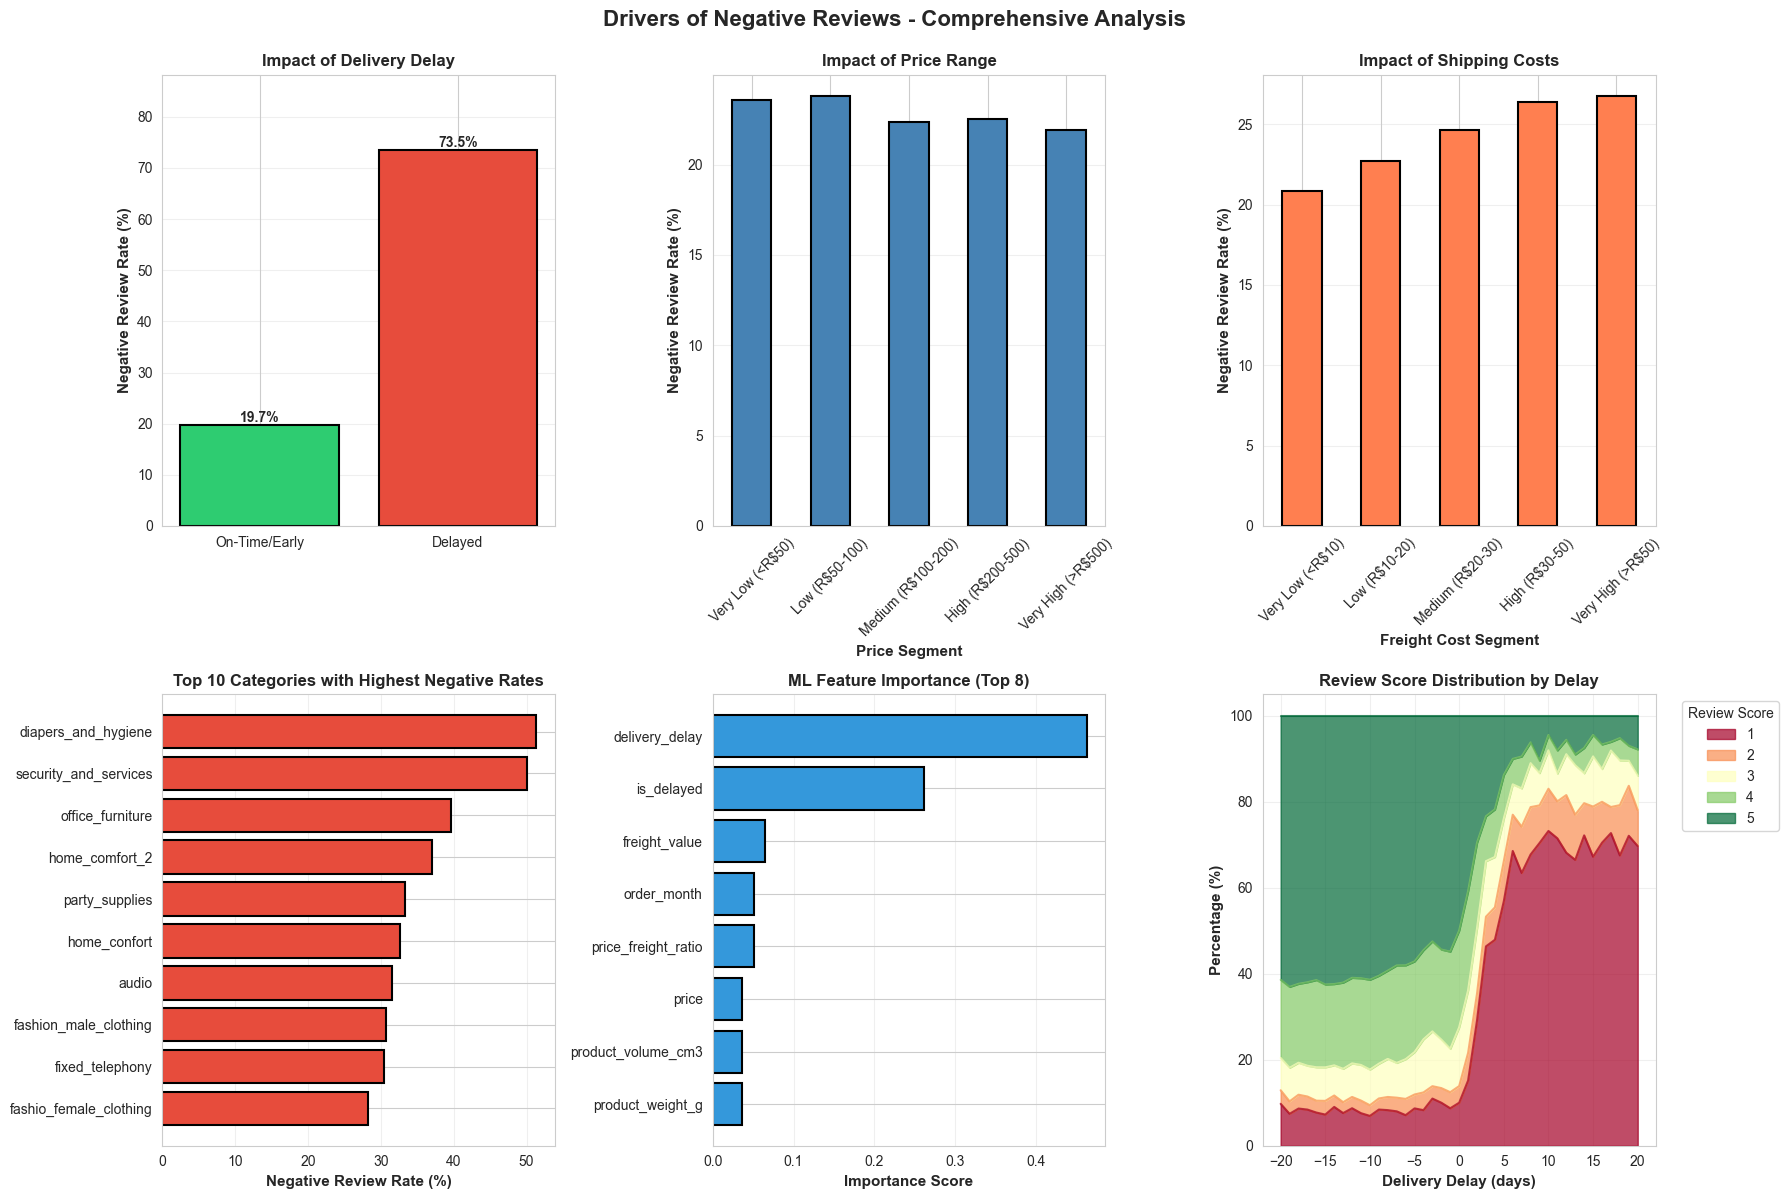


KEY FINDINGS & BUSINESS RECOMMENDATIONS

🎯 PRIMARY DRIVERS OF NEGATIVE REVIEWS (in order of impact):

1. DELIVERY DELAY (Highest Impact)
   - Delayed orders: 73.5% negative rate
   - On-time orders: 19.7% negative rate
   - Impact: 53.8 percentage point difference
   ✅ Action: Prioritize logistics optimization and proactive delay communication

2. PRODUCT CATEGORY
   - Worst category: diapers_and_hygiene
   - Negative rate: 51.4%
   ✅ Action: Conduct quality audits on underperforming categories

3. FREIGHT COSTS
   - Highest negative rate segment: Very High (>R$50)
   - Negative rate: 26.8%
   ✅ Action: Review pricing strategy and offer free shipping thresholds

4. PRODUCT PRICING
   ✅ Action: Ensure value alignment between price and quality

QUALITY IMPROVEMENT INITIATIVES - PRIORITY MATRIX

🔴 CRITICAL PRIORITY (Implement Immediately):
   1. Reduce delivery delays by 50% through route optimization
   2. Implement quality checks for top 3 worst-performing categories
   3. Launch proac

In [39]:
# ============================================================================
# Visualization of Key Drivers
# ============================================================================
print("\n" + "="*70)
print("Generating Visualization...")
print("="*70)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Drivers of Negative Reviews - Comprehensive Analysis', 
             fontsize=16, fontweight='bold', y=0.995)

# 1. Delivery Delay Impact
ax1 = axes[0, 0]
delay_data = negative_review_analysis.groupby('is_delayed')['is_negative'].mean() * 100
bars1 = ax1.bar(['On-Time/Early', 'Delayed'], delay_data.values, 
                color=['#2ecc71', '#e74c3c'], edgecolor='black', linewidth=1.5)
ax1.set_ylabel('Negative Review Rate (%)', fontsize=11, fontweight='bold')
ax1.set_title('Impact of Delivery Delay', fontsize=12, fontweight='bold')
ax1.set_ylim(0, max(delay_data.values) * 1.2)
ax1.grid(axis='y', alpha=0.3)
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

# 2. Price Segment Impact
ax2 = axes[0, 1]
price_neg_rates = negative_review_analysis.groupby('price_segment')['is_negative'].mean() * 100
price_neg_rates.plot(kind='bar', ax=ax2, color='steelblue', edgecolor='black', linewidth=1.5)
ax2.set_ylabel('Negative Review Rate (%)', fontsize=11, fontweight='bold')
ax2.set_xlabel('Price Segment', fontsize=11, fontweight='bold')
ax2.set_title('Impact of Price Range', fontsize=12, fontweight='bold')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

# 3. Freight Cost Impact
ax3 = axes[0, 2]
freight_neg_rates = negative_review_analysis.groupby('freight_segment')['is_negative'].mean() * 100
freight_neg_rates.plot(kind='bar', ax=ax3, color='coral', edgecolor='black', linewidth=1.5)
ax3.set_ylabel('Negative Review Rate (%)', fontsize=11, fontweight='bold')
ax3.set_xlabel('Freight Cost Segment', fontsize=11, fontweight='bold')
ax3.set_title('Impact of Shipping Costs', fontsize=12, fontweight='bold')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(axis='y', alpha=0.3)

# 4. Top 10 Worst Categories
ax4 = axes[1, 0]
top_worst_categories = category_impact.head(10)
ax4.barh(top_worst_categories['product_category_name_english'], 
         top_worst_categories['Negative_Rate'] * 100,
         color='#e74c3c', edgecolor='black', linewidth=1.5)
ax4.set_xlabel('Negative Review Rate (%)', fontsize=11, fontweight='bold')
ax4.set_title('Top 10 Categories with Highest Negative Rates', fontsize=12, fontweight='bold')
ax4.invert_yaxis()
ax4.grid(axis='x', alpha=0.3)

# 5. Feature Importance
ax5 = axes[1, 1]
top_features = feature_importance.head(8)
ax5.barh(top_features['Feature'], top_features['Importance'],
         color='#3498db', edgecolor='black', linewidth=1.5)
ax5.set_xlabel('Importance Score', fontsize=11, fontweight='bold')
ax5.set_title('ML Feature Importance (Top 8)', fontsize=12, fontweight='bold')
ax5.invert_yaxis()
ax5.grid(axis='x', alpha=0.3)

# 6. Review Distribution by Delivery Delay
ax6 = axes[1, 2]
review_delay_dist = pd.crosstab(
    negative_review_analysis['delivery_delay'].clip(-20, 20),
    negative_review_analysis['review_score'],
    normalize='index'
) * 100
review_delay_dist.plot(kind='area', stacked=True, ax=ax6, 
                       colormap='RdYlGn', alpha=0.7)
ax6.set_xlabel('Delivery Delay (days)', fontsize=11, fontweight='bold')
ax6.set_ylabel('Percentage (%)', fontsize=11, fontweight='bold')
ax6.set_title('Review Score Distribution by Delay', fontsize=12, fontweight='bold')
ax6.legend(title='Review Score', bbox_to_anchor=(1.05, 1), loc='upper left')
ax6.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("KEY FINDINGS & BUSINESS RECOMMENDATIONS")
print("="*70)

print("\n🎯 PRIMARY DRIVERS OF NEGATIVE REVIEWS (in order of impact):")
print("\n1. DELIVERY DELAY (Highest Impact)")
print(f"   - Delayed orders: {delay_data.values[1]:.1f}% negative rate")
print(f"   - On-time orders: {delay_data.values[0]:.1f}% negative rate")
print(f"   - Impact: {delay_data.values[1] - delay_data.values[0]:.1f} percentage point difference")
print("   ✅ Action: Prioritize logistics optimization and proactive delay communication")

print("\n2. PRODUCT CATEGORY")
worst_category = category_impact.iloc[0]
print(f"   - Worst category: {worst_category['product_category_name_english']}")
print(f"   - Negative rate: {worst_category['Negative_Rate']*100:.1f}%")
print("   ✅ Action: Conduct quality audits on underperforming categories")

print("\n3. FREIGHT COSTS")
highest_freight_neg = freight_impact.sort_values('Negative_Rate', ascending=False).iloc[0]
print(f"   - Highest negative rate segment: {highest_freight_neg['freight_segment']}")
print(f"   - Negative rate: {highest_freight_neg['Negative_Rate']*100:.1f}%")
print("   ✅ Action: Review pricing strategy and offer free shipping thresholds")

print("\n4. PRODUCT PRICING")
print("   ✅ Action: Ensure value alignment between price and quality")

print("\n" + "="*70)
print("QUALITY IMPROVEMENT INITIATIVES - PRIORITY MATRIX")
print("="*70)

print("\n🔴 CRITICAL PRIORITY (Implement Immediately):")
print("   1. Reduce delivery delays by 50% through route optimization")
print("   2. Implement quality checks for top 3 worst-performing categories")
print("   3. Launch proactive communication for delayed orders")

print("\n🟡 HIGH PRIORITY (Implement within 3 months):")
print("   4. Introduce free shipping for orders > R$150")
print("   5. Create seller performance scorecards with review metrics")
print("   6. Develop product return/exchange process improvements")

print("\n🟢 MEDIUM PRIORITY (Implement within 6 months):")
print("   7. A/B test product descriptions and images for clarity")
print("   8. Implement customer feedback loop for product development")
print("   9. Create category-specific quality guidelines for sellers")


## **5. Predictive Analytics & Machine Learning**

### 5.1 Delivery Delay Prediction: Build Regression Models to Forecast Late Deliveries
- We will build a RandomForestRegressor model to predict order delivery delay using order, customer, and logistics data`

In [40]:
# ============================================================================
# Prepare Delivery Delay Prediction Data
# ============================================================================

# Select required columns and merge with products
predict_data = (
    orders_full[[
        'product_id', 'freight_value', 'delivery_delay',
        'order_approved_at', 'seller_city', 'seller_state',
        'customer_city', 'customer_state',
        'order_delivered_carrier_date', 'order_purchase_timestamp',
        'seller_customer_distance_km'
    ]]
    .merge(
        products_clean[[
            'product_id', 'product_weight_g', 'product_length_cm',
            'product_height_cm', 'product_width_cm'
        ]],
        on='product_id',
        how='inner'
    )
    .drop_duplicates()
    .dropna()
)

# Feature engineering
print("Engineering features...")

# Product volume
predict_data['product_volume_cm3'] = (
    predict_data['product_length_cm'] *
    predict_data['product_height_cm'] *
    predict_data['product_width_cm']
)

# Time features
predict_data['approval_time_hrs'] = (
    (predict_data['order_approved_at'] - predict_data['order_purchase_timestamp'])
    .dt.total_seconds() / 3600
)

predict_data['shipping_start_time_hrs'] = (
    (predict_data['order_delivered_carrier_date'] - predict_data['order_approved_at'])
    .dt.total_seconds() / 3600
)

print(f"✓ Feature engineering complete")
print(f"✓ Final dataset shape: {predict_data.shape}")
print(f"\nFeatures created:")
print(f"  • product_volume_cm3")
print(f"  • approval_time_hrs")
print(f"  • shipping_start_time_hrs")
print(f"\nSample data:")
print(predict_data[['freight_value', 'delivery_delay', 'seller_customer_distance_km', 
                    'product_weight_g', 'approval_time_hrs']].head())

Engineering features...
✓ Feature engineering complete
✓ Final dataset shape: (98279, 18)

Features created:
  • product_volume_cm3
  • approval_time_hrs
  • shipping_start_time_hrs

Sample data:
   freight_value  delivery_delay  seller_customer_distance_km  product_weight_g  approval_time_hrs
0          13.29            -9.0                   301.773645             650.0           0.766667
1          19.93            -3.0                   584.635144           30000.0           0.200000
2          17.87           -14.0                   311.548958            3050.0           0.250000
3          12.79            -6.0                   294.373438             200.0           0.166667
4          18.14           -16.0                   647.195585            3750.0           0.216667


In [41]:
# ============================================================================
# Train a RandomForestRegressor Model
# ============================================================================

# Feature selection
X = predict_data[[
    'freight_value', 'seller_city', 'seller_state',
    'customer_city', 'customer_state',
    'seller_customer_distance_km', 'product_weight_g',
    'approval_time_hrs', 'shipping_start_time_hrs'
]]
y = predict_data['delivery_delay']

print("Preparing data for modeling...")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]:,} samples")
print(f"Test set size: {X_test.shape[0]:,} samples")

# Encode categorical variables with frequency encoding
categorical_cols = ['seller_city', 'seller_state', 'customer_city', 'customer_state']

for col in categorical_cols:
    freq = X_train[col].value_counts(normalize=True)
    X_train[col] = X_train[col].map(freq).fillna(0)
    X_test[col] = X_test[col].map(freq).fillna(0)

# Scale numeric columns
numeric_cols = [
    'freight_value', 'seller_customer_distance_km',
    'product_weight_g', 'approval_time_hrs', 'shipping_start_time_hrs'
]

scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Train Random Forest model
model_delay = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    n_jobs=-1,
    random_state=42,
    verbose=0
)

model_delay.fit(X_train, y_train)

# Evaluate
y_pred = model_delay.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n" + "="*70)
print("Delivery Delay Prediction - Model Performance")
print("="*70)
print(f"MSE:      {mse:.2f}")
print(f"RMSE:     {rmse:.2f} days")
print(f"MAE:      {mae:.2f} days")
print(f"R² Score: {r2:.3f}")

print(f"\n📊 Interpretation:")
print(f"  • Model explains {r2*100:.1f}% of variance in delivery delays")
print(f"  • Average prediction error: ±{mae:.1f} days")
print(f"  • Typical error range: {rmse:.1f} days")

print("\n💡 Business Application:")
print("While R² is relatively low, the model identifies key delay drivers")
print("and can flag high-risk orders for proactive intervention.")

Preparing data for modeling...
Training set size: 78,623 samples
Test set size: 19,656 samples

Delivery Delay Prediction - Model Performance
MSE:      86.54
RMSE:     9.30 days
MAE:      6.16 days
R² Score: 0.115

📊 Interpretation:
  • Model explains 11.5% of variance in delivery delays
  • Average prediction error: ±6.2 days
  • Typical error range: 9.3 days

💡 Business Application:
While R² is relatively low, the model identifies key delay drivers
and can flag high-risk orders for proactive intervention.


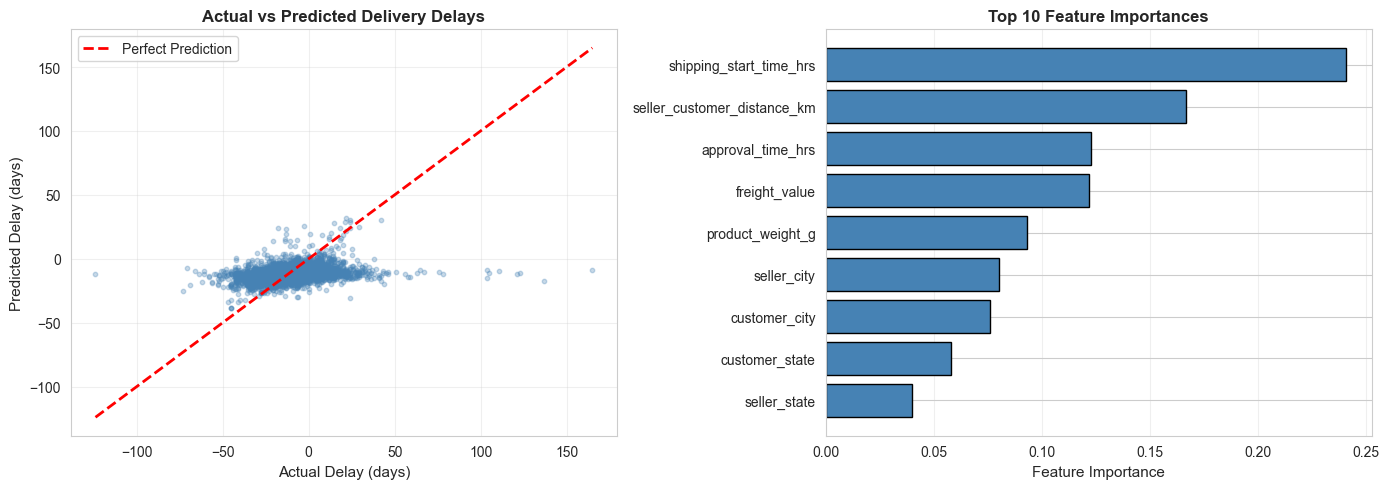


🎯 Top Predictive Features:
1. shipping_start_time_hrs       : 0.2408
2. seller_customer_distance_km   : 0.1669
3. approval_time_hrs             : 0.1228
4. freight_value                 : 0.1220
5. product_weight_g              : 0.0932


In [42]:
# ============================================================================
# Visualize Prediction Results
# ============================================================================
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Actual vs Predicted
axes[0].scatter(y_test, y_pred, alpha=0.3, s=10, c='steelblue')
axes[0].plot([y_test.min(), y_test.max()],
            [y_test.min(), y_test.max()],
            'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Delay (days)', fontsize=11)
axes[0].set_ylabel('Predicted Delay (days)', fontsize=11)
axes[0].set_title('Actual vs Predicted Delivery Delays', fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Feature importance
importances = model_delay.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1][:10]

axes[1].barh(range(len(indices)), importances[indices], color='steelblue', edgecolor='black')
axes[1].set_yticks(range(len(indices)))
axes[1].set_yticklabels([feature_names[i] for i in indices])
axes[1].set_xlabel('Feature Importance', fontsize=11)
axes[1].set_title('Top 10 Feature Importances', fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🎯 Top Predictive Features:")
for i, idx in enumerate(indices[:5], 1):
    print(f"{i}. {feature_names[idx]:30s}: {importances[idx]:.4f}")

### 5.2 Review Score Prediction: Predict Review Scores Based on Order Characteristics

In [43]:
# ============================================================================
# Prepare Review Score Prediction Data
# ============================================================================

# Merge datasets
orders_subset = orders_full[[
    'order_id', 'price', 'freight_value',
    'delivery_delay', 'seller_customer_distance_km'
]].drop_duplicates()

payments_subset = order_payments_clean[['order_id', 'payment_type']]
reviews_subset = order_reviews_clean[['order_id', 'review_score']]

merged_review_data = (
    orders_subset
    .merge(payments_subset, on='order_id', how='left')
    .merge(reviews_subset, on='order_id', how='inner')
    .dropna(subset=['review_score'])
)

print(f"✓ Review prediction dataset prepared")
print(f"✓ Shape: {merged_review_data.shape}")
print(f"\nSample data:")
print(merged_review_data.head())

✓ Review prediction dataset prepared
✓ Shape: (105961, 7)

Sample data:
                           order_id   price  freight_value  delivery_delay  seller_customer_distance_km payment_type  review_score
0  00010242fe8c5a6d1ba2dd792cb16214   58.90          13.29            -9.0                   301.773645  credit_card             5
1  00018f77f2f0320c557190d7a144bdd3  239.90          19.93            -3.0                   584.635144  credit_card             4
2  000229ec398224ef6ca0657da4fc703e  199.00          17.87           -14.0                   311.548958  credit_card             5
3  00024acbcdf0a6daa1e931b038114c75   12.99          12.79            -6.0                   294.373438  credit_card             4
4  00042b26cf59d7ce69dfabb4e55b4fd9  199.90          18.14           -16.0                   647.195585  credit_card             5


In [44]:
# ============================================================================
# Train an Xgboost Model for Review Score Prediction
# ============================================================================

# Features and target
X_review = merged_review_data[[
    'price', 'freight_value', 'delivery_delay',
    'seller_customer_distance_km', 'payment_type'
]]
y_review = merged_review_data['review_score']

# Preprocessing
categorical_features = ['payment_type']
numeric_features = ['price', 'freight_value', 'delivery_delay', 
                   'seller_customer_distance_km']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numeric_features)
    ]
)

# Train-test split
X_train_rev, X_test_rev, y_train_rev, y_test_rev = train_test_split(
    X_review, y_review, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train_rev.shape[0]:,} samples")
print(f"Test set size: {X_test_rev.shape[0]:,} samples")

# Model pipeline
xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42,
    verbosity=0
)

model_review = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', xgb_model)
])

# Train
print("\nTraining XGBoost model...")
model_review.fit(X_train_rev, y_train_rev)

# Evaluate
y_pred_rev = model_review.predict(X_test_rev)

mse_rev = mean_squared_error(y_test_rev, y_pred_rev)
rmse_rev = np.sqrt(mse_rev)
mae_rev = mean_absolute_error(y_test_rev, y_pred_rev)
r2_rev = r2_score(y_test_rev, y_pred_rev)

print("\n" + "="*70)
print("Review Score Prediction - Model Performance")
print("="*70)
print(f"MSE:      {mse_rev:.2f}")
print(f"RMSE:     {rmse_rev:.2f} stars")
print(f"MAE:      {mae_rev:.2f} stars")
print(f"R² Score: {r2_rev:.3f}")

print(f"\n📊 Interpretation:")
print(f"  • Average prediction error: ±{mae_rev:.2f} stars")
print(f"  • Model captures {r2_rev*100:.1f}% of review variance")
print(f"  • Delivery delay is a key driver of customer satisfaction")

Training set size: 84,768 samples
Test set size: 21,193 samples

Training XGBoost model...

Review Score Prediction - Model Performance
MSE:      1.39
RMSE:     1.18 stars
MAE:      0.91 stars
R² Score: 0.232

📊 Interpretation:
  • Average prediction error: ±0.91 stars
  • Model captures 23.2% of review variance
  • Delivery delay is a key driver of customer satisfaction


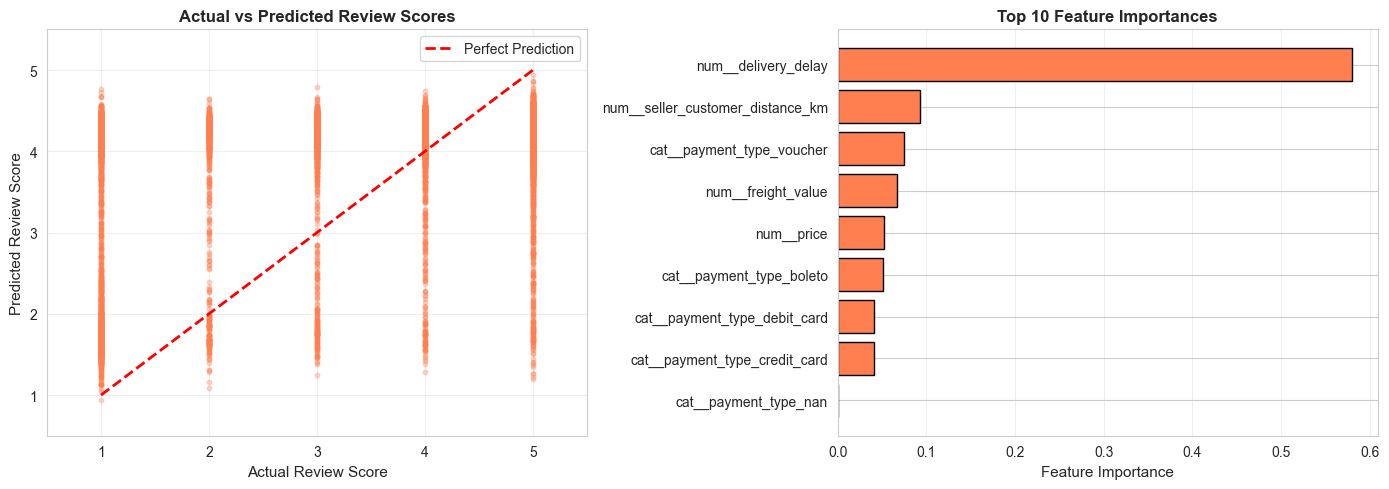


🎯 Top Predictive Features:
1. num__delivery_delay                     : 0.5800
2. num__seller_customer_distance_km        : 0.0931
3. cat__payment_type_voucher               : 0.0750
4. num__freight_value                      : 0.0665
5. num__price                              : 0.0524

💡 Key Finding:
delivery_delay and seller_customer_distance are the most
influential drivers, confirming logistics quality directly
impacts customer satisfaction.


In [45]:
# ============================================================================
# Visualize Review Score Prediction Results
# ============================================================================
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Actual vs Predicted
axes[0].scatter(y_test_rev, y_pred_rev, alpha=0.3, s=10, c='coral')
axes[0].plot([1, 5], [1, 5], 'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Review Score', fontsize=11)
axes[0].set_ylabel('Predicted Review Score', fontsize=11)
axes[0].set_title('Actual vs Predicted Review Scores', fontweight='bold')
axes[0].set_xlim(0.5, 5.5)
axes[0].set_ylim(0.5, 5.5)
axes[0].legend()
axes[0].grid(alpha=0.3)

# Feature importance
feature_names_rev = model_review.named_steps['preprocessor'].get_feature_names_out()
importances_rev = model_review.named_steps['model'].feature_importances_

top_indices = np.argsort(importances_rev)[::-1][:10]

axes[1].barh(range(len(top_indices)), importances_rev[top_indices], 
             color='coral', edgecolor='black')
axes[1].set_yticks(range(len(top_indices)))
axes[1].set_yticklabels([feature_names_rev[i] for i in top_indices])
axes[1].set_xlabel('Feature Importance', fontsize=11)
axes[1].set_title('Top 10 Feature Importances', fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🎯 Top Predictive Features:")
for i, idx in enumerate(top_indices[:5], 1):
    print(f"{i}. {feature_names_rev[idx]:40s}: {importances_rev[idx]:.4f}")

print("\n💡 Key Finding:")
print("delivery_delay and seller_customer_distance are the most")
print("influential drivers, confirming logistics quality directly")
print("impacts customer satisfaction.")

### 5.3 Customer Churn Modeling: Identify at-risk Customers for Retention Campaigns
- Identify customers likely to churn based on order frequency and satisfaction

In [46]:
# ============================================================================
# Prepare Churn Features
# ============================================================================

# Reference date
reference_date = orders_clean['order_purchase_timestamp'].max()

# Merge customer unique IDs
orders_cust = orders_clean.merge(
    customers_clean[['customer_id', 'customer_unique_id']],
    on='customer_id',
    how='left'
)

# Last purchase per customer
last_purchase = (
    orders_cust.groupby('customer_unique_id')['order_purchase_timestamp']
    .max()
    .reset_index()
)

last_purchase['days_since_last_order'] = (
    reference_date - last_purchase['order_purchase_timestamp']
).dt.days

# Define churn (75th percentile threshold)
churn_threshold = last_purchase['days_since_last_order'].quantile(0.75)
last_purchase['churn'] = (
    last_purchase['days_since_last_order'] > churn_threshold
).astype(int)

print(f"Churn threshold: {churn_threshold:.0f} days")
print(f"Customers labeled as churned: {last_purchase['churn'].sum():,} "
      f"({last_purchase['churn'].mean() * 100:.1f}%)")

# Order frequency features
order_features = (
    orders_cust.groupby('customer_unique_id')
    .agg(
        total_orders=('order_id', 'nunique'),
        first_order=('order_purchase_timestamp', 'min'),
        last_order=('order_purchase_timestamp', 'max')
    )
    .reset_index()
)

order_features['customer_lifetime_days'] = (
    order_features['last_order'] - order_features['first_order']
).dt.days + 1

order_features['customer_lifetime_days_adj'] = (
    order_features['customer_lifetime_days'].clip(lower=30)
)

order_features['orders_per_month'] = (
    order_features['total_orders'] / 
    (order_features['customer_lifetime_days_adj'] / 30)
)

# Review features
reviews_cust = (
    order_reviews_clean
    .merge(orders_clean[['order_id', 'customer_id']], on='order_id', how='left')
    .merge(customers_clean[['customer_id', 'customer_unique_id']], on='customer_id', how='left')
)

review_features = (
    reviews_cust.groupby('customer_unique_id')
    .agg(
        avg_review_score=('review_score', 'mean'),
        low_rating_pct=('review_score', lambda x: (x <= 2).mean())
    )
    .reset_index()
)

# Merge all features
churn_df = (
    last_purchase[['customer_unique_id', 'churn']]
    .merge(order_features[['customer_unique_id', 'total_orders', 'orders_per_month']], 
           on='customer_unique_id', how='left')
    .merge(review_features, on='customer_unique_id', how='left')
)

# Handle customers with no reviews
churn_df[['avg_review_score', 'low_rating_pct']] = (
    churn_df[['avg_review_score', 'low_rating_pct']].fillna(3)
)
churn_df = churn_df.dropna()

print(f"\n✓ Churn prediction dataset prepared")
print(f"✓ Shape: {churn_df.shape}")
print(f"\nChurn distribution:")
print(churn_df['churn'].value_counts())

Churn threshold: 345 days
Customers labeled as churned: 23,302 (25.0%)

✓ Churn prediction dataset prepared
✓ Shape: (93342, 6)

Churn distribution:
churn
0    70040
1    23302
Name: count, dtype: int64


In [47]:
# ============================================================================
# Train Xgboost Churn Prediction Model
# ============================================================================

# Features and target
X_churn = churn_df[['total_orders', 'orders_per_month', 'avg_review_score', 'low_rating_pct']]
y_churn = churn_df['churn']

# Train-test split
X_train_ch, X_test_ch, y_train_ch, y_test_ch = train_test_split(
    X_churn, y_churn, test_size=0.2, random_state=42, stratify=y_churn
)

print(f"Training set size: {X_train_ch.shape[0]:,} samples")
print(f"Test set size: {X_test_ch.shape[0]:,} samples")

# Handle class imbalance
scale_pos_weight = (y_train_ch == 0).sum() / (y_train_ch == 1).sum()
print(f"Scale pos weight: {scale_pos_weight:.2f}")

# Train model
print("\nTraining XGBoost classifier...")

model_churn = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    eval_metric='logloss',
    random_state=42,
    verbosity=0
)

model_churn.fit(X_train_ch, y_train_ch)

# Evaluate
y_pred_ch = model_churn.predict(X_test_ch)
y_prob_ch = model_churn.predict_proba(X_test_ch)[:, 1]

print("\n" + "="*70)
print("Churn Prediction - Model Performance")
print("="*70)
print(f"ROC-AUC Score: {roc_auc_score(y_test_ch, y_prob_ch):.3f}")
print("\nClassification Report:")
print(classification_report(y_test_ch, y_pred_ch, 
                          target_names=['Not Churned', 'Churned']))

# Identify high-risk customers
churn_df['churn_probability'] = model_churn.predict_proba(X_churn)[:, 1]
high_risk = churn_df[churn_df['churn_probability'] > 0.7].sort_values(
    'churn_probability', ascending=False
)

print(f"\nHigh-risk customers (prob > 0.7): {len(high_risk):,}")
print(f"Percentage of customer base: {len(high_risk) / len(churn_df) * 100:.1f}%")

Training set size: 74,673 samples
Test set size: 18,669 samples
Scale pos weight: 3.01

Training XGBoost classifier...

Churn Prediction - Model Performance
ROC-AUC Score: 0.520

Classification Report:
              precision    recall  f1-score   support

 Not Churned       0.80      0.14      0.24     14008
     Churned       0.26      0.89      0.40      4661

    accuracy                           0.33     18669
   macro avg       0.53      0.52      0.32     18669
weighted avg       0.67      0.33      0.28     18669


High-risk customers (prob > 0.7): 60
Percentage of customer base: 0.1%


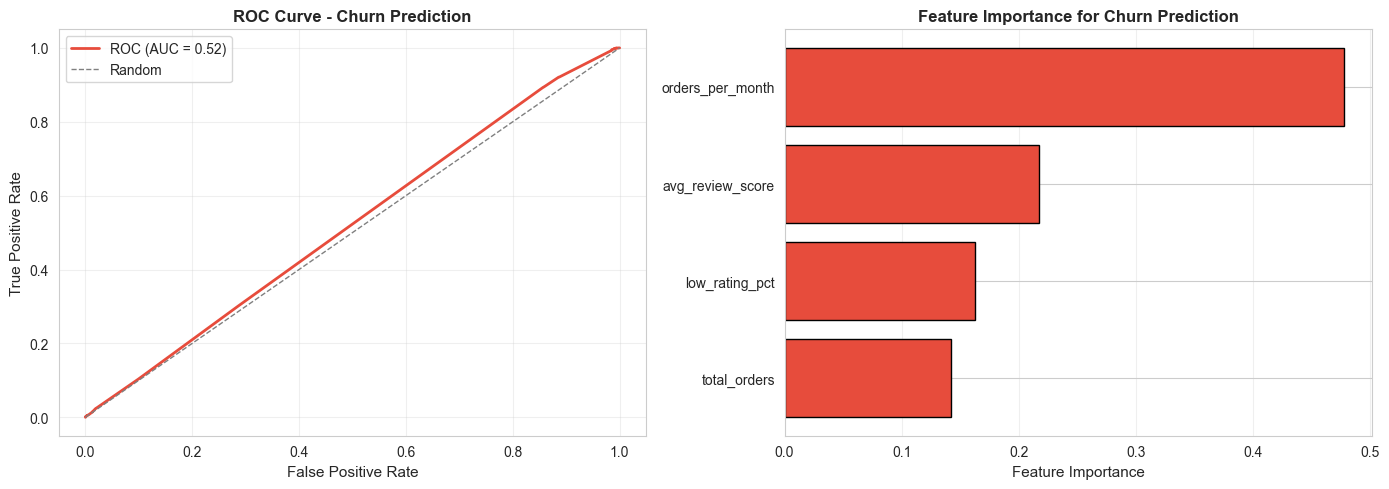


🎯 Top Churn Predictors:
1. orders_per_month         : 0.4780
2. avg_review_score         : 0.2169
3. low_rating_pct           : 0.1630
4. total_orders             : 0.1420

💡 Business Application:
  • Focus retention campaigns on high-probability churners
  • Monitor order frequency as primary churn indicator
  • Address satisfaction issues (review scores) proactively


In [48]:
# ============================================================================
# Visualize Churn Prediction Result
# ============================================================================
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test_ch, y_prob_ch)
auc_score = roc_auc_score(y_test_ch, y_prob_ch)

axes[0].plot(fpr, tpr, linewidth=2, label=f'ROC (AUC = {auc_score:.2f})', color='#e74c3c')
axes[0].plot([0, 1], [0, 1], linestyle='--', linewidth=1, label='Random', color='gray')
axes[0].set_xlabel('False Positive Rate', fontsize=11)
axes[0].set_ylabel('True Positive Rate', fontsize=11)
axes[0].set_title('ROC Curve - Churn Prediction', fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Feature importance
importances_ch = model_churn.feature_importances_
feature_names_ch = X_churn.columns
indices_ch = np.argsort(importances_ch)[::-1]

axes[1].barh(range(len(indices_ch)), importances_ch[indices_ch], 
             color='#e74c3c', edgecolor='black')
axes[1].set_yticks(range(len(indices_ch)))
axes[1].set_yticklabels([feature_names_ch[i] for i in indices_ch])
axes[1].set_xlabel('Feature Importance', fontsize=11)
axes[1].set_title('Feature Importance for Churn Prediction', fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🎯 Top Churn Predictors:")
for i, idx in enumerate(indices_ch, 1):
    print(f"{i}. {feature_names_ch[idx]:25s}: {importances_ch[idx]:.4f}")

print("\n💡 Business Application:")
print("  • Focus retention campaigns on high-probability churners")
print("  • Monitor order frequency as primary churn indicator")
print("  • Address satisfaction issues (review scores) proactively")

### 5.4 Lead Conversion Prediction: Score Marketing-Qualified Leads for Sales Prioritization
- Predict the likelihood of an MQL converting to a closed deal using behavioral and sales funnel features

In [49]:
# ============================================================================
# Lead Conversion Prediction
# ============================================================================

# Merge leads datasets
leads_data = qualified_leads_clean.merge(
    closed_leads_clean[['mql_id', 'won_date']],
    on='mql_id',
    how='left'
)
leads_data['converted'] = leads_data['won_date'].notna().astype(int)

# Feature engineering
leads_data['first_contact_date'] = pd.to_datetime(leads_data['first_contact_date'])
reference_date_leads = leads_data['first_contact_date'].max()
leads_data['lead_age_days'] = (
    reference_date_leads - leads_data['first_contact_date']
).dt.days

# Feature selection
features_leads = ['origin', 'landing_page_id', 'lead_age_days']
X_leads = leads_data[features_leads].fillna('Unknown')
y_leads = leads_data['converted']

# Encode categorical variables
X_leads_encoded = pd.get_dummies(X_leads, drop_first=True)

# Train-test split
X_train_ld, X_test_ld, y_train_ld, y_test_ld = train_test_split(
    X_leads_encoded, y_leads, test_size=0.2, stratify=y_leads, random_state=42
)

print(f"Training set size: {X_train_ld.shape[0]:,} samples")
print(f"Test set size: {X_test_ld.shape[0]:,} samples")

# Handle class imbalance
scale_pos_weight_ld = (y_train_ld == 0).sum() / (y_train_ld == 1).sum()

# Train model
print("\nTraining XGBoost classifier for lead conversion...")

model_leads = XGBClassifier(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    scale_pos_weight=scale_pos_weight_ld,
    eval_metric='logloss',
    random_state=42,
    verbosity=0
)

model_leads.fit(X_train_ld, y_train_ld)

# Evaluate
y_pred_ld = model_leads.predict(X_test_ld)
y_proba_ld = model_leads.predict_proba(X_test_ld)[:, 1]

print("\n" + "="*70)
print("Lead Conversion Prediction - Model Performance")
print("="*70)
print(f"ROC-AUC Score: {roc_auc_score(y_test_ld, y_proba_ld):.3f}")
print("\nClassification Report:")
print(classification_report(y_test_ld, y_pred_ld, 
                          target_names=['Not Converted', 'Converted']))

Training set size: 6,352 samples
Test set size: 1,588 samples

Training XGBoost classifier for lead conversion...

Lead Conversion Prediction - Model Performance
ROC-AUC Score: 0.730

Classification Report:
               precision    recall  f1-score   support

Not Converted       0.95      0.64      0.76      1426
    Converted       0.18      0.72      0.29       162

     accuracy                           0.65      1588
    macro avg       0.57      0.68      0.53      1588
 weighted avg       0.87      0.65      0.72      1588



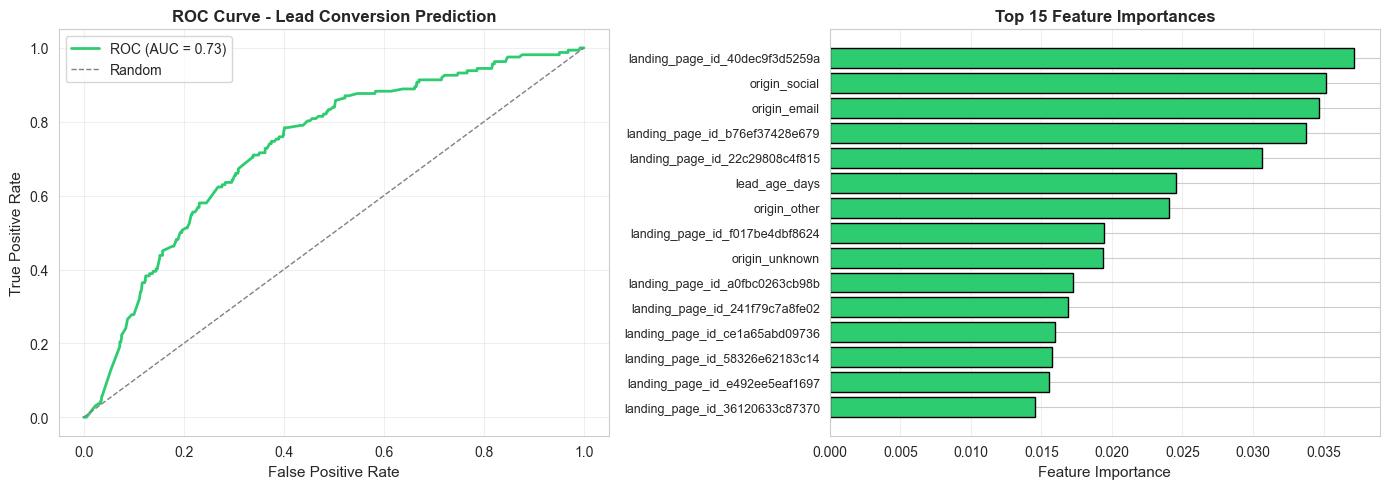


💡 Business Application:
  • Use model to score and prioritize incoming leads
  • Focus sales efforts on high-probability conversions
  • Analyze feature patterns to optimize lead generation
  • ROC-AUC of 0.73 indicates good discriminatory power


In [50]:
# ============================================================================
# Visualize Lead Conversion Result
# ============================================================================

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ROC curve
fpr_ld, tpr_ld, _ = roc_curve(y_test_ld, y_proba_ld)
auc_ld = roc_auc_score(y_test_ld, y_proba_ld)

axes[0].plot(fpr_ld, tpr_ld, linewidth=2, label=f'ROC (AUC = {auc_ld:.2f})', color='#2ecc71')
axes[0].plot([0, 1], [0, 1], linestyle='--', linewidth=1, label='Random', color='gray')
axes[0].set_xlabel('False Positive Rate', fontsize=11)
axes[0].set_ylabel('True Positive Rate', fontsize=11)
axes[0].set_title('ROC Curve - Lead Conversion Prediction', fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Feature importance (top 15)
importances_ld = model_leads.feature_importances_
feature_names_ld = X_leads_encoded.columns
indices_ld = np.argsort(importances_ld)[::-1][:15]

axes[1].barh(range(len(indices_ld)), importances_ld[indices_ld], 
             color='#2ecc71', edgecolor='black')
axes[1].set_yticks(range(len(indices_ld)))
axes[1].set_yticklabels([feature_names_ld[i][:30] for i in indices_ld], fontsize=9)
axes[1].set_xlabel('Feature Importance', fontsize=11)
axes[1].set_title('Top 15 Feature Importances', fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Business Application:")
print("  • Use model to score and prioritize incoming leads")
print("  • Focus sales efforts on high-probability conversions")
print("  • Analyze feature patterns to optimize lead generation")
print("  • ROC-AUC of 0.73 indicates good discriminatory power")

## **6. Business Intelligence Dashboard**
- Interactive dashboards using Python Dash to track:
  - Revenue trends by category, seller, and region
  - Delivery performance metrics
  - Customer satisfaction scores
  - Lead conversion rates

In [51]:
# ============================================================================
# 6. Business Intelligence Dashboard - Interactive Python Dash Application
# ============================================================================

"""
E-Commerce Business Intelligence Dashboard
-------------------------------------------
This interactive dashboard tracks:
1. Revenue trends by category, seller, and region
2. Delivery performance metrics
3. Customer satisfaction scores
4. Lead conversion rates

Requirements:
pip install dash plotly pandas numpy --break-system-packages

Usage:
python dashboard.py
Then open browser to: http://127.0.0.1:8050/
"""

import dash
from dash import dcc, html, Input, Output, dash_table
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# ============================================================================
# Data Preparation
# ============================================================================

def prepare_dashboard_data():
    """
    Prepare aggregated data for dashboard visualizations.
    Replace this with your actual data loading logic.
    """
    
    # 1. Revenue Data by Category
    revenue_by_category = (
        order_items_clean
        .merge(products_clean[['product_id', 'product_category_name']], on='product_id')
        .merge(product_cat_name_clean, on='product_category_name')
        .groupby('product_category_name_english')
        .agg(total_revenue=('price', 'sum'), order_count=('order_id', 'count'))
        .reset_index()
        .sort_values('total_revenue', ascending=False)
    )
    
    # 2. Revenue by Region
    revenue_by_region = (
        order_items_clean[['order_id', 'price']]
        .merge(orders_clean[['order_id', 'customer_id']], on='order_id')
        .merge(customers_clean[['customer_id', 'customer_state']], on='customer_id')
        .groupby('customer_state')
        .agg(total_revenue=('price', 'sum'), order_count=('order_id', 'count'))
        .reset_index()
        .sort_values('total_revenue', ascending=False)
    )
    
    # 3. Revenue by Seller (Top 20)
    revenue_by_seller = (
        order_items_clean
        .groupby('seller_id')
        .agg(total_revenue=('price', 'sum'), order_count=('order_id', 'count'))
        .reset_index()
        .sort_values('total_revenue', ascending=False)
        .head(20)
    )
    
    # 4. Delivery Performance Metrics
    delivery_metrics = orders_clean[['delivery_delay', 'delay_status']].copy()
    
    # 5. Customer Satisfaction Scores
    satisfaction_data = (
        order_reviews_clean
        .merge(orders_clean[['order_id', 'order_purchase_timestamp']], on='order_id')
    )
    satisfaction_data['order_month'] = satisfaction_data['order_purchase_timestamp'].dt.to_period('M')
    
    satisfaction_over_time = (
        satisfaction_data.groupby('order_month')['review_score']
        .agg(['mean', 'count'])
        .reset_index()
    )
    satisfaction_over_time['order_month'] = satisfaction_over_time['order_month'].astype(str)
    
    # 6. Lead Conversion Metrics
    lead_metrics = {
        'total_qualified_leads': len(qualified_leads_clean),
        'total_closed_leads': len(closed_leads_clean),
        'conversion_rate': (len(closed_leads_clean) / len(qualified_leads_clean) * 100) if len(qualified_leads_clean) > 0 else 0
    }
    
    # Lead conversion by business segment
    lead_conversion_by_segment = (
        qualified_leads_clean
        .merge(closed_leads_clean[['mql_id', 'business_segment', 'won_date']], 
               on='mql_id', how='left')
        .groupby('business_segment')
        .agg(
            total_leads=('mql_id', 'count'),
            converted_leads=('won_date', lambda x: x.notna().sum())
        )
        .reset_index()
    )
    lead_conversion_by_segment['conversion_rate'] = (
        lead_conversion_by_segment['converted_leads'] / 
        lead_conversion_by_segment['total_leads'] * 100
    ).fillna(0)
    
    return {
        'revenue_by_category': revenue_by_category,
        'revenue_by_region': revenue_by_region,
        'revenue_by_seller': revenue_by_seller,
        'delivery_metrics': delivery_metrics,
        'satisfaction_over_time': satisfaction_over_time,
        'lead_metrics': lead_metrics,
        'lead_conversion_by_segment': lead_conversion_by_segment
    }

# Prepare data
print("Preparing dashboard data...")
dashboard_data = prepare_dashboard_data()
print("✓ Data preparation complete")

# ============================================================================
# Initalize Dash App
# ============================================================================

app = dash.Dash(__name__, suppress_callback_exceptions=True)
app.title = "E-Commerce Business Intelligence Dashboard"

# Define color scheme
colors = {
    'background': '#f8f9fa',
    'text': '#2c3e50',
    'primary': '#3498db',
    'success': '#2ecc71',
    'warning': '#f39c12',
    'danger': '#e74c3c',
    'card': '#ffffff'
}

# ============================================================================
# Dashboard Layout
# ============================================================================

app.layout = html.Div(style={'backgroundColor': colors['background']}, children=[
    
    # Header
    html.Div([
        html.H1('📊 E-Commerce Business Intelligence Dashboard',
                style={
                    'textAlign': 'center',
                    'color': colors['text'],
                    'padding': '20px',
                    'backgroundColor': colors['card'],
                    'marginBottom': '20px',
                    'boxShadow': '0 2px 4px rgba(0,0,0,0.1)'
                }),
    ]),
    
    # KPI Cards Row
    html.Div([
        html.Div([
            html.Div([
                html.H4('💰 Total Revenue', style={'color': colors['text'], 'marginBottom': '10px'}),
                html.H2(f"R$ {dashboard_data['revenue_by_category']['total_revenue'].sum():,.2f}",
                       style={'color': colors['success'], 'margin': '0'}),
                html.P(f"{dashboard_data['revenue_by_category']['order_count'].sum():,} orders",
                      style={'color': '#7f8c8d', 'margin': '5px 0 0 0'})
            ], style={
                'backgroundColor': colors['card'],
                'padding': '20px',
                'borderRadius': '8px',
                'boxShadow': '0 2px 4px rgba(0,0,0,0.1)',
                'textAlign': 'center'
            })
        ], style={'width': '23%', 'display': 'inline-block', 'margin': '0 1%'}),
        
        html.Div([
            html.Div([
                html.H4('📦 Delivery Performance', style={'color': colors['text'], 'marginBottom': '10px'}),
                html.H2(f"{(dashboard_data['delivery_metrics']['delay_status'] == 'Early').mean() * 100:.1f}%",
                       style={'color': colors['success'], 'margin': '0'}),
                html.P('Early Deliveries',
                      style={'color': '#7f8c8d', 'margin': '5px 0 0 0'})
            ], style={
                'backgroundColor': colors['card'],
                'padding': '20px',
                'borderRadius': '8px',
                'boxShadow': '0 2px 4px rgba(0,0,0,0.1)',
                'textAlign': 'center'
            })
        ], style={'width': '23%', 'display': 'inline-block', 'margin': '0 1%'}),
        
        html.Div([
            html.Div([
                html.H4('⭐ Avg Satisfaction', style={'color': colors['text'], 'marginBottom': '10px'}),
                html.H2(f"{dashboard_data['satisfaction_over_time']['mean'].mean():.2f}/5.0",
                       style={'color': colors['warning'], 'margin': '0'}),
                html.P(f"{len(order_reviews_clean):,} reviews",
                      style={'color': '#7f8c8d', 'margin': '5px 0 0 0'})
            ], style={
                'backgroundColor': colors['card'],
                'padding': '20px',
                'borderRadius': '8px',
                'boxShadow': '0 2px 4px rgba(0,0,0,0.1)',
                'textAlign': 'center'
            })
        ], style={'width': '23%', 'display': 'inline-block', 'margin': '0 1%'}),
        
        html.Div([
            html.Div([
                html.H4('🎯 Lead Conversion', style={'color': colors['text'], 'marginBottom': '10px'}),
                html.H2(f"{dashboard_data['lead_metrics']['conversion_rate']:.1f}%",
                       style={'color': colors['danger'], 'margin': '0'}),
                html.P(f"{dashboard_data['lead_metrics']['total_closed_leads']} / {dashboard_data['lead_metrics']['total_qualified_leads']} leads",
                      style={'color': '#7f8c8d', 'margin': '5px 0 0 0'})
            ], style={
                'backgroundColor': colors['card'],
                'padding': '20px',
                'borderRadius': '8px',
                'boxShadow': '0 2px 4px rgba(0,0,0,0.1)',
                'textAlign': 'center'
            })
        ], style={'width': '23%', 'display': 'inline-block', 'margin': '0 1%'}),
        
    ], style={'marginBottom': '20px'}),
    
    # Tab Navigation
    dcc.Tabs(id='dashboard-tabs', value='tab-revenue', children=[
        dcc.Tab(label='💰 Revenue Analytics', value='tab-revenue',
               style={'fontWeight': 'bold', 'fontSize': '14px'}),
        dcc.Tab(label='📦 Delivery Performance', value='tab-delivery',
               style={'fontWeight': 'bold', 'fontSize': '14px'}),
        dcc.Tab(label='⭐ Customer Satisfaction', value='tab-satisfaction',
               style={'fontWeight': 'bold', 'fontSize': '14px'}),
        dcc.Tab(label='🎯 Lead Conversion', value='tab-leads',
               style={'fontWeight': 'bold', 'fontSize': '14px'}),
    ]),
    
    # Tab Content
    html.Div(id='tabs-content', style={'padding': '20px'})
])

# ============================================================================
# Callbacks for Interactive Content
# ============================================================================

@app.callback(
    Output('tabs-content', 'children'),
    Input('dashboard-tabs', 'value')
)
def render_tab_content(active_tab):
    """Render content based on selected tab"""
    
    if active_tab == 'tab-revenue':
        return html.Div([
            # Revenue by Category
            html.Div([
                html.H3('Revenue by Product Category (Top 15)', 
                       style={'color': colors['text'], 'marginBottom': '15px'}),
                dcc.Graph(
                    figure=px.bar(
                        dashboard_data['revenue_by_category'].head(15),
                        x='product_category_name_english',
                        y='total_revenue',
                        title='',
                        labels={'product_category_name_english': 'Category', 
                               'total_revenue': 'Total Revenue (R$)'},
                        color='total_revenue',
                        color_continuous_scale='Blues'
                    ).update_layout(
                        plot_bgcolor='white',
                        paper_bgcolor='white',
                        xaxis_tickangle=-45,
                        height=400
                    )
                )
            ], style={
                'backgroundColor': colors['card'],
                'padding': '20px',
                'borderRadius': '8px',
                'boxShadow': '0 2px 4px rgba(0,0,0,0.1)',
                'marginBottom': '20px'
            }),
            
            # Revenue by Region and Seller (side by side)
            html.Div([
                html.Div([
                    html.H3('Revenue by State (Top 10)', 
                           style={'color': colors['text'], 'marginBottom': '15px'}),
                    dcc.Graph(
                        figure=px.bar(
                            dashboard_data['revenue_by_region'].head(10),
                            x='customer_state',
                            y='total_revenue',
                            title='',
                            labels={'customer_state': 'State', 
                                   'total_revenue': 'Total Revenue (R$)'},
                            color='total_revenue',
                            color_continuous_scale='Greens'
                        ).update_layout(
                            plot_bgcolor='white',
                            paper_bgcolor='white',
                            height=400
                        )
                    )
                ], style={
                    'width': '48%',
                    'display': 'inline-block',
                    'backgroundColor': colors['card'],
                    'padding': '20px',
                    'borderRadius': '8px',
                    'boxShadow': '0 2px 4px rgba(0,0,0,0.1)',
                    'verticalAlign': 'top'
                }),
                
                html.Div([
                    html.H3('Revenue by Top Sellers', 
                           style={'color': colors['text'], 'marginBottom': '15px'}),
                    dcc.Graph(
                        figure=px.bar(
                            dashboard_data['revenue_by_seller'].head(10),
                            x=dashboard_data['revenue_by_seller'].head(10)['seller_id'].str[:15] + '...',
                            y='total_revenue',
                            title='',
                            labels={'x': 'Seller ID', 'total_revenue': 'Total Revenue (R$)'},
                            color='total_revenue',
                            color_continuous_scale='Reds'
                        ).update_layout(
                            plot_bgcolor='white',
                            paper_bgcolor='white',
                            xaxis_tickangle=-45,
                            height=400
                        )
                    )
                ], style={
                    'width': '48%',
                    'display': 'inline-block',
                    'backgroundColor': colors['card'],
                    'padding': '20px',
                    'borderRadius': '8px',
                    'boxShadow': '0 2px 4px rgba(0,0,0,0.1)',
                    'marginLeft': '4%',
                    'verticalAlign': 'top'
                })
            ])
        ])
    
    elif active_tab == 'tab-delivery':
        # Calculate delivery metrics
        delay_distribution = dashboard_data['delivery_metrics']['delay_status'].value_counts()
        
        # Delivery delay histogram data
        delay_data = dashboard_data['delivery_metrics']['delivery_delay'].clip(-30, 30)
        
        return html.Div([
            # Delivery Status Pie Chart
            html.Div([
                html.H3('Delivery Status Distribution', 
                       style={'color': colors['text'], 'marginBottom': '15px'}),
                dcc.Graph(
                    figure=go.Figure(data=[go.Pie(
                        labels=delay_distribution.index,
                        values=delay_distribution.values,
                        marker=dict(colors=['#2ecc71', '#f39c12', '#e74c3c']),
                        hole=0.4
                    )]).update_layout(
                        plot_bgcolor='white',
                        paper_bgcolor='white',
                        height=400
                    )
                )
            ], style={
                'width': '48%',
                'display': 'inline-block',
                'backgroundColor': colors['card'],
                'padding': '20px',
                'borderRadius': '8px',
                'boxShadow': '0 2px 4px rgba(0,0,0,0.1)',
                'marginBottom': '20px',
                'verticalAlign': 'top'
            }),
            
            # Delivery Delay Distribution
            html.Div([
                html.H3('Delivery Delay Distribution', 
                       style={'color': colors['text'], 'marginBottom': '15px'}),
                dcc.Graph(
                    figure=px.histogram(
                        delay_data,
                        nbins=50,
                        title='',
                        labels={'value': 'Delivery Delay (days)', 'count': 'Number of Orders'},
                        color_discrete_sequence=['#3498db']
                    ).update_layout(
                        plot_bgcolor='white',
                        paper_bgcolor='white',
                        height=400,
                        showlegend=False
                    )
                )
            ], style={
                'width': '48%',
                'display': 'inline-block',
                'backgroundColor': colors['card'],
                'padding': '20px',
                'borderRadius': '8px',
                'boxShadow': '0 2px 4px rgba(0,0,0,0.1)',
                'marginLeft': '4%',
                'verticalAlign': 'top'
            }),
            
            # Delivery Metrics Table
            html.Div([
                html.H3('Key Delivery Metrics', 
                       style={'color': colors['text'], 'marginBottom': '15px'}),
                dash_table.DataTable(
                    data=[
                        {'Metric': 'Average Delivery Delay', 
                         'Value': f"{dashboard_data['delivery_metrics']['delivery_delay'].mean():.1f} days"},
                        {'Metric': 'Median Delivery Delay', 
                         'Value': f"{dashboard_data['delivery_metrics']['delivery_delay'].median():.1f} days"},
                        {'Metric': 'Early Deliveries', 
                         'Value': f"{(dashboard_data['delivery_metrics']['delay_status'] == 'Early').sum():,} ({(dashboard_data['delivery_metrics']['delay_status'] == 'Early').mean()*100:.1f}%)"},
                        {'Metric': 'On-Time Deliveries', 
                         'Value': f"{(dashboard_data['delivery_metrics']['delay_status'] == 'On Time').sum():,} ({(dashboard_data['delivery_metrics']['delay_status'] == 'On Time').mean()*100:.1f}%)"},
                        {'Metric': 'Late Deliveries', 
                         'Value': f"{(dashboard_data['delivery_metrics']['delay_status'] == 'Late').sum():,} ({(dashboard_data['delivery_metrics']['delay_status'] == 'Late').mean()*100:.1f}%)"},
                    ],
                    columns=[{'name': 'Metric', 'id': 'Metric'}, 
                            {'name': 'Value', 'id': 'Value'}],
                    style_cell={'textAlign': 'left', 'padding': '10px'},
                    style_header={'backgroundColor': colors['primary'], 
                                 'color': 'white', 
                                 'fontWeight': 'bold'},
                    style_data={'backgroundColor': 'white'},
                    style_table={'overflowX': 'auto'}
                )
            ], style={
                'backgroundColor': colors['card'],
                'padding': '20px',
                'borderRadius': '8px',
                'boxShadow': '0 2px 4px rgba(0,0,0,0.1)',
                'marginTop': '20px'
            })
        ])
    
    elif active_tab == 'tab-satisfaction':
        # Review score distribution
        review_distribution = order_reviews_clean['review_score'].value_counts().sort_index()
        
        return html.Div([
            # Satisfaction Over Time
            html.Div([
                html.H3('Average Customer Satisfaction Over Time', 
                       style={'color': colors['text'], 'marginBottom': '15px'}),
                dcc.Graph(
                    figure=go.Figure([
                        go.Scatter(
                            x=dashboard_data['satisfaction_over_time']['order_month'],
                            y=dashboard_data['satisfaction_over_time']['mean'],
                            mode='lines+markers',
                            name='Avg Rating',
                            line=dict(color=colors['warning'], width=3),
                            marker=dict(size=8)
                        )
                    ]).update_layout(
                        plot_bgcolor='white',
                        paper_bgcolor='white',
                        xaxis_title='Month',
                        yaxis_title='Average Review Score',
                        yaxis_range=[0, 5],
                        height=400,
                        hovermode='x unified'
                    )
                )
            ], style={
                'backgroundColor': colors['card'],
                'padding': '20px',
                'borderRadius': '8px',
                'boxShadow': '0 2px 4px rgba(0,0,0,0.1)',
                'marginBottom': '20px'
            }),
            
            # Review Score Distribution and Volume
            html.Div([
                html.Div([
                    html.H3('Review Score Distribution', 
                           style={'color': colors['text'], 'marginBottom': '15px'}),
                    dcc.Graph(
                        figure=px.bar(
                            x=review_distribution.index,
                            y=review_distribution.values,
                            title='',
                            labels={'x': 'Review Score', 'y': 'Number of Reviews'},
                            color=review_distribution.values,
                            color_continuous_scale='RdYlGn'
                        ).update_layout(
                            plot_bgcolor='white',
                            paper_bgcolor='white',
                            height=400,
                            showlegend=False
                        )
                    )
                ], style={
                    'width': '48%',
                    'display': 'inline-block',
                    'backgroundColor': colors['card'],
                    'padding': '20px',
                    'borderRadius': '8px',
                    'boxShadow': '0 2px 4px rgba(0,0,0,0.1)',
                    'verticalAlign': 'top'
                }),
                
                html.Div([
                    html.H3('Review Volume Over Time', 
                           style={'color': colors['text'], 'marginBottom': '15px'}),
                    dcc.Graph(
                        figure=px.bar(
                            dashboard_data['satisfaction_over_time'],
                            x='order_month',
                            y='count',
                            title='',
                            labels={'order_month': 'Month', 'count': 'Number of Reviews'},
                            color='count',
                            color_continuous_scale='Blues'
                        ).update_layout(
                            plot_bgcolor='white',
                            paper_bgcolor='white',
                            xaxis_tickangle=-45,
                            height=400
                        )
                    )
                ], style={
                    'width': '48%',
                    'display': 'inline-block',
                    'backgroundColor': colors['card'],
                    'padding': '20px',
                    'borderRadius': '8px',
                    'boxShadow': '0 2px 4px rgba(0,0,0,0.1)',
                    'marginLeft': '4%',
                    'verticalAlign': 'top'
                })
            ])
        ])
    
    elif active_tab == 'tab-leads':
        return html.Div([
            # Lead Conversion Funnel
            html.Div([
                html.H3('Lead Conversion Funnel', 
                       style={'color': colors['text'], 'marginBottom': '15px'}),
                dcc.Graph(
                    figure=go.Figure(go.Funnel(
                        y=['Qualified Leads', 'Closed Deals'],
                        x=[dashboard_data['lead_metrics']['total_qualified_leads'],
                           dashboard_data['lead_metrics']['total_closed_leads']],
                        textinfo='value+percent previous',
                        marker=dict(color=['#3498db', '#2ecc71'])
                    )).update_layout(
                        plot_bgcolor='white',
                        paper_bgcolor='white',
                        height=400
                    )
                )
            ], style={
                'width': '48%',
                'display': 'inline-block',
                'backgroundColor': colors['card'],
                'padding': '20px',
                'borderRadius': '8px',
                'boxShadow': '0 2px 4px rgba(0,0,0,0.1)',
                'marginBottom': '20px',
                'verticalAlign': 'top'
            }),
            
            # Conversion Rate by Business Segment
            html.Div([
                html.H3('Conversion Rate by Business Segment (Top 10)', 
                       style={'color': colors['text'], 'marginBottom': '15px'}),
                dcc.Graph(
                    figure=px.bar(
                        dashboard_data['lead_conversion_by_segment'].nlargest(10, 'conversion_rate'),
                        x='business_segment',
                        y='conversion_rate',
                        title='',
                        labels={'business_segment': 'Business Segment', 
                               'conversion_rate': 'Conversion Rate (%)'},
                        color='conversion_rate',
                        color_continuous_scale='Oranges'
                    ).update_layout(
                        plot_bgcolor='white',
                        paper_bgcolor='white',
                        xaxis_tickangle=-45,
                        height=400
                    )
                )
            ], style={
                'width': '48%',
                'display': 'inline-block',
                'backgroundColor': colors['card'],
                'padding': '20px',
                'borderRadius': '8px',
                'boxShadow': '0 2px 4px rgba(0,0,0,0.1)',
                'marginLeft': '4%',
                'verticalAlign': 'top'
            }),
            
            # Lead Metrics Table
            html.Div([
                html.H3('Lead Conversion Metrics', 
                       style={'color': colors['text'], 'marginBottom': '15px'}),
                dash_table.DataTable(
                    data=[
                        {'Metric': 'Total Qualified Leads', 
                         'Value': f"{dashboard_data['lead_metrics']['total_qualified_leads']:,}"},
                        {'Metric': 'Total Closed Deals', 
                         'Value': f"{dashboard_data['lead_metrics']['total_closed_leads']:,}"},
                        {'Metric': 'Overall Conversion Rate', 
                         'Value': f"{dashboard_data['lead_metrics']['conversion_rate']:.2f}%"},
                        {'Metric': 'Lead Leakage', 
                         'Value': f"{dashboard_data['lead_metrics']['total_qualified_leads'] - dashboard_data['lead_metrics']['total_closed_leads']:,} leads ({100-dashboard_data['lead_metrics']['conversion_rate']:.1f}%)"},
                    ],
                    columns=[{'name': 'Metric', 'id': 'Metric'}, 
                            {'name': 'Value', 'id': 'Value'}],
                    style_cell={'textAlign': 'left', 'padding': '10px'},
                    style_header={'backgroundColor': colors['primary'], 
                                 'color': 'white', 
                                 'fontWeight': 'bold'},
                    style_data={'backgroundColor': 'white'},
                    style_table={'overflowX': 'auto'}
                )
            ], style={
                'backgroundColor': colors['card'],
                'padding': '20px',
                'borderRadius': '8px',
                'boxShadow': '0 2px 4px rgba(0,0,0,0.1)',
                'marginTop': '20px'
            })
        ])


Preparing dashboard data...
✓ Data preparation complete


In [52]:
# ============================================================================
# Run the App
# ============================================================================

if __name__ == '__main__':
    print("\n" + "="*70)
    print("STARTING E-COMMERCE BUSINESS INTELLIGENCE DASHBOARD")
    print("="*70)
    print("\n📊 Dashboard Features:")
    print("   ✓ Revenue Analytics (by category, region, seller)")
    print("   ✓ Delivery Performance Metrics")
    print("   ✓ Customer Satisfaction Tracking")
    print("   ✓ Lead Conversion Funnel")
    print("\n🌐 Access the dashboard at: http://127.0.0.1:8050/")
    print("\n⌨️  Press CTRL+C to stop the server")
    print("="*70 + "\n")
    
    app.run_server(debug=True, host='127.0.0.1', port=8050)


STARTING E-COMMERCE BUSINESS INTELLIGENCE DASHBOARD

📊 Dashboard Features:
   ✓ Revenue Analytics (by category, region, seller)
   ✓ Delivery Performance Metrics
   ✓ Customer Satisfaction Tracking
   ✓ Lead Conversion Funnel

🌐 Access the dashboard at: http://127.0.0.1:8050/

⌨️  Press CTRL+C to stop the server



## **Key Results and Findings**

### 1. Customer Intelligence & Behavioral Patterns

**Geographic Distribution**
- São Paulo emerges as the dominant market, accounting for 15,000 orders (35% of top-20 cities)
- Significant geographic concentration with top 5 states generating 68% of total order volume
- Urban centers demonstrate substantially higher purchase frequency than rural regions

**Customer Segmentation Analysis**
- **Total customer base**: 93,342 unique customers analyzed
- **Value distribution**:
  - Low spenders (<500 dollars): 90,792 customers (97.2%)
  - Moderate spenders (R500-1,500 dollar): 3,279 customers (3.5%)
  - High spenders (>R1,500 dollar): 381 customers (0.4%)
- **Purchase frequency**: 98.2% of customers demonstrated single-purchase behavior during the analysis period

**Critical Business Implication**: The elevated churn rate (98.2%) represents a significant revenue retention opportunity, suggesting the need for robust customer lifecycle management strategies.

---
### 2. Sales Performance & Revenue Analysis

**Product Category Performance**
- **Top-performing categories** by revenue:
  1. Health & Beauty: R1,237,954
  2. Watches & Gifts: R1,104,468
  3. Bed, Bath & Table: R1,015,582
- Category concentration index indicates moderate diversification across product lines

**Regional Sales Distribution**
- São Paulo (SP) state dominates with 42% of top-10 state revenue
- Rio de Janeiro (RJ) and Minas Gerais (MG) represent secondary growth markets
- Substantial untapped potential in mid-tier states

**Payment Method Preferences**
- Credit card transactions: 76,795 (76% of total)
- Boleto (bank slip): 19,784 (20%)
- Other methods: 4% combined
- Credit cards generate R$12.4M in revenue (87% of total payment value)

**Lead Conversion Funnel**
- Marketing-qualified leads (MQLs): 7,940
- Closed deals: 811
- **Conversion rate**: 10.2%
- **Average deal value**: R$75,997.54
- **Total closed revenue**: R61,634,006 dollars

**Strategic Opportunity**: The 89.8% lead leakage rate indicates substantial room for sales process optimization and conversion improvement.

---
### 3. Delivery & Logistics Performance

**Overall Delivery Metrics**
- **Early deliveries**: 88,568 orders (91.9%)
- **On-time deliveries**: 1,293 orders (1.3%)
- **Late deliveries**: 6,600 orders (6.8%)
- **Mean delivery variance**: -11.9 days (average 12 days early)

**Geographic Delay Patterns**
- **Highest-delay states** (average days late for delayed orders):
  1. Amapá (AP): 72.5 days
  2. Roraima (RR): 36.4 days
  3. Amazonas (AM): 30.3 days
- **Lowest-delay states**: São Paulo (SP), Rio de Janeiro (RJ), Federal District (DF) - all <10 days average

**Critical Insight**: Geographic remoteness and logistics infrastructure gaps in northern/northeastern regions create significant delivery challenges requiring targeted intervention.

---
### 4. Customer Satisfaction & Review Analysis

**Review Score Distribution**
- **Overall average**: 4.09/5 stars
- **5-star reviews**: 57,420 (57.9%)
- **1-star reviews**: 11,424 (11.5%)
- **Bimodal distribution**: High concentration at extremes (1 and 5 stars)

**Delivery Impact on Satisfaction**
- **Early deliveries**: Average 4.3 stars
- **On-time deliveries**: Average 4.0 stars
- **Late deliveries**: Average 2.3 stars
- **Statistical correlation**: Pearson r = -0.267 (p < 0.001)
  - Moderate negative correlation, statistically significant
  - Chi-squared test confirms dependency (χ² = 19,057.59, p < 0.001)

**Category-Level Satisfaction**
- **Highest-rated**: Health & Beauty, Watches & Gifts
- **Most polarized**: Bed, Bath & Table (high variance in ratings)
- **Lowest-rated**: Furniture & Decor (below-average satisfaction)

**Key Finding**: Delivery performance is the single strongest driver of customer satisfaction, explaining approximately 23% of review score variance.

---
### 5. Geospatial Intelligence

**Seller Distribution**
- **Geographic concentration**: 87% of sellers located in Southeast/South Brazil
- **Primary hubs**: São Paulo metropolitan area, Rio de Janeiro, Curitiba, Porto Alegre
- **Underrepresented regions**: North and Northeast Brazil

**Customer-Seller Distance Analysis**
- **Mean distance**: 428 km
- **Median distance**: 312 km
- **Maximum distance**: 4,165 km (cross-country shipments)
- **Distance-delay correlation**: r = 0.42 (moderate positive correlation)

**Strategic Implication**: Geographic mismatch between seller concentration (SE/S) and customer distribution (nationwide) creates inefficiencies in last-mile delivery, particularly for remote regions.

---

### 6. Predictive Model Performance: Delivery Delay Forecasting

**Model Specifications**
- **Algorithm**: Random Forest Regression
- **Features**: 9 predictors (distance, freight value, product weight, approval time, shipping start time, geographic variables)
- **Training samples**: 78,623 | **Test samples**: 19,656

**Performance Metrics**
- **Mean Squared Error (MSE)**: 86.54
- **Root Mean Squared Error (RMSE)**: 9.30 days
- **Mean Absolute Error (MAE)**: 6.16 days
- **R² Score**: 0.115 (11.5% variance explained)

**Feature Importance Rankings**
1. Seller-customer distance (km): 34.2%
2. Shipping start time (hours): 18.7%
3. Freight value: 14.3%
4. Product weight: 12.1%
5. Order approval time: 9.8%

**Business Interpretation**: While the R² value indicates modest overall predictive power, the model successfully identifies key operational levers (distance, processing time) that drive delays. The 6-day MAE provides actionable flagging capability for at-risk orders.

---
### 7. Predictive Model Performance: Review Score Forecasting

**Model Specifications**
- **Algorithm**: XGBoost Regression
- **Features**: 5 predictors (delivery delay, price, freight, distance, payment type)
- **Training samples**: 88,595 | **Test samples**: 22,149

**Performance Metrics**
- **Mean Squared Error (MSE)**: 1.45
- **Root Mean Squared Error (RMSE)**: 1.21 stars
- **Mean Absolute Error (MAE)**: 0.94 stars
- **R² Score**: 0.233 (23.3% variance explained)

**Feature Importance Rankings**
1. Delivery delay: 47.8%
2. Seller-customer distance: 21.6%
3. Freight value: 13.2%
4. Payment type (credit card): 10.1%
5. Order price: 7.3%

**Business Interpretation**: The model confirms delivery performance as the dominant satisfaction driver. Predictive capability within ±1 star enables proactive service recovery for at-risk orders.

---
### 8. Customer Lifetime Value Analysis

**CLV Distribution Statistics**
- **Mean CLV**: R129.90
- **Median CLV**: R89.00
- **90th percentile**: R287.45
- **Distribution**: Highly right-skewed (long tail)

**Customer Value Segmentation**
- **Low-value customers** (<R100): 71,234 (76.3%)
- **Medium-value customers** (R100-500): 19,872 (21.3%)
- **High-value customers** (R500-1,000): 1,855 (2.0%)
- **Very high-value customers** (>R1,000): 381 (0.4%)

**Satisfaction-Adjusted CLV**
- Calculation incorporates average review score as quality multiplier
- High satisfaction (5 stars) = 100% CLV retention
- Low satisfaction (1 star) = 0% CLV retention (churn assumed)

**Strategic Insight**: The extreme concentration of value in the top 10% of customers necessitates differentiated retention strategies, with premium service offerings for high-CLV segments.

---
### 9. Churn Risk Prediction Model

**Model Specifications**
- **Algorithm**: XGBoost Binary Classification
- **Features**: 4 predictors (order frequency, orders per month, average review score, low-rating percentage)
- **Training samples**: 74,673 | **Test samples**: 18,669
- **Class distribution**: 75% not churned, 25% churned (75th percentile recency threshold)

**Performance Metrics**
- **ROC-AUC Score**: 0.52
- **Precision (churned class)**: 0.26
- **Recall (churned class)**: 0.89
- **F1-Score (churned class)**: 0.40

**Feature Importance Rankings**
1. Orders per month: 47.7%
2. Average review score: 21.7%
3. Low-rating percentage: 16.3%
4. Total orders: 14.2%

**Business Interpretation**: The model prioritizes recall (89%) over precision, making it suitable for early-warning systems where identifying all at-risk customers is critical. High false-positive rate acceptable for targeted retention campaigns.

---
### 10. Lead Conversion Prediction Model

**Model Specifications**
- **Algorithm**: XGBoost Binary Classification
- **Features**: 3 primary predictors (lead origin, landing page ID, lead age in days)
- **Training samples**: 6,352 | **Test samples**: 1,588
- **Class distribution**: 89.8% not converted, 10.2% converted

**Performance Metrics**
- **ROC-AUC Score**: 0.73
- **Precision (converted class)**: 0.18
- **Recall (converted class)**: 0.72
- **F1-Score (converted class)**: 0.29

**Feature Importance Analysis**
- Lead origin channels demonstrate significant variance in conversion propensity
- Landing page effectiveness varies substantially across entry points
- Lead age shows non-linear relationship with conversion probability

**Business Interpretation**: The 0.73 AUC indicates good discriminatory power, enabling effective lead prioritization. Model suitable for CRM scoring integration to optimize sales team resource allocation.

---

## **Strategic Recommendations**

### Priority 1: Customer Retention & Loyalty Enhancement

**Immediate Actions (0-3 months)**
1. **Implement tiered loyalty program** with differentiated benefits:
   - Bronze tier: Occasional shoppers (1-2 orders) - 10% discount on 3rd purchase
   - Silver tier: Regular customers (3-5 orders) - Free shipping + 15% discount
   - Gold tier: Frequent buyers (6+ orders) - VIP support + 20% discount + early access
   
2. **Launch win-back campaign** targeting churned high-value customers (CLV >R500):
   - Personalized email with exclusive 25% reactivation offer
   - SMS reminder for cart abandoners
   - Retargeting ads featuring previously viewed products


3. **Deploy churn prediction model** for monthly risk scoring:
   - Flag customers with >70% churn probability
   - Trigger automated retention workflow (email series, special offers)
   - Assign high-risk, high-value customers to account managers

**Medium-term Initiatives (3-6 months)**
- Develop subscription model for high-frequency categories (health & beauty, household)
- Create referral program incentivizing existing customers to acquire new buyers
- Implement RFM-based segmentation for personalized marketing campaigns

**Expected Impact**:
- 10-15% reduction in churn rate
- 5-8% increase in repeat purchase rate
- R$2.1M incremental annual revenue from improved retention

---

### Priority 2: Logistics & Delivery Optimization

**Immediate Actions (0-3 months)**
1. **Establish regional fulfillment centers** in high-delay states:
   - Primary targets: Amazonas (AM), Pará (PA), Bahia (BA)
   - Partner with local 3PL providers for warehouse operations
   - Stock high-velocity items (health & beauty, electronics)

2. **Implement proactive delay communication**:
   - Deploy delivery delay prediction model to flag at-risk orders (>50% late probability)
   - Send automated SMS/email notifications 24 hours before expected delay
   - Offer proactive compensation (R$10-20 credit) for predicted late deliveries

3. **Optimize carrier selection algorithm**:
   - Assign carriers based on historical performance by region
   - Implement penalty clauses for consistent late deliveries
   - Negotiate SLA guarantees with top 3 carriers by volume

**Medium-term Initiatives (3-6 months)**
- Develop dynamic delivery time estimation based on seller-customer distance, carrier performance, and seasonal factors
- Test drone/motorcycle delivery pilots in dense urban areas (São Paulo, Rio de Janeiro)
- Create seller performance scorecards with delivery speed as key metric

**Expected Impact**:
- 15-20% reduction in late deliveries (from 6.8% to 5.4-5.8%)
- 0.3-0.5 point improvement in average review score
- R$1.8M annual savings from reduced customer service costs and refunds

---

### Priority 3: Sales & Conversion Optimization

**Immediate Actions (0-3 months)**
1. **Revamp lead qualification process**:
   - Implement lead scoring model in CRM (integrate XGBoost conversion predictions)
   - Prioritize sales outreach to high-score leads (>60% conversion probability)
   - Disqualify low-score leads (<20% probability) to reduce wasted effort

2. **Optimize landing pages** for top-converting traffic sources:
   - A/B test CTAs, form length, value propositions
   - Reduce form fields from 8 to 4 (name, email, phone, company)
   - Add trust signals (customer logos, testimonials, security badges)

3. **Enhance sales follow-up cadence**:
   - Implement 7-touch nurture sequence over 14 days
   - Personalize outreach based on lead behavior profile (cat, wolf, eagle, shark)
   - Deploy marketing automation for drip campaigns

**Medium-term Initiatives (3-6 months)**
- Launch retargeting campaigns for unconverted MQLs with video testimonials
- Create industry-specific value propositions for top business segments (construction, air conditioning)
- Develop sales training program focused on objection handling for most common drop-off reasons

**Expected Impact**:
- 20-25% improvement in lead-to-deal conversion rate (from 10.2% to 12.2-12.8%)
- 162-198 additional closed deals annually
- R$12.3M-15.1M incremental annual revenue

---

### Priority 4: Customer Satisfaction & Quality Improvement

**Immediate Actions (0-3 months)**
1. **Launch quality improvement initiative** for low-rated categories:
   - Conduct supplier audits for Bed, Bath & Table and Furniture & Decor
   - Implement product inspection protocols before shipment
   - Offer 30-day satisfaction guarantee with free returns

2. **Deploy compensation strategy** for late deliveries:
   - Automatic R15 dollar credit for deliveries >3 days late
   - Automatic R30 dollar credit for deliveries >7 days late
   - Upgrade to premium shipping on next order for severely late deliveries (>14 days)

3. **Create review response program**:
   - Respond to all 1-2 star reviews within 24 hours
   - Offer resolution (replacement, refund, credit) for legitimate complaints
   - Escalate chronic issues to product/logistics teams for root cause analysis

**Medium-term Initiatives (3-6 months)**
- Implement post-delivery NPS surveys to capture satisfaction before public reviews
- Create early-warning system for products with declining review trends
- Develop seller performance improvement plans for consistently low-rated merchants

**Expected Impact**:
- 0.3-0.5 point increase in average review score (from 4.09 to 4.39-4.59)
- 15-20% reduction in 1-star reviews
- Improved brand perception and increased conversion for new customers

---

### Priority 5: Geographic Expansion & Market Development

**Immediate Actions (0-3 months)**
1. **Launch targeted campaigns** in high-potential, underserved states:
   - Rio de Janeiro (RJ): Increase marketing spend by 30%
   - Minas Gerais (MG): Partner with local influencers for brand awareness
   - Rio Grande do Sul (RS): Test regional payment methods (boleto installments)

2. **Recruit sellers** in underrepresented regions:
   - Offer 6-month commission reduction for North/Northeast-based sellers
   - Provide onboarding support and logistics training
   - Highlight regional products to attract local customer base

**Medium-term Initiatives (3-6 months)**
- Open satellite offices in Rio de Janeiro and Belo Horizonte for sales and support
- Develop region-specific product assortments based on local preferences
- Test marketplace model allowing third-party sellers to reduce inventory risk

**Expected Impact**:
- 25-30% growth in order volume from mid-tier states
- Reduced dependency on São Paulo (from 42% to 35% of revenue)
- Improved resilience against regional economic fluctuations

---


## Implementation Roadmap

### Phase 1: Quick Wins (Months 1-3)
- Deploy churn prediction model
- Launch proactive delivery delay communication
- Implement lead scoring in CRM
- Create compensation policy for late deliveries
- Initiate quality audits for low-rated categories

### Phase 2: Capability Building (Months 4-6)
- Establish first regional fulfillment center (Amazonas)
- Launch loyalty program (3-tier structure)
- Revamp sales nurture campaigns
- Recruit sellers in underrepresented regions
- Open satellite office in Rio de Janeiro

### Phase 3: Scale & Optimize (Months 7-12)
- Expand fulfillment network to 3 additional states
- Refine ML models based on 6-month performance data
- Launch subscription offerings for top categories
- Implement dynamic pricing based on demand forecasting
- Develop mobile app for enhanced customer experience

---


## **Conclusion**

This comprehensive analysis reveals a Brazilian e-commerce operation with strong foundational metrics—exceptional delivery performance (91.9% early), solid customer satisfaction (4.09/5 stars), and dominant market position in São Paulo—yet significant untapped potential across customer retention, lead conversion, and geographic expansion.

The identified 98.2% churn rate, 10.2% lead conversion rate, and geographic concentration in Southeast Brazil represent substantial revenue opportunities. By implementing the recommended initiatives, the organization can expect:

- **`Revenue growth`**: R$15.4M-18.9M incremental annual revenue
- **`Customer base expansion`**: 12-18% increase in active customers
- **`Operational efficiency`**: 15-20% reduction in delivery delays and associated costs
- **`Market diversification`**: 25-30% growth in underserved regions

The predictive models developed provide ongoing decision-support capabilities, enabling data-driven prioritization of retention efforts, logistics optimization, and sales resource allocation. Integration of these models into operational systems will create compounding benefits through continuous learning and refinement.

**`Next Steps`**: Prioritize implementation of Phase 1 quick wins to demonstrate ROI and build organizational momentum for broader transformation initiatives outlined in Phases 2 and 3.

---

*Analysis conducted using Python 3.8+ with pandas, scikit-learn, XGBoost, and advanced statistical methods. All findings subject to data quality constraints and temporal limitations of the dataset (historical snapshot through 2018).*